<a href="https://colab.research.google.com/github/user1855/DMC_courses/blob/main/MLDL/PROYECTO_DMC2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**PROYECTO INTEGRADOR:**

---



###PRIMER ENTREGABLE
- Definición del problema del negocio y principales necesidades a resolver.
- Preparación de los datos: análisis de la base de datos, ejemplos de los insights más significativos y eventuales problemas de calidad.
- Selección y justificación del modelo analítico propuesto.

##IMPORTACION DE LIBRERIAS

In [ ]:
import seaborn as sns
import plotly.express as px
import statsmodels.api as sm

# Scikit-Learn 
import sklearn

# Imports comunes
import pandas as pd
import numpy as np
import os

# Configuración de tamaño de gráficos matplotlib
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import copy

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Cargar seaborn 
import seaborn as sns
sns.set(style="whitegrid", color_codes = True)
sns.set(rc={'figure.figsize':(10,6)})

# Ignore las advertencias poco útiles
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pddf = pd.read_excel('/content/drive/MyDrive/Especializaciones DMC/Machine Learning and Deep Learning/Proyecto/DATA_RAW_VOLADURA_DMC.xlsx',header=3)
#pddf_raw = pd.read_excel('DATA_RAW_VOLADURA_DMC.xlsx',header=3)

In [ ]:
pddf = copy.deepcopy(pddf_raw)

In [ ]:
pddf.head()

Fecha de Voladura Fecha de análisis Hora       Equipo  Fase      Proyecto  \
0               NaT        2019-07-02  NaN  Cargador 18     8  8-NP-4238-29   
1               NaT        2019-07-08  NaN      Pala 14     6  6-NP-3938-20   
2               NaT        2019-07-11  NaN      Pala 14     6  6-NP-3923-06   
3               NaT        2019-07-12  NaN      Pala 14     6  6-NP-3923-10   
4               NaT        2019-07-12  NaN       Pala 7     6  6-NP-3938-20   

  POLIGONO Coord. ESTE  Coord. NORTE  COTA  ...  P10 (mm)  P20 (mm)  \
0      NaN    274570.5     8945263.9  4238  ...  1.681744  4.537880   
1        6    273714.9     8945412.6  3938  ...  3.339139  8.394811   
2        7      275732     8943823.0  3923  ...  0.196778  0.795937   
3        4    273928.1     8945631.4  3923  ...  0.110012  0.494946   
4        6    273702.1     8945454.4  3938  ...  0.497216  1.645629   

    P30 (mm)   P40 (mm)   P50 (mm)   P60 (mm)   P70 (mm)   P80 (mm)  \
0   8.438824  13.571606  20.321961  29.396351  42.184194  61.928783   
1  14.936272  23.221405  33.785454  47.602934  66.575365  95.098882   
2   1.906279   3.721255   6.569449  11.046936  18.368239  31.536360   
3   1.266924   2.602412   4.797478   8.392946  14.506294  25.952357   
4   3.476912   6.165917  10.032418  15.657396  24.201804  38.450011   

     P90 (mm)   Xmax (mm)  
0   99.456969  425.351523  
1  147.658444  569.380167  
2   61.441310  475.285341  
3   53.196510  480.881382  
4   68.072073  392.579771  

[5 rows x 67 columns]

In [ ]:
pddf.tail()

Fecha de Voladura Fecha de análisis      Hora   Equipo  Fase  \
1807        2022-03-12        2022-03-24  06:39:00  PALA 07     6   
1808        2022-03-12        2022-03-24  06:41:00  PALA 07     6   
1809        2022-03-24        2022-03-25  06:27:00  PALA 11     8   
1810        2022-03-08        2022-03-25  06:28:00  PALA 11     8   
1811        2022-03-24        2022-03-26  06:43:00  PALA 11     8   

          Proyecto POLIGONO Coord. ESTE  Coord. NORTE  COTA  ...  P10 (mm)  \
1807  6-NP-3848-25        3         NaN           NaN  3848  ...  1.973991   
1808  6-NP-3848-25        4         NaN           NaN  3848  ...  3.982418   
1809  8-NP-4013-04        1         NaN           NaN  4013  ...  5.015409   
1810  8-NP-4013-01        9         NaN           NaN  4013  ...  2.105173   
1811  8-NP-4013-04        1         NaN           NaN  4013  ...  4.035896   

      P20 (mm)   P30 (mm)   P40 (mm)   P50 (mm)   P60 (mm)   P70 (mm)  \
1807  3.500490   5.007443   6.587188   8.315443  10.289884  12.674538   
1808  8.252031  13.011173  18.440507  24.800753  32.519389  42.390826   
1809  9.577677  14.350054  19.558536  25.445208  32.366483  40.956474   
1810  4.855260   8.185343  12.211143  17.153992  23.406718  31.724391   
1811  8.686348  14.024736  20.241423  27.646308  36.765878  48.592808   

       P80 (mm)   P90 (mm)   Xmax (mm)  
1807  15.818280  20.791854   48.095884  
1808  56.189847  79.555275  231.149787  
1809  52.600862  71.627589  184.668048  
1810  43.829769  65.309737  221.969530  
1811  65.363235  94.234826  289.445738  

[5 rows x 67 columns]

In [ ]:
pddf.columns

Index(['Fecha de Voladura', 'Fecha de análisis', 'Hora', 'Equipo', 'Fase',
       'Proyecto', 'POLIGONO', 'Coord. ESTE', 'Coord. NORTE', 'COTA',
       'Tipo de material', 'Dureza del Material', 'Clasificación',
       'Cantidad de fotos', 'Xc (cm)', 'n', '<1', '< 2"', 'P10 (cm)',
       'P20 (cm)', 'P30 (cm)', 'P40 (cm)', 'P50 (cm)', 'P60 (cm)', 'P70 (cm)',
       'P80 (cm)', 'P90 (cm)', 'Xmax (cm)', 'DIG RATE (t/h)', 'Ton',
       'Kg cargados', 'FP', 'Altura taladro (m)', 'Taco (m)',
       'Diámetro taladro', 'Burden', 'Spacing', 'Subdrill',
       'CANTIDAD DE TALADROS', 'TIEMPO/ TALADROS', 'TIEMPO/  FILAS',
       'TIPO DE AMARRE', 'Explosivo', 'Matriz', 'Fotografía', 'TON TEORICO',
       'KG EXP TEORICO', 'FP TEORICO', '< 1/2"', '< 1"', '< 2".1', '< 4"',
       '< 6"', '[2-4]"', '[4-6]"', '> 6"', 'Xc (in)', 'P10 (mm)', 'P20 (mm)',
       'P30 (mm)', 'P40 (mm)', 'P50 (mm)', 'P60 (mm)', 'P70 (mm)', 'P80 (mm)',
       'P90 (mm)', 'Xmax (mm)'],
      dtype='object')

*MUESTRA OBJETIVO: Fase 8, M4B, mineral, produccion, fortis advantage 70*

In [ ]:
muestra_objetivo = ['Fase','Tipo de material','Clasificación','Fotografía','Matriz','TIPO DE AMARRE','Proyecto']
for a in muestra_objetivo:
  print(a)
  listita = pddf[a].unique()
  for k in listita:
    print('#:',len(pddf[pddf[a]==k]),"_",k,":",((len(pddf[pddf[a]==k])/len(pddf)))*100,'%')
  print(" ")

Fase
#: 970 _ 8 : 53.53200883002207 %
#: 559 _ 6 : 30.849889624724064 %
#: 280 _ 9 : 15.45253863134658 %
#: 1 _ 5 : 0.05518763796909492 %
#: 2 _ 7 : 0.11037527593818984 %
 
Tipo de material
#: 169 _ M2A : 9.326710816777043 %
#: 295 _ M1 : 16.280353200883003 %
#: 395 _ M4B : 21.799116997792495 %
#: 522 _ A : 28.807947019867548 %
#: 293 _ C : 16.16997792494481 %
#: 48 _ B : 2.6490066225165565 %
#: 46 _ C1 : 2.5386313465783665 %
#: 30 _ M2 : 1.6556291390728477 %
#: 14 _ A1 : 0.772626931567329 %
 
Clasificación
#: 888 _ Mineral : 49.00662251655629 %
#: 913 _ Desmonte : 50.38631346578366 %
#: 10 _ DESMONTE : 0.5518763796909493 %
#: 1 _ MINERAL : 0.05518763796909492 %
 
Fotografía
#: 1502 _ Producción : 82.89183222958057 %
#: 7 _ Contacto : 0.3863134657836645 %
#: 4 _ Cresta : 0.22075055187637968 %
#: 1 _ Esponjado : 0.05518763796909492 %
#: 20 _ Trim : 1.1037527593818985 %
#: 30 _ Producción I : 1.6556291390728477 %
#: 50 _ Producción II : 2.759381898454746 %
#: 4 _ Producción III : 0.22075

### Preparación de los datos: análisis de la base de datos, ejemplos de los insights más significativos y eventuales problemas de calidad.
1. Agrupar las subcategorias en categorias validadas por el cliente
2. Filtrar en base a los campos objetivo de estudio. (Justificar porque se escogieron cada una de las variables segun negocio).
3. Analisis de los datos numericos (Estadistica)
4. Definicion de features y targets.





---


DECISIONES A TOMAR EN CUENTA:

---

I. Agrupar las subcategorias en categorias validadas por el cliente


---


1. "Clasificacion" : Convertir todo a minusculas

In [ ]:
pddf['Clasificación'] = pddf['Clasificación'].str.lower()

2. "Fotografia" : Definir que mallas son aquellas que representan a "Produccion"

In [ ]:
pddf['Fotografía'].unique()

array(['Producción', 'Contacto', 'Cresta', 'Esponjado', 'Trim',
       'Producción I', 'Producción II', 'Producción III', 'Producción ',
       'Producción IV', 'Buffer II', 'Produccion I', 'Fila A- TRIM',
       'produccion II', 'produccion', nan, 'Producción I RAMPA ',
       'Producción V', 'Producción II ', 'Produccion', 'Produccion ',
       'TRIM', 'PRODUCCION', 'Producción/Cresta', 'BUFFER',
       'Rampa Producción ', '(carga en taco) Producción', 'CRESTA'],
      dtype=object)

In [ ]:
list_produccion = ['Producción', 'Producción I', 'Producción II', 'Producción III', 'Producción ',
       'Producción IV', 'Produccion I', 'produccion II', 'produccion', 'Producción V', 'Producción II ', 'Produccion', 'Produccion ',
       'PRODUCCION']
list_cresta = ['Cresta', 'Producción/Cresta', 'CRESTA']
list_trim = ['Contacto', 'Trim', 'Buffer II', 'Fila A- TRIM', 'TRIM',
       'BUFFER']
list_rampa = ['Producción I RAMPA ', 'Rampa Producción ']

In [ ]:
pddf['Fotografía'] = pddf['Fotografía'].replace(list_produccion,'produccion')
pddf['Fotografía'] = pddf['Fotografía'].replace(list_cresta,'cresta')
pddf['Fotografía'] = pddf['Fotografía'].replace(list_trim,'trim')
pddf['Fotografía'] = pddf['Fotografía'].replace(list_rampa,'rampa')

In [ ]:
pddf['Fotografía'].unique()

array(['produccion', 'trim', 'cresta', 'Esponjado', nan, 'rampa',
       '(carga en taco) Producción'], dtype=object)


3. "Matriz" : Definir que tipos de matrices representan a "Fortis Advantage 70"

In [ ]:
pddf['Matriz'].unique()

array(['Fortis Advantage 70', 'Fortis Extra 70', 'Fortis Advantage',
       'Fortis advantage 70', 'Fortis advantage', 'Fortis Extra ',
       'FAMESA', 'Fortis Extra', nan, 'Fortis extra',
       'Fortis Extra / Fortis Advantage', 'SANG', 'Aluminizada',
       'Fortis Advantage/ Flexigel extra 100', 'Fortis Extra + Flexigel',
       'FLEXIGEL 100', 'ENAEX', 'SANG APU', 'Fortis Eclipse'],
      dtype=object)

In [ ]:
list_advantage = ['Fortis Advantage 70', 'Fortis Advantage',
       'Fortis advantage 70', 'Fortis advantage']
list_extra = ['Fortis Extra 70', 'Fortis Extra ', 'Fortis Extra', 'Fortis extra',
       'Fortis Extra / Fortis Advantage', 'Fortis Extra + Flexigel']
list_flexigel = ['Fortis Advantage/ Flexigel extra 100', 'Fortis Extra + Flexigel',
       'FLEXIGEL 100']

In [ ]:
pddf['Matriz'] = pddf['Matriz'].replace(list_advantage,'advantage')
pddf['Matriz'] = pddf['Matriz'].replace(list_extra,'extra')
pddf['Matriz'] = pddf['Matriz'].replace(list_flexigel,'flexigel')

In [ ]:
pddf['Matriz'].unique()

array(['advantage', 'extra', 'FAMESA', nan, 'SANG', 'Aluminizada',
       'flexigel', 'ENAEX', 'SANG APU', 'Fortis Eclipse'], dtype=object)

4. "TIPO DE AMARRE" : arreglar errores ortograficos

In [ ]:
pddf['TIPO DE AMARRE'].unique()

array([nan, 'ECHELON', 'FILAS', 'DIAMANTE', 'V', 'ECHELÓN', 'TRAPECIO',
       'V ', 'Echelon', 135, 'HEXAGONAL', 'Diamante'], dtype=object)

In [ ]:
list_echelon = ['ECHELON', 'ECHELÓN', 'Echelon']
list_diamante = ['DIAMANTE', 'Diamante']
list_v = ['V','V ']

In [ ]:
pddf['TIPO DE AMARRE'] = pddf['TIPO DE AMARRE'].replace(list_echelon,'echelon')
pddf['TIPO DE AMARRE'] = pddf['TIPO DE AMARRE'].replace(list_diamante,'diamante')
pddf['TIPO DE AMARRE'] = pddf['TIPO DE AMARRE'].replace(list_v,'v')

In [ ]:
pddf['TIPO DE AMARRE'].unique()

array([nan, 'echelon', 'FILAS', 'diamante', 'v', 'TRAPECIO', 135,
       'HEXAGONAL'], dtype=object)

## Missing en variables categoricas

In [ ]:
pddf[muestra_objetivo].isnull().sum()

Fase                  0
Tipo de material      0
Clasificación         0
Fotografía            6
Matriz                5
TIPO DE AMARRE      157
Proyecto              0
dtype: int64

In [ ]:
pddf[muestra_objetivo] = pddf[muestra_objetivo].fillna('missing')
pddf[muestra_objetivo].isnull().sum()

Fase                0
Tipo de material    0
Clasificación       0
Fotografía          0
Matriz              0
TIPO DE AMARRE      0
Proyecto            0
dtype: int64

In [ ]:
for a in muestra_objetivo:
  print(a)
  listita = pddf[a].unique()
  for k in listita:
    print('#:',len(pddf[pddf[a]==k]),"_",k,":",((len(pddf[pddf[a]==k])/len(pddf)))*100,'%')
  print(" ")

Fase
#: 970 _ 8 : 53.53200883002207 %
#: 559 _ 6 : 30.849889624724064 %
#: 280 _ 9 : 15.45253863134658 %
#: 1 _ 5 : 0.05518763796909492 %
#: 2 _ 7 : 0.11037527593818984 %
 
Tipo de material
#: 169 _ M2A : 9.326710816777043 %
#: 295 _ M1 : 16.280353200883003 %
#: 395 _ M4B : 21.799116997792495 %
#: 522 _ A : 28.807947019867548 %
#: 293 _ C : 16.16997792494481 %
#: 48 _ B : 2.6490066225165565 %
#: 46 _ C1 : 2.5386313465783665 %
#: 30 _ M2 : 1.6556291390728477 %
#: 14 _ A1 : 0.772626931567329 %
 
Clasificación
#: 889 _ mineral : 49.06181015452539 %
#: 923 _ desmonte : 50.93818984547461 %
 
Fotografía
#: 1753 _ produccion : 96.7439293598234 %
#: 42 _ trim : 2.3178807947019866 %
#: 7 _ cresta : 0.3863134657836645 %
#: 1 _ Esponjado : 0.05518763796909492 %
#: 6 _ missing : 0.33112582781456956 %
#: 2 _ rampa : 0.11037527593818984 %
#: 1 _ (carga en taco) Producción : 0.05518763796909492 %
 
Matriz
#: 1480 _ advantage : 81.67770419426049 %
#: 260 _ extra : 14.348785871964681 %
#: 11 _ FAMESA :

## Missing en variables numericas

In [ ]:
muestra_numerica = ['Kg cargados', 'FP','Altura taladro (m)', 'Taco (m)','Burden', 'Spacing', 'Subdrill', 'P80 (cm)']

In [ ]:
pddf[muestra_numerica+muestra_objetivo].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1812 entries, 0 to 1811
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Kg cargados         1721 non-null   float64
 1   FP                  1721 non-null   float64
 2   Altura taladro (m)  1625 non-null   object 
 3   Taco (m)            1623 non-null   object 
 4   Burden              1798 non-null   object 
 5   Spacing             1798 non-null   float64
 6   Subdrill            1797 non-null   float64
 7   P80 (cm)            1812 non-null   float64
 8   Fase                1812 non-null   int64  
 9   Tipo de material    1812 non-null   object 
 10  Clasificación       1812 non-null   object 
 11  Fotografía          1812 non-null   object 
 12  Matriz              1812 non-null   object 
 13  TIPO DE AMARRE      1812 non-null   object 
 14  Proyecto            1812 non-null   object 
dtypes: float64(5), int64(1), object(9)
memory usage: 212.5+

In [ ]:
pddf[muestra_numerica] = pddf[muestra_numerica].replace('-',np.nan).replace('9..7','9.7')

In [ ]:
pddf[muestra_numerica] = pddf[muestra_numerica].astype('float64')
pddf[muestra_objetivo] = pddf[muestra_objetivo].astype('str')

In [ ]:
pddf_select = pddf[muestra_numerica+muestra_objetivo]

In [ ]:
pddf_select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1812 entries, 0 to 1811
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Kg cargados         1721 non-null   float64
 1   FP                  1721 non-null   float64
 2   Altura taladro (m)  1623 non-null   float64
 3   Taco (m)            1621 non-null   float64
 4   Burden              1798 non-null   float64
 5   Spacing             1798 non-null   float64
 6   Subdrill            1797 non-null   float64
 7   P80 (cm)            1812 non-null   float64
 8   Fase                1812 non-null   object 
 9   Tipo de material    1812 non-null   object 
 10  Clasificación       1812 non-null   object 
 11  Fotografía          1812 non-null   object 
 12  Matriz              1812 non-null   object 
 13  TIPO DE AMARRE      1812 non-null   object 
 14  Proyecto            1812 non-null   object 
dtypes: float64(8), object(7)
memory usage: 212.5+ KB


In [ ]:
muestra_objetivo

['Fase',
 'Tipo de material',
 'Clasificación',
 'Fotografía',
 'Matriz',
 'TIPO DE AMARRE',
 'Proyecto']

In [ ]:
catvariable_concatenate1 = [str(x[0])+str(x[1])+str(x[2])+str(x[3])+str(x[4])+str(x[5]) for i,x in pddf_select[muestra_objetivo].drop_duplicates().iterrows()]
catvariable_concatenate2 = [str(x[0])+str(x[1]) for i,x in pddf_select[muestra_objetivo].drop_duplicates().iterrows()]
catvariable_concatenate3 = [str(x[2]) for i,x in pddf_select[muestra_objetivo].drop_duplicates().iterrows()]

In [ ]:
pddf_select.insert(loc=0,column='concatenate_catvariable1',value=pddf['Fase']+pddf_select['Tipo de material']+pddf_select['Clasificación']+pddf_select['Fotografía']+pddf_select['Matriz']+pddf_select['TIPO DE AMARRE'])
pddf_select.insert(loc=0,column='concatenate_catvariable2',value=pddf['Fase']+pddf_select['Tipo de material'])
pddf_select.insert(loc=0,column='concatenate_catvariable3',value=pddf_select['Clasificación'])

In [ ]:
pddf_select

concatenate_catvariable3 concatenate_catvariable2  \
0                     mineral                     8M2A   
1                     mineral                      6M1   
2                     mineral                      6M1   
3                     mineral                      6M1   
4                     mineral                      6M1   
...                       ...                      ...   
1807                 desmonte                       6A   
1808                  mineral                      6M1   
1809                  mineral                     8M4B   
1810                  mineral                     8M4B   
1811                  mineral                     8M4B   

                   concatenate_catvariable1  Kg cargados    FP  \
0     8M2Amineralproduccionadvantagemissing    238888.52  0.52   
1      6M1mineralproduccionadvantagemissing    175009.95  0.57   
2      6M1mineralproduccionadvantagemissing    239625.54  0.63   
3      6M1mineralproduccionadvantagemissing    482641.74  0.63   
4      6M1mineralproduccionadvantagemissing    175009.95  0.57   
...                                     ...          ...   ...   
1807         6Adesmonteproduccionadvantagev          NaN   NaN   
1808         6M1mineralproduccionadvantagev          NaN   NaN   
1809  8M4Bmineralproduccionadvantagemissing          NaN   NaN   
1810        8M4Bmineralproduccionadvantagev          NaN   NaN   
1811  8M4Bmineralproduccionadvantagemissing          NaN   NaN   

      Altura taladro (m)  Taco (m)  Burden  Spacing  Subdrill   P80 (cm) Fase  \
0                    NaN       NaN    5.50      6.5       1.0   7.900000    8   
1                    NaN       NaN    6.00      7.0       2.0  11.900000    6   
2                    NaN       NaN    3.75      4.0       1.5   2.400000    6   
3                    NaN       NaN    6.00      7.0       1.5   2.300000    6   
4                    NaN       NaN    6.00      7.0       2.0   2.900000    6   
...                  ...       ...     ...      ...       ...        ...  ...   
1807                16.0       7.0    7.00      8.0       1.0  15.836355    6   
1808                16.0       7.0    7.00      8.0       1.0   5.609140    6   
1809                16.5       6.5    5.50      6.5       1.5   5.257685    8   
1810                16.0       5.5    5.50      6.5       1.0   4.380540    8   
1811                16.5       6.5    5.50      6.5       1.5   6.530000    8   

     Tipo de material Clasificación  Fotografía     Matriz TIPO DE AMARRE  \
0                 M2A       mineral  produccion  advantage        missing   
1                  M1       mineral  produccion  advantage        missing   
2                  M1       mineral  produccion  advantage        missing   
3                  M1       mineral  produccion  advantage        missing   
4                  M1       mineral  produccion  advantage        missing   
...               ...           ...         ...        ...            ...   
1807                A      desmonte  produccion  advantage              v   
1808               M1       mineral  produccion  advantage              v   
1809              M4B       mineral  produccion  advantage        missing   
1810              M4B       mineral  produccion  advantage              v   
1811              M4B       mineral  produccion  advantage        missing   

          Proyecto  
0     8-NP-4238-29  
1     6-NP-3938-20  
2     6-NP-3923-06  
3     6-NP-3923-10  
4     6-NP-3938-20  
...            ...  
1807  6-NP-3848-25  
1808  6-NP-3848-25  
1809  8-NP-4013-04  
1810  8-NP-4013-01  
1811  8-NP-4013-04  

[1812 rows x 18 columns]

In [ ]:
pddf_select[muestra_numerica].isnull().sum()

Kg cargados            91
FP                     91
Altura taladro (m)    189
Taco (m)              191
Burden                 14
Spacing                14
Subdrill               15
P80 (cm)                0
dtype: int64

<Figure size 400x500 with 0 Axes>

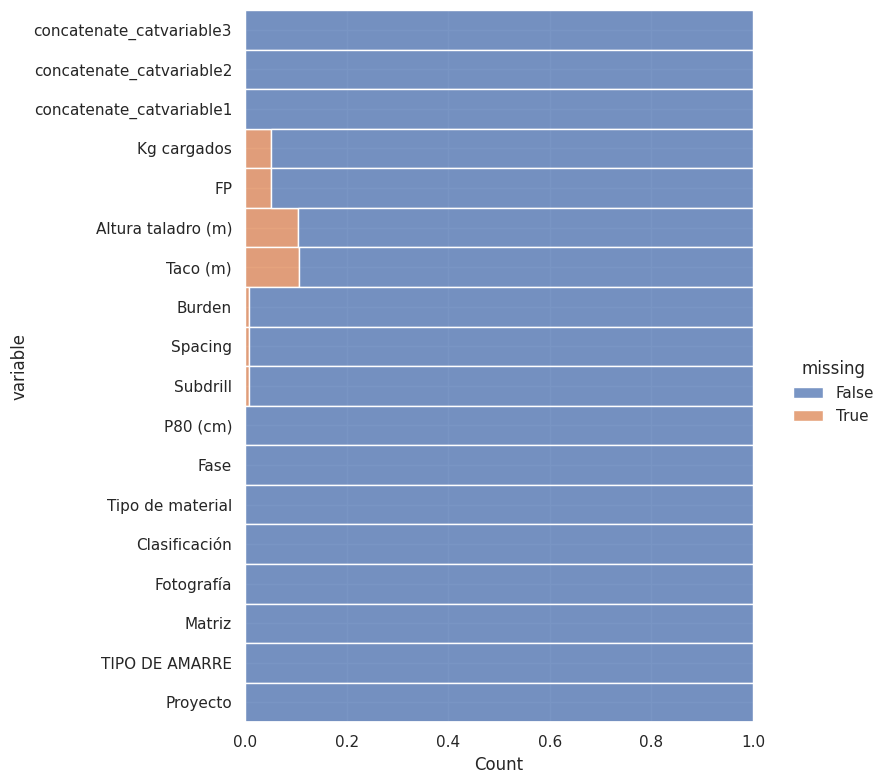

In [ ]:
plt.figure(figsize=(4,5))
sns.displot(
    data=pddf_select.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1,
    height = 8,)
plt.show()

In [ ]:
lst_cc1 = pddf_select['concatenate_catvariable1'].unique()
lst_cc2 = pddf_select['concatenate_catvariable2'].unique()
lst_cc3 = pddf_select['concatenate_catvariable3'].unique()

In [ ]:
list_pddf = []
for i in lst_cc1:
  df_i = pddf_select[pddf_select['concatenate_catvariable1']==i]
  df_i[muestra_numerica] = df_i[muestra_numerica].fillna(df_i[muestra_numerica].median())
  list_pddf.append(df_i)
pddf_womissing = pd.DataFrame(pd.concat(list_pddf))

<ipython-input-38-eeca6c91130a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_i[muestra_numerica] = df_i[muestra_numerica].fillna(df_i[muestra_numerica].median())
<ipython-input-38-eeca6c91130a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_i[muestra_numerica] = df_i[muestra_numerica].fillna(df_i[muestra_numerica].median())
<ipython-input-38-eeca6c91130a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

In [ ]:
pddf_womissing[muestra_numerica].isnull().sum()

Kg cargados           18
FP                    18
Altura taladro (m)    46
Taco (m)              46
Burden                 8
Spacing                8
Subdrill               8
P80 (cm)               0
dtype: int64

<Figure size 400x500 with 0 Axes>

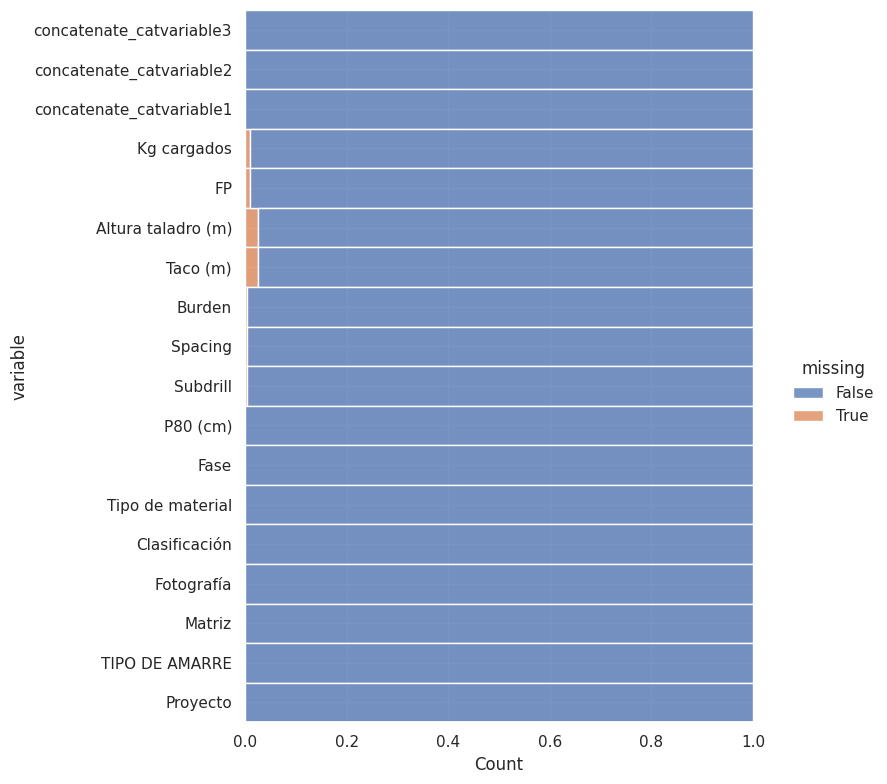

In [ ]:
plt.figure(figsize=(4,5))
sns.displot(
    data=pddf_womissing.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1,
    height = 8,)
plt.show()

In [ ]:
list_pddf2 = []
for j in lst_cc2:
  df_j = pddf_womissing[pddf_womissing['concatenate_catvariable2']==j]
  df_j[muestra_numerica] = df_j[muestra_numerica].fillna(df_j[muestra_numerica].median())
  list_pddf2.append(df_j)
pddf_womissing2 = pd.DataFrame(pd.concat(list_pddf2))

<ipython-input-41-39d2c9742bcc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_j[muestra_numerica] = df_j[muestra_numerica].fillna(df_j[muestra_numerica].median())
<ipython-input-41-39d2c9742bcc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_j[muestra_numerica] = df_j[muestra_numerica].fillna(df_j[muestra_numerica].median())
<ipython-input-41-39d2c9742bcc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

In [ ]:
pddf_womissing2[muestra_numerica].isnull().sum()

Kg cargados           3
FP                    3
Altura taladro (m)    2
Taco (m)              2
Burden                2
Spacing               2
Subdrill              2
P80 (cm)              0
dtype: int64

<Figure size 400x500 with 0 Axes>

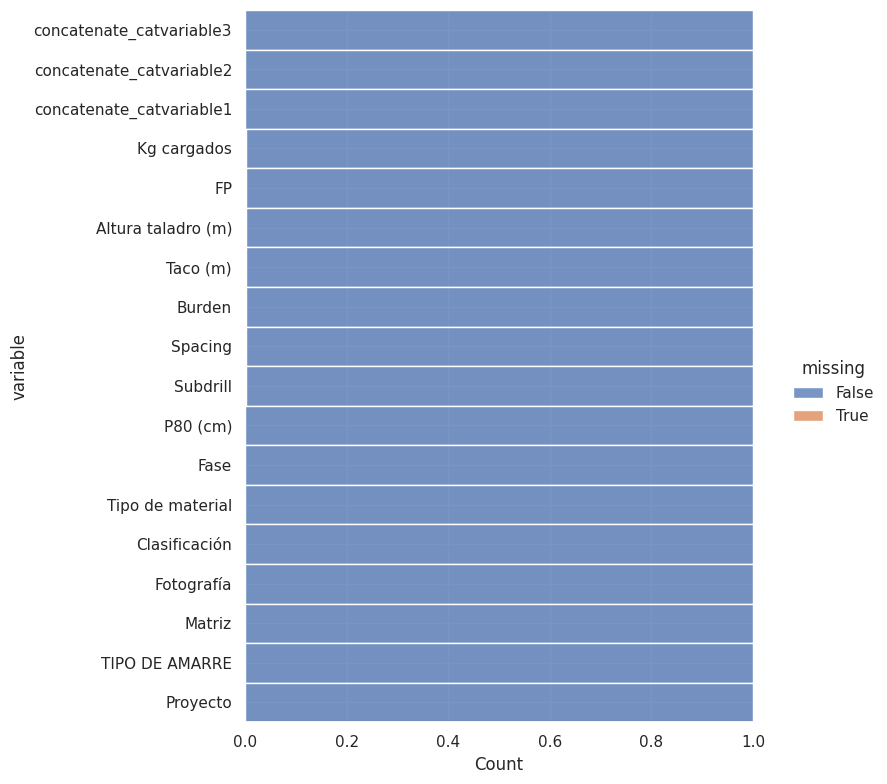

In [ ]:
plt.figure(figsize=(4,5))
sns.displot(
    data=pddf_womissing2.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1,
    height = 8,)
plt.show()

In [ ]:
pddf_womissing2.shape

(1812, 18)

In [ ]:
pddf_womissing2

concatenate_catvariable3 concatenate_catvariable2  \
0                     mineral                     8M2A   
35                    mineral                     8M2A   
60                    mineral                     8M2A   
65                    mineral                     8M2A   
42                    mineral                     8M2A   
...                       ...                      ...   
1763                 desmonte                      9C1   
1804                 desmonte                      9C1   
1584                  mineral                      8M2   
1683                  mineral                      8M2   
1772                  mineral                      8M2   

                   concatenate_catvariable1  Kg cargados      FP  \
0     8M2Amineralproduccionadvantagemissing  238888.5200  0.5200   
35    8M2Amineralproduccionadvantagemissing  181926.6800  0.5200   
60    8M2Amineralproduccionadvantagemissing  181926.6800  0.5200   
65    8M2Amineralproduccionadvantagemissing  181926.6800  0.5200   
42        8M2Amineralproduccionextramissing  455456.0300  0.5300   
...                                     ...          ...     ...   
1763  9C1desmonteproduccionadvantageechelon  128111.4317  0.2723   
1804  9C1desmonteproduccionadvantagemissing  181480.9276  0.2779   
1584   8M2mineralproduccionadvantageechelon  728683.3896  0.5406   
1683   8M2mineralproduccionadvantageechelon  335889.5660  0.6085   
1772   8M2mineralproduccionadvantageechelon  485869.7725  0.6209   

      Altura taladro (m)  Taco (m)  Burden  Spacing  Subdrill   P80 (cm) Fase  \
0                   16.5       6.0     5.5      6.5       1.0   7.900000    8   
35                  16.5       6.0     5.5      6.5       1.5   4.400000    8   
60                  16.5       6.0     5.5      6.5       1.5   3.200000    8   
65                  16.5       6.0     5.5      6.5       1.5   2.500000    8   
42                  16.5       6.0     5.0      6.5       1.5   3.800000    8   
...                  ...       ...     ...      ...       ...        ...  ...   
1763                16.5       6.5     8.7     10.0       1.5  13.300000    9   
1804                16.5       6.5     8.7     10.0       1.5   9.882476    9   
1584                16.0       5.5     5.5      6.5       1.0   6.300000    8   
1683                16.0       5.5     5.5      6.5       1.0   7.500000    8   
1772                16.0       5.5     5.5      6.5       1.0   6.600000    8   

     Tipo de material Clasificación  Fotografía     Matriz TIPO DE AMARRE  \
0                 M2A       mineral  produccion  advantage        missing   
35                M2A       mineral  produccion  advantage        missing   
60                M2A       mineral  produccion  advantage        missing   
65                M2A       mineral  produccion  advantage        missing   
42                M2A       mineral  produccion      extra        missing   
...               ...           ...         ...        ...            ...   
1763               C1      desmonte  produccion  advantage        echelon   
1804               C1      desmonte  produccion  advantage        missing   
1584               M2       mineral  produccion  advantage        echelon   
1683               M2       mineral  produccion  advantage        echelon   
1772               M2       mineral  produccion  advantage        echelon   

          Proyecto  
0     8-NP-4238-29  
35    8-NP-4223-19  
60    8-NP-4223-21  
65    8-NP-4223-21  
42    8-NP-4223-19  
...            ...  
1763  9-NP-4298-08  
1804  9-NP-4298-18  
1584  8-NP-4043-14  
1683  8-NP-4028-03  
1772  8-NP-4028-18  

[1812 rows x 18 columns]

In [ ]:
list_pddf3 = []
for k in lst_cc3:
  df_k = pddf_womissing2[pddf_womissing2['concatenate_catvariable3']==k]
  df_k[muestra_numerica] = df_k[muestra_numerica].fillna(df_k[muestra_numerica].median())
  list_pddf3.append(df_k)
pddf_womissing3 = pd.DataFrame(pd.concat(list_pddf3))

<ipython-input-46-19ef0a487740>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_k[muestra_numerica] = df_k[muestra_numerica].fillna(df_k[muestra_numerica].median())
<ipython-input-46-19ef0a487740>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_k[muestra_numerica] = df_k[muestra_numerica].fillna(df_k[muestra_numerica].median())


In [ ]:
#pddf_womissing2[muestra_numerica] = pddf_womissing2[muestra_numerica].fillna(pddf_womissing2[muestra_numerica].median())

In [ ]:
pddf_womissing3[muestra_numerica].isnull().sum()

Kg cargados           0
FP                    0
Altura taladro (m)    0
Taco (m)              0
Burden                0
Spacing               0
Subdrill              0
P80 (cm)              0
dtype: int64

In [ ]:
pddf_select.drop(columns=['concatenate_catvariable1','concatenate_catvariable2','concatenate_catvariable3'],inplace=True)
pddf_womissing3.drop(columns=['concatenate_catvariable1','concatenate_catvariable2','concatenate_catvariable3'],inplace=True)

<ipython-input-49-63f1e1fa0b1f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pddf_select.drop(columns=['concatenate_catvariable1','concatenate_catvariable2','concatenate_catvariable3'],inplace=True)


In [ ]:

pddf_womissing3.reset_index(drop=True)

Kg cargados      FP  Altura taladro (m)  Taco (m)  Burden  Spacing  \
0     238888.5200  0.5200                16.5       6.0     5.5      6.5   
1     181926.6800  0.5200                16.5       6.0     5.5      6.5   
2     181926.6800  0.5200                16.5       6.0     5.5      6.5   
3     181926.6800  0.5200                16.5       6.0     5.5      6.5   
4     455456.0300  0.5300                16.5       6.0     5.0      6.5   
...           ...     ...                 ...       ...     ...      ...   
1807  321019.1415  0.3901                16.5       6.5     8.7     10.0   
1808  105227.1024  0.4258                16.5       6.5     8.7     10.0   
1809  128111.4317  0.2723                16.5       6.5     8.7     10.0   
1810  128111.4317  0.2723                16.5       6.5     8.7     10.0   
1811  181480.9276  0.2779                16.5       6.5     8.7     10.0   

      Subdrill   P80 (cm) Fase Tipo de material Clasificación  Fotografía  \
0          1.0   7.900000    8              M2A       mineral  produccion   
1          1.5   4.400000    8              M2A       mineral  produccion   
2          1.5   3.200000    8              M2A       mineral  produccion   
3          1.5   2.500000    8              M2A       mineral  produccion   
4          1.5   3.800000    8              M2A       mineral  produccion   
...        ...        ...  ...              ...           ...         ...   
1807       1.5  11.300000    9               C1      desmonte  produccion   
1808       1.5  14.300000    9               C1      desmonte  produccion   
1809       1.5  18.900000    9               C1      desmonte  produccion   
1810       1.5  13.300000    9               C1      desmonte  produccion   
1811       1.5   9.882476    9               C1      desmonte  produccion   

         Matriz TIPO DE AMARRE      Proyecto  
0     advantage        missing  8-NP-4238-29  
1     advantage        missing  8-NP-4223-19  
2     advantage        missing  8-NP-4223-21  
3     advantage        missing  8-NP-4223-21  
4         extra        missing  8-NP-4223-19  
...         ...            ...           ...  
1807  advantage        echelon  9-NP-4313-09  
1808  advantage        echelon  9-NP-4298-06  
1809  advantage        echelon  9-NP-4298-08  
1810  advantage        echelon  9-NP-4298-08  
1811  advantage        missing  9-NP-4298-18  

[1812 rows x 15 columns]

In [ ]:
pddf_womissing3.isnull().sum()

Kg cargados           0
FP                    0
Altura taladro (m)    0
Taco (m)              0
Burden                0
Spacing               0
Subdrill              0
P80 (cm)              0
Fase                  0
Tipo de material      0
Clasificación         0
Fotografía            0
Matriz                0
TIPO DE AMARRE        0
Proyecto              0
dtype: int64

## Deteccion de duplicados

In [ ]:
pddf_womissing3[muestra_objetivo + muestra_numerica].shape

(1812, 15)

In [ ]:
pddf_womissing3

Kg cargados      FP  Altura taladro (m)  Taco (m)  Burden  Spacing  \
0     238888.5200  0.5200                16.5       6.0     5.5      6.5   
35    181926.6800  0.5200                16.5       6.0     5.5      6.5   
60    181926.6800  0.5200                16.5       6.0     5.5      6.5   
65    181926.6800  0.5200                16.5       6.0     5.5      6.5   
42    455456.0300  0.5300                16.5       6.0     5.0      6.5   
...           ...     ...                 ...       ...     ...      ...   
1751  321019.1415  0.3901                16.5       6.5     8.7     10.0   
1756  105227.1024  0.4258                16.5       6.5     8.7     10.0   
1757  128111.4317  0.2723                16.5       6.5     8.7     10.0   
1763  128111.4317  0.2723                16.5       6.5     8.7     10.0   
1804  181480.9276  0.2779                16.5       6.5     8.7     10.0   

      Subdrill   P80 (cm) Fase Tipo de material Clasificación  Fotografía  \
0          1.0   7.900000    8              M2A       mineral  produccion   
35         1.5   4.400000    8              M2A       mineral  produccion   
60         1.5   3.200000    8              M2A       mineral  produccion   
65         1.5   2.500000    8              M2A       mineral  produccion   
42         1.5   3.800000    8              M2A       mineral  produccion   
...        ...        ...  ...              ...           ...         ...   
1751       1.5  11.300000    9               C1      desmonte  produccion   
1756       1.5  14.300000    9               C1      desmonte  produccion   
1757       1.5  18.900000    9               C1      desmonte  produccion   
1763       1.5  13.300000    9               C1      desmonte  produccion   
1804       1.5   9.882476    9               C1      desmonte  produccion   

         Matriz TIPO DE AMARRE      Proyecto  
0     advantage        missing  8-NP-4238-29  
35    advantage        missing  8-NP-4223-19  
60    advantage        missing  8-NP-4223-21  
65    advantage        missing  8-NP-4223-21  
42        extra        missing  8-NP-4223-19  
...         ...            ...           ...  
1751  advantage        echelon  9-NP-4313-09  
1756  advantage        echelon  9-NP-4298-06  
1757  advantage        echelon  9-NP-4298-08  
1763  advantage        echelon  9-NP-4298-08  
1804  advantage        missing  9-NP-4298-18  

[1812 rows x 15 columns]

In [ ]:
pddf_womissing3.drop_duplicates(inplace=True)
pddf_womissing3.shape

(1798, 15)

In [ ]:
pddf_filter = pddf_womissing3
pddf_filter

Kg cargados      FP  Altura taladro (m)  Taco (m)  Burden  Spacing  \
0     238888.5200  0.5200                16.5       6.0     5.5      6.5   
35    181926.6800  0.5200                16.5       6.0     5.5      6.5   
60    181926.6800  0.5200                16.5       6.0     5.5      6.5   
65    181926.6800  0.5200                16.5       6.0     5.5      6.5   
42    455456.0300  0.5300                16.5       6.0     5.0      6.5   
...           ...     ...                 ...       ...     ...      ...   
1751  321019.1415  0.3901                16.5       6.5     8.7     10.0   
1756  105227.1024  0.4258                16.5       6.5     8.7     10.0   
1757  128111.4317  0.2723                16.5       6.5     8.7     10.0   
1763  128111.4317  0.2723                16.5       6.5     8.7     10.0   
1804  181480.9276  0.2779                16.5       6.5     8.7     10.0   

      Subdrill   P80 (cm) Fase Tipo de material Clasificación  Fotografía  \
0          1.0   7.900000    8              M2A       mineral  produccion   
35         1.5   4.400000    8              M2A       mineral  produccion   
60         1.5   3.200000    8              M2A       mineral  produccion   
65         1.5   2.500000    8              M2A       mineral  produccion   
42         1.5   3.800000    8              M2A       mineral  produccion   
...        ...        ...  ...              ...           ...         ...   
1751       1.5  11.300000    9               C1      desmonte  produccion   
1756       1.5  14.300000    9               C1      desmonte  produccion   
1757       1.5  18.900000    9               C1      desmonte  produccion   
1763       1.5  13.300000    9               C1      desmonte  produccion   
1804       1.5   9.882476    9               C1      desmonte  produccion   

         Matriz TIPO DE AMARRE      Proyecto  
0     advantage        missing  8-NP-4238-29  
35    advantage        missing  8-NP-4223-19  
60    advantage        missing  8-NP-4223-21  
65    advantage        missing  8-NP-4223-21  
42        extra        missing  8-NP-4223-19  
...         ...            ...           ...  
1751  advantage        echelon  9-NP-4313-09  
1756  advantage        echelon  9-NP-4298-06  
1757  advantage        echelon  9-NP-4298-08  
1763  advantage        echelon  9-NP-4298-08  
1804  advantage        missing  9-NP-4298-18  

[1798 rows x 15 columns]

II. Filtrar en base a los campos objetivo de estudio. (Justificar porque se escogieron cada una de las variables segun negocio).

In [ ]:
#pddf_filter1 = pddf_womissing3[(pddf_womissing3['Clasificación']=='mineral') & (pddf_womissing3['Fotografía']=='produccion') & (pddf_womissing3['Matriz']=='advantage')]
#pddf_filter1.reset_index(drop=True, inplace= True)

In [ ]:
#pddf_filter1.shape

In [ ]:
#print(round(100*pddf_filter1.groupby('Fase')['Tipo de material'].value_counts()/pddf_filter1.shape[0],2),'%')

#fig = px.box(pddf_filter1, x="Tipo de material", y="P80 (cm)", color="Fase")
#fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
#fig.show()

In [ ]:
#pddf_filter = pddf_filter1[(pddf_filter1['Fase']==8) | (pddf_filter1['Tipo de material']=='M4B')]
pddf_filter.reset_index(drop=True, inplace= True)

In [ ]:
pddf_filter.shape

(1798, 15)

III. Analisis de datos numericos (Estadistica)

In [ ]:
#Variables 
target = ['P80 (cm)']
numFeatures = ['Kg cargados', 'FP','Altura taladro (m)', 'Taco (m)','Burden', 'Spacing', 'Subdrill']
catFeatures = ['Fase','Proyecto', 'Tipo de material', 'Clasificación','TIPO DE AMARRE', 'Matriz', 'Fotografía']

In [ ]:
features = numFeatures + catFeatures
data00 = pddf_filter[features + ['P80 (cm)']]

In [ ]:
data00.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1798 entries, 0 to 1797
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Kg cargados         1798 non-null   float64
 1   FP                  1798 non-null   float64
 2   Altura taladro (m)  1798 non-null   float64
 3   Taco (m)            1798 non-null   float64
 4   Burden              1798 non-null   float64
 5   Spacing             1798 non-null   float64
 6   Subdrill            1798 non-null   float64
 7   Fase                1798 non-null   object 
 8   Proyecto            1798 non-null   object 
 9   Tipo de material    1798 non-null   object 
 10  Clasificación       1798 non-null   object 
 11  TIPO DE AMARRE      1798 non-null   object 
 12  Matriz              1798 non-null   object 
 13  Fotografía          1798 non-null   object 
 14  P80 (cm)            1798 non-null   float64
dtypes: float64(8), object(7)
memory usage: 210.8+ KB


In [ ]:
import math

def percentile(input, q):
    data_sorted = sorted(input) # Sort in ascending order
    
    index = math.ceil(q / 100 * len(data_sorted))

    return data_sorted[index]

In [ ]:
def rango_percentile(x):
  if x >= 0 and x <= p1:
    return 'percentil_p1'
  elif x > p1 and x <= p25:
    return 'percentil_p25'
  elif x > p25 and x <= p50:
    return 'percentil_p50'
  elif x > p50 and x <= p75:
    return 'percentil_p75'
  elif x > p75 and x <= p99:
    return 'percentil_p99'

def graph_quantity(percentil_campus,category):
  table = pd.crosstab(percentil_campus,category)
  table.div(table.sum(1).astype(float),axis=0).plot(kind= 'bar',stacked = True)
  plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
  plt.ylabel('Porcentaje (%)')
  plt.title(f'% {category.name.capitalize()} vs P80')
  plt.show()

In [ ]:
p1 = percentile(data00['P80 (cm)'], 0.1)
p25 = percentile(data00['P80 (cm)'], 25)
p50 = percentile(data00['P80 (cm)'], 50)
p75 = percentile(data00['P80 (cm)'], 75)
p99 = percentile(data00['P80 (cm)'], 99.9)

In [ ]:
data00['rango_percentil'] = data00['P80 (cm)'].apply(lambda x: rango_percentile(x))

<ipython-input-67-bfadef5ec0c0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data00['rango_percentil'] = data00['P80 (cm)'].apply(lambda x: rango_percentile(x))


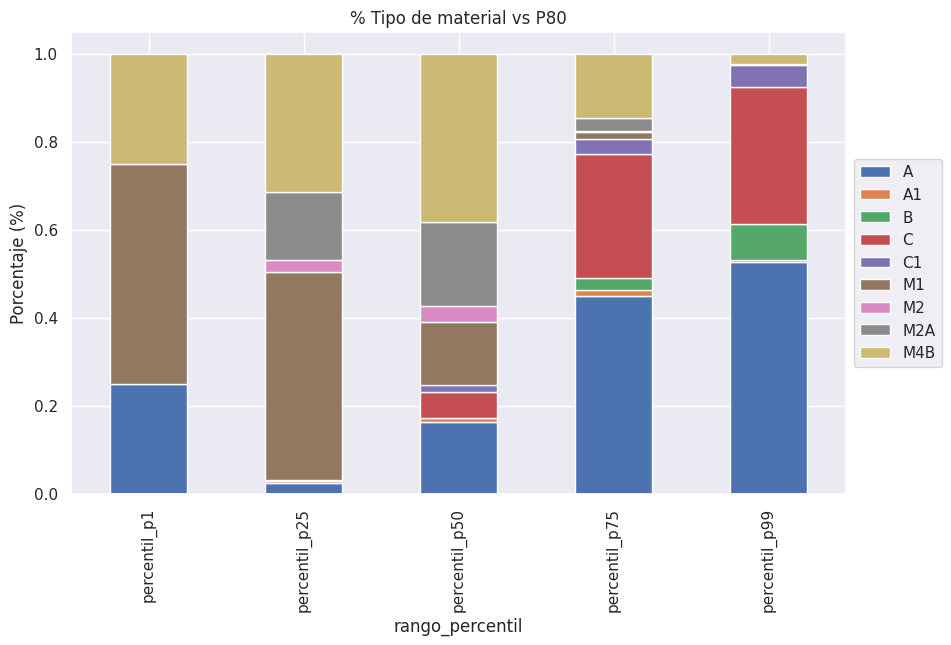

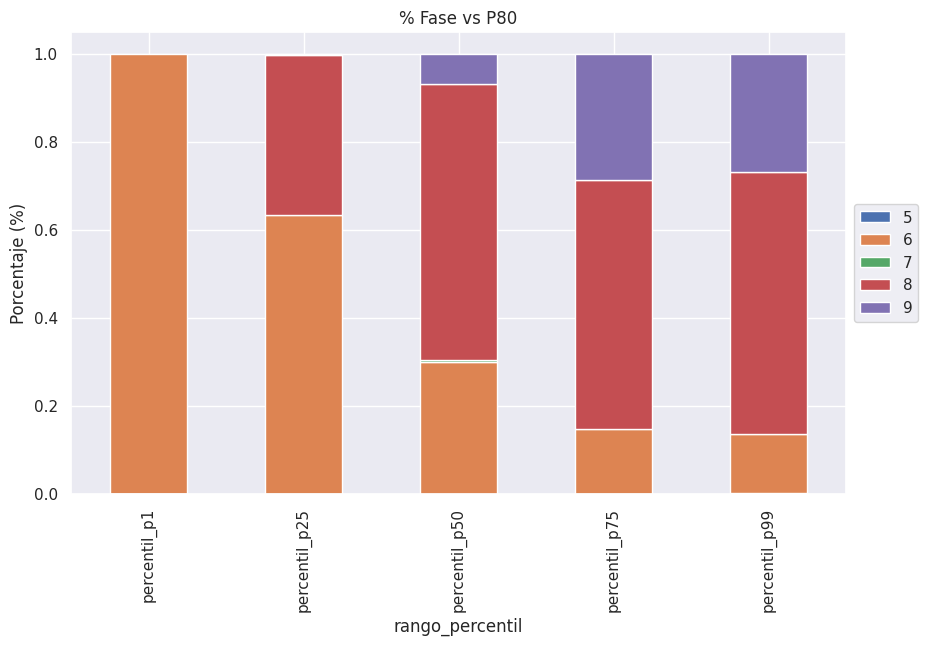

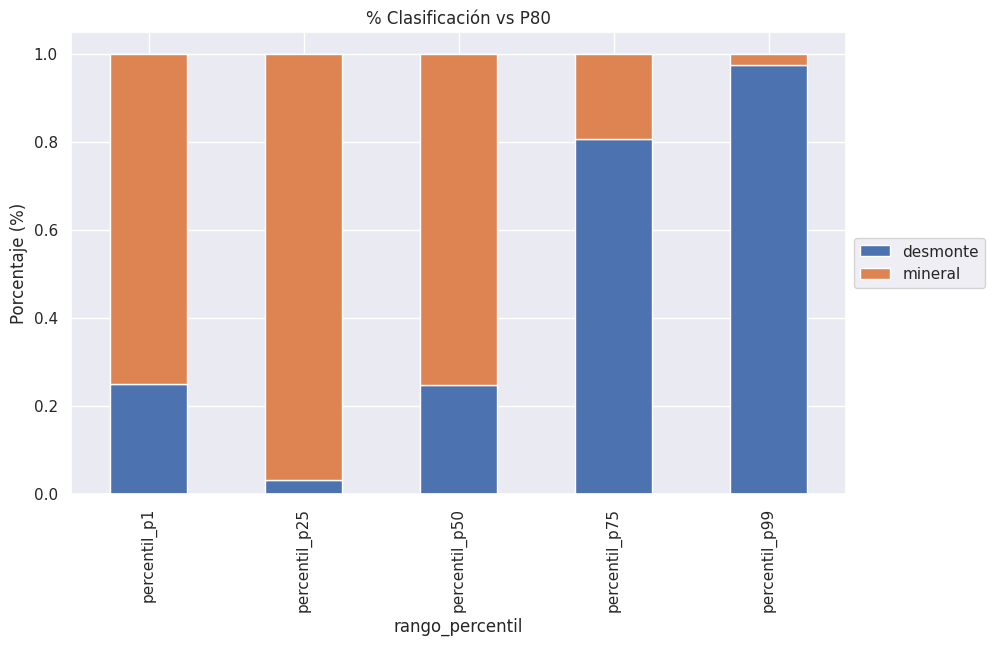

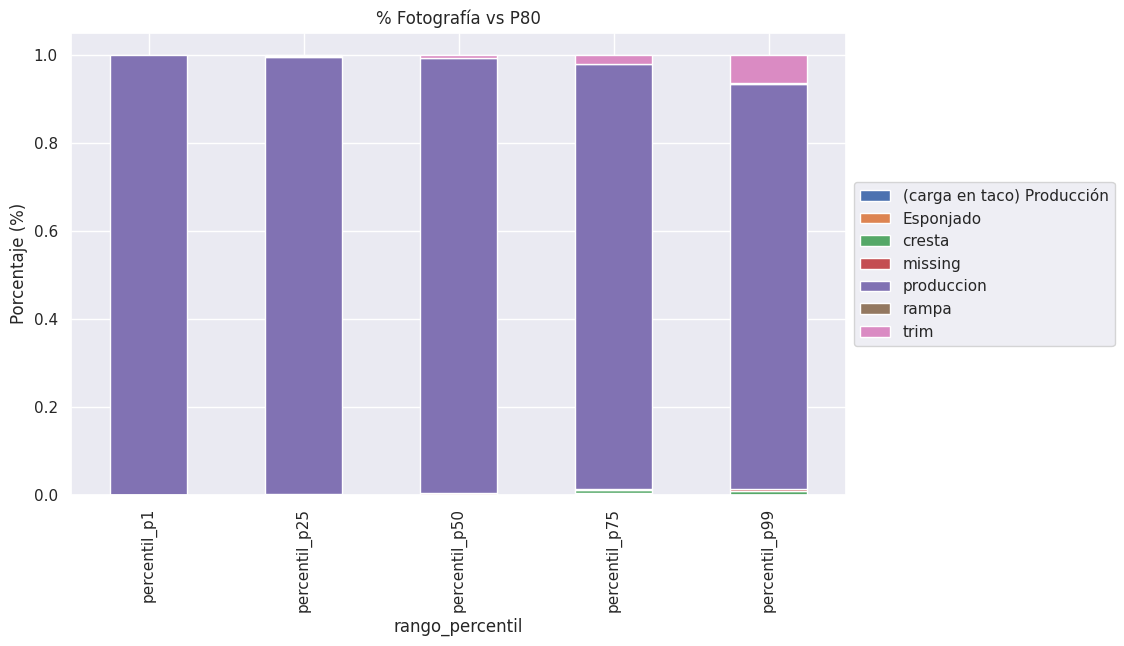

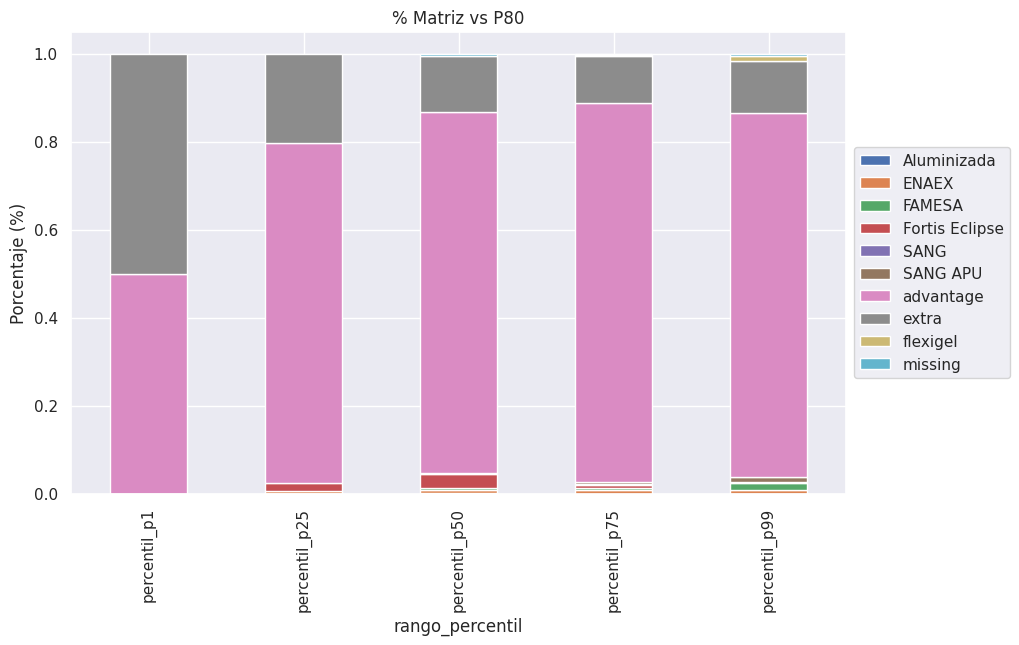

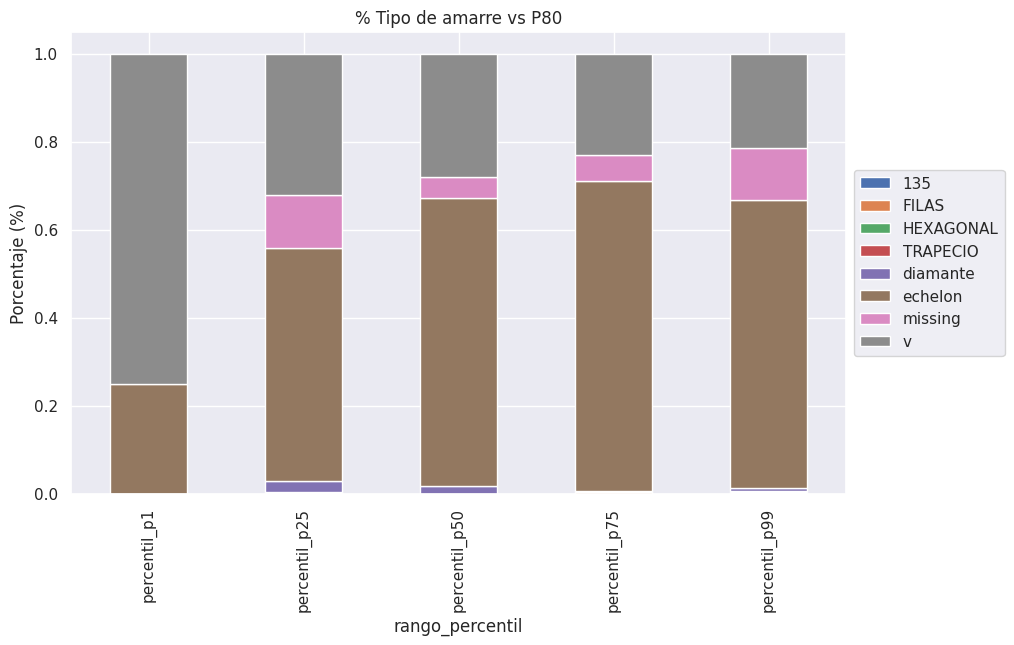

In [ ]:
graph_quantity(data00['rango_percentil'],data00['Tipo de material'])
graph_quantity(data00['rango_percentil'],data00['Fase'])
graph_quantity(data00['rango_percentil'],data00['Clasificación'])
graph_quantity(data00['rango_percentil'],data00['Fotografía'])
graph_quantity(data00['rango_percentil'],data00['Matriz'])
graph_quantity(data00['rango_percentil'],data00['TIPO DE AMARRE'])

In [ ]:
data = copy.deepcopy(data00)

In [ ]:
data.to_excel("data_limpia.xlsx",index = False)

In [ ]:
pddf_filter2 = data[numFeatures + target]

Descripcion estadistica de los datos de la tabla

In [ ]:
pddf_filter2.describe(percentiles = [0.05,0.10,0.25,0.5,0.75,0.8,0.9,0.95,0.99]).transpose()

count           mean            std        min  \
Kg cargados         1798.0  296609.132037  164970.008707  2874.0798   
FP                  1798.0       0.451206       0.141665     0.1500   
Altura taladro (m)  1798.0      16.569494       0.369740    13.0000   
Taco (m)            1798.0       6.379538       0.542371     5.0000   
Burden              1798.0       7.044800       1.523643     3.5000   
Spacing             1798.0       8.177631       1.686489     4.0000   
Subdrill            1798.0       1.582314       0.761525    -2.0000   
P80 (cm)            1798.0      14.457281       9.647474     0.8000   

                              5%           10%          25%          50%  \
Kg cargados         81917.601055  108399.97632  175009.9500  265480.8915   
FP                      0.230000       0.25000       0.3124       0.4778   
Altura taladro (m)     16.000000      16.00000      16.5000      16.5000   
Taco (m)                5.500000       5.50000       6.0000       6.5000   
Burden                  5.500000       5.50000       5.5000       6.5000   
Spacing                 6.500000       6.50000       6.5000       7.5000   
Subdrill                1.000000       1.00000       1.5000       1.5000   
P80 (cm)                2.600000       3.40000       6.1000      13.0000   

                            75%           80%          90%          95%  \
Kg cargados         395171.7242  422123.77562  511500.7767  598276.5640   
FP                       0.5716       0.58358       0.6237       0.6383   
Altura taladro (m)      17.0000      17.00000      17.0000      17.0000   
Taco (m)                 7.0000       7.00000       7.0000       7.0000   
Burden                   8.6500       9.00000       9.0000       9.5000   
Spacing                 10.0000      10.35000      10.3500      11.0000   
Subdrill                 2.0000       2.00000       2.0000       2.0000   
P80 (cm)                21.5750      23.10000      27.5300      29.8000   

                            99%         max  
Kg cargados         740853.9369  967054.248  
FP                       0.6997       0.790  
Altura taladro (m)      17.0000      17.500  
Taco (m)                 7.0000       8.500  
Burden                   9.7000      10.000  
Spacing                 11.2000      11.500  
Subdrill                 2.0000      16.500  
P80 (cm)                39.4120      94.700

Boxplot de los datos de tabla para cada campo

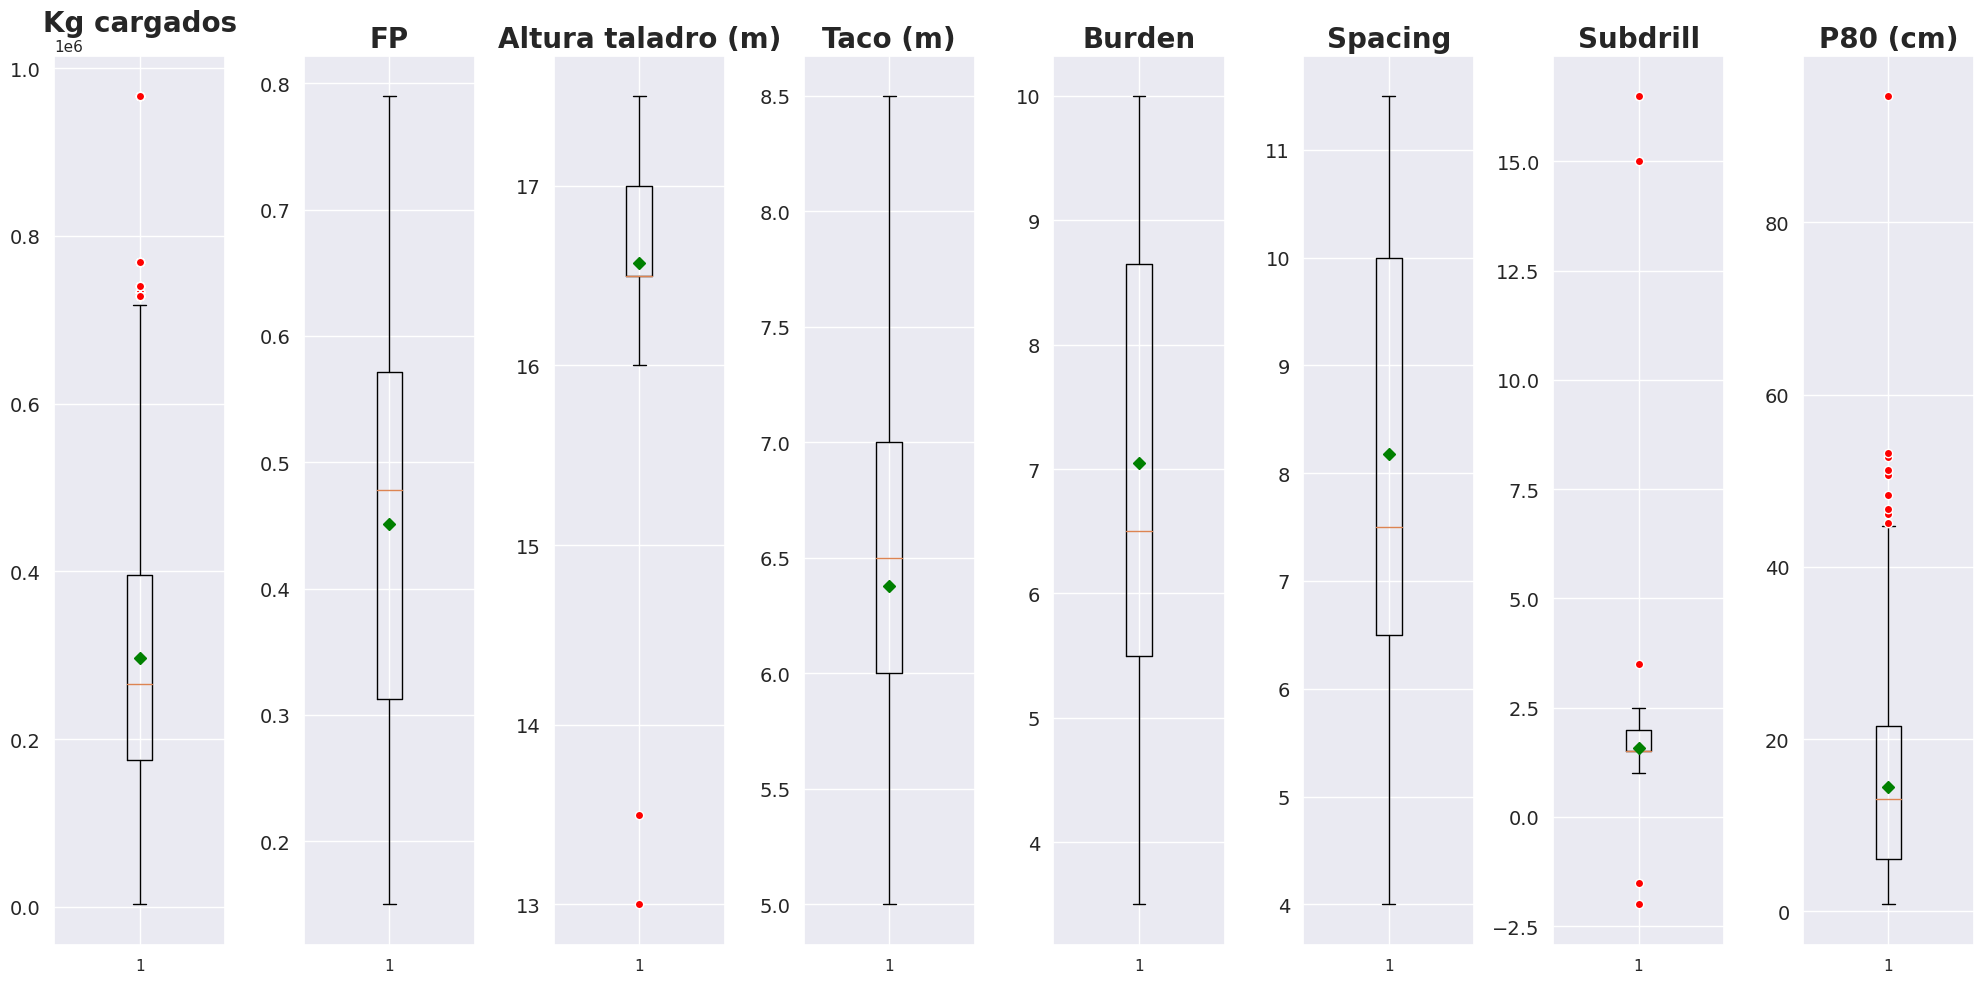

In [ ]:
red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')
mean_shape = dict(markerfacecolor='green', marker='D', markeredgecolor='green')

fig, axs = plt.subplots(1, len(pddf_filter2.columns), figsize=(20,10))

for i, ax in enumerate(axs.flat):
    ax.boxplot(pddf_filter2.iloc[:,i], flierprops=red_circle,  
             showmeans=True, meanprops=mean_shape)
    pddf_filter2.iloc[:,i]
    ax.set_title(pddf_filter2.columns[i], fontsize=20, fontweight='bold')
    ax.tick_params(axis='y', labelsize=14)
    
    #Checking if column names are equal to columns we expect to be logarithmic
    if pddf_filter2.columns[i] == 'RDEP' or pddf_filter2.columns[i] == 'RMED':
        ax.semilogy()
    
plt.tight_layout()
plt.show()

Histograma de los datos de tabla para cada campo

Text(0.5, 1.0, 'Subdrill')

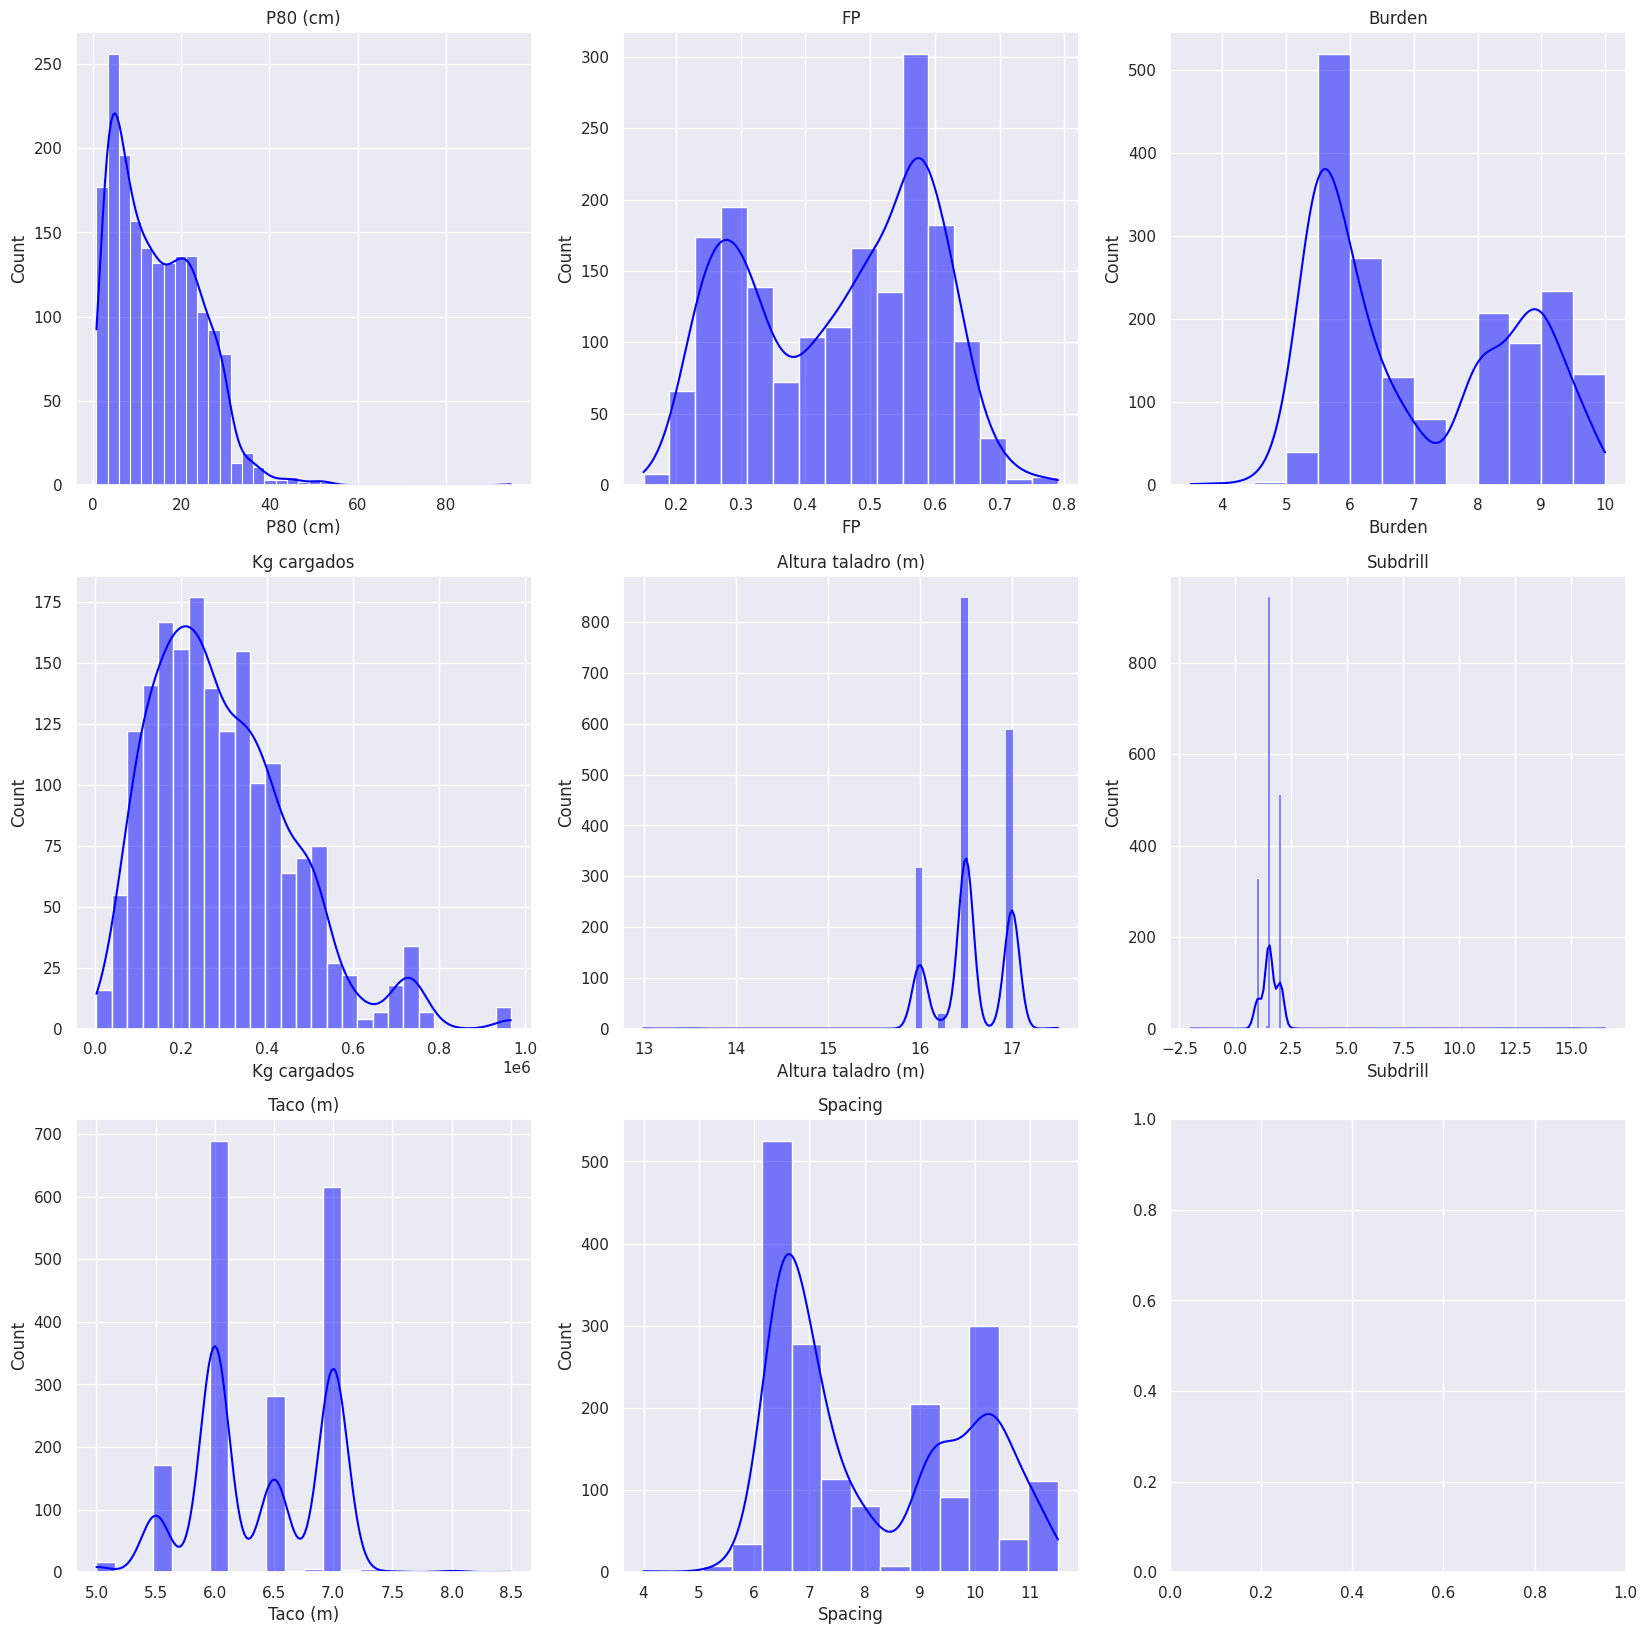

In [ ]:
sns.set(style="darkgrid")

fig, axs = plt.subplots(3, 3, figsize=(20, 20))

a = sns.histplot(data=pddf_filter2, x="P80 (cm)", kde=True, color="blue", ax=axs[0, 0])
b = sns.histplot(data=pddf_filter2, x="Kg cargados", kde=True, color="blue", ax=axs[1, 0])
c = sns.histplot(data=pddf_filter2, x="FP", kde=True, color="blue", ax=axs[0, 1])
d = sns.histplot(data=pddf_filter2, x="Altura taladro (m)", kde=True, color="blue", ax=axs[1, 1])
e = sns.histplot(data=pddf_filter2, x="Taco (m)", kde=True, color="blue", ax=axs[2, 0])
f = sns.histplot(data=pddf_filter2, x="Burden", kde=True, color="blue", ax=axs[0, 2])
g = sns.histplot(data=pddf_filter2, x="Spacing", kde=True, color="blue", ax=axs[2, 1])
h = sns.histplot(data=pddf_filter2, x="Subdrill", kde=True, color="blue", ax=axs[1, 2])
a.set_title("P80 (cm)")
b.set_title("Kg cargados")
c.set_title("FP")
d.set_title("Altura taladro (m)")
e.set_title("Taco (m)")
f.set_title("Burden")
g.set_title("Spacing")
h.set_title("Subdrill")

#SEGUNDO ENTREGABLE

- Modelling: documentación de los modelos desarrollados y resultados obtenidos.

- Evaluación: análisis crítico del resultado obtenido de los modelos.

- Aplicación (Recomendaciones de uso de la solución de datos desarrollada).

- Resumen ejecutivo

5. Modelamiento 

  5.0. Muestrear la data (train, test)

  5.1. Levantamiento de los missing (imputacion de media, mediana)

  5.2. Tratamiento de los outliers en el target (trabajo con percentiles para normalizar los outliers, solo en regresion lineal; para los otros modelos no requieren tratamiento previo) 

  5.3. Correlacion de features y targets (Regresion Lineal) 

  5.4. Seleccion de features finales del modelo. 
  
6. Evaluacion
7. Aplicacion

##TRABAJO PARA CADA MODELO DE ML

## Muestreo Train/Test

In [ ]:
# Muestreo de data
from sklearn.model_selection import train_test_split

train00, test00 = train_test_split(data,
                               test_size = 0.3,
                               random_state = 123)


## Target Encoding

In [ ]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 8.6 MB/s eta 0:00:00


In [ ]:
from category_encoders import TargetEncoder
encoder = TargetEncoder()

In [ ]:
#Variables 
target = ['P80 (cm)']
numFeatures = ['Kg cargados', 'FP', 'Altura taladro (m)', 'Taco (m)', 'Burden',
       'Spacing', 'Subdrill']
catFeatures = ['Fase','Proyecto', 'Tipo de material', 'Clasificación','TIPO DE AMARRE', 'Matriz', 'Fotografía']

In [ ]:
encoder.fit(train00[catFeatures], train00[target])

train00[[x + '_coded' for x in catFeatures]] = encoder.transform(train00[catFeatures])
test00[[x + '_coded' for x in catFeatures]] = encoder.transform(test00[catFeatures])

In [ ]:
train = copy.deepcopy(train00)
test = copy.deepcopy(test00)

In [ ]:
train[['Proyecto','Proyecto_coded']].drop_duplicates()

Proyecto  Proyecto_coded
749   6-NP-3968-37       14.382177
1180  8-NP-4193-30       13.673539
162   6-NP-3908-05       12.990016
1408  9-NP-4328-19       14.122693
958   8-NP-4148-39       15.592186
...            ...             ...
1363  9-NP-4388-17       14.746481
224   6-NP-3893-30       13.016038
113   8-NP-4148-15       12.950984
1238  9-NP-4493-05       14.824546
1346  9-NP-4403-22       15.318958

[614 rows x 2 columns]

In [ ]:
train[['Clasificación','Clasificación_coded']].drop_duplicates()

Clasificación  Clasificación_coded
749        mineral             7.232215
1180      desmonte            21.200494

In [ ]:
catFeatures_coded = [x + '_coded' for x in catFeatures]
catFeatures_coded

['Fase_coded',
 'Proyecto_coded',
 'Tipo de material_coded',
 'Clasificación_coded',
 'TIPO DE AMARRE_coded',
 'Matriz_coded',
 'Fotografía_coded']

In [ ]:
train[catFeatures_coded].describe()

Fase_coded  Proyecto_coded  Tipo de material_coded  \
count  1258.000000     1258.000000             1258.000000   
mean     14.345932       14.268012               14.302298   
std       3.933277        1.300630                6.984236   
min       9.057406       12.107761                4.712225   
25%       9.057406       13.187620                8.890464   
50%      15.442983       14.095068               19.739610   
75%      15.442983       15.292957               20.839133   
max      20.656545       19.404364               23.735516   

       Clasificación_coded  TIPO DE AMARRE_coded  Matriz_coded  \
count          1258.000000           1258.000000   1258.000000   
mean             14.349597             14.360748     14.247092   
std               6.985645              0.924961      1.069213   
min               7.232215             13.044694     11.732299   
25%               7.232215             13.044694     14.636445   
50%              21.200494             14.663831     14.636445   
75%              21.200494             14.663831     14.636445   
max              21.200494             16.300385     17.836344   

       Fotografía_coded  
count       1258.000000  
mean          14.201799  
std            1.253967  
min           13.243216  
25%           14.001225  
50%           14.001225  
75%           14.001225  
max           22.493096

In [ ]:
train00.columns

Index(['Kg cargados', 'FP', 'Altura taladro (m)', 'Taco (m)', 'Burden',
       'Spacing', 'Subdrill', 'Fase', 'Proyecto', 'Tipo de material',
       'Clasificación', 'TIPO DE AMARRE', 'Matriz', 'Fotografía', 'P80 (cm)',
       'rango_percentil', 'Fase_coded', 'Proyecto_coded',
       'Tipo de material_coded', 'Clasificación_coded', 'TIPO DE AMARRE_coded',
       'Matriz_coded', 'Fotografía_coded'],
      dtype='object')

## **REGRESION LINEAL**

In [ ]:
corr_matrix = train[numFeatures+target].corr()
corr_matrix.reset_index()

index  Kg cargados        FP  Altura taladro (m)  Taco (m)  \
0         Kg cargados     1.000000  0.539183           -0.430454 -0.364900   
1                  FP     0.539183  1.000000           -0.442937 -0.577858   
2  Altura taladro (m)    -0.430454 -0.442937            1.000000  0.697032   
3            Taco (m)    -0.364900 -0.577858            0.697032  1.000000   
4              Burden    -0.317230 -0.712126            0.515854  0.673706   
5             Spacing    -0.317086 -0.712476            0.518885  0.674770   
6            Subdrill    -0.228190 -0.233554            0.447999  0.320997   
7            P80 (cm)    -0.345369 -0.580715            0.598074  0.658480   

     Burden   Spacing  Subdrill  P80 (cm)  
0 -0.317230 -0.317086 -0.228190 -0.345369  
1 -0.712126 -0.712476 -0.233554 -0.580715  
2  0.515854  0.518885  0.447999  0.598074  
3  0.673706  0.674770  0.320997  0.658480  
4  1.000000  0.994398  0.316136  0.610609  
5  0.994398  1.000000  0.322318  0.619203  
6  0.316136  0.322318  1.000000  0.276632  
7  0.610609  0.619203  0.276632  1.000000

<Axes: >

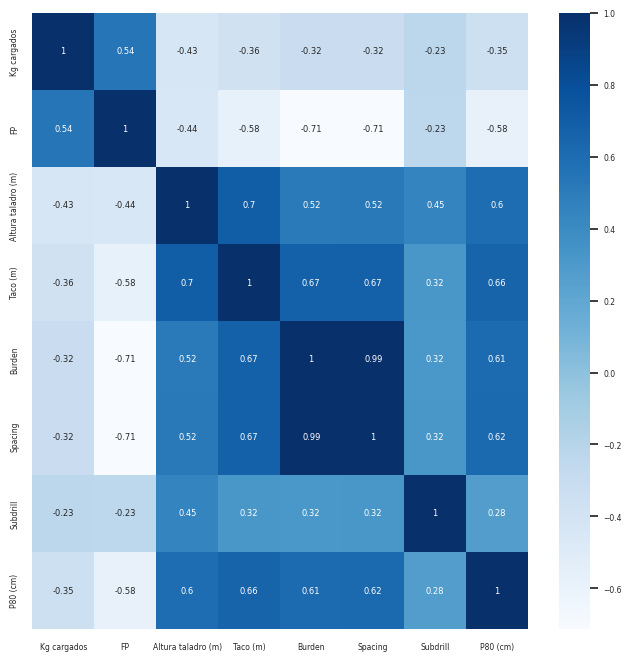

In [ ]:
plt.figure(figsize=(8, 8))
sns.set(font_scale=0.5)
sns.heatmap(corr_matrix, cmap="Blues", annot=True)

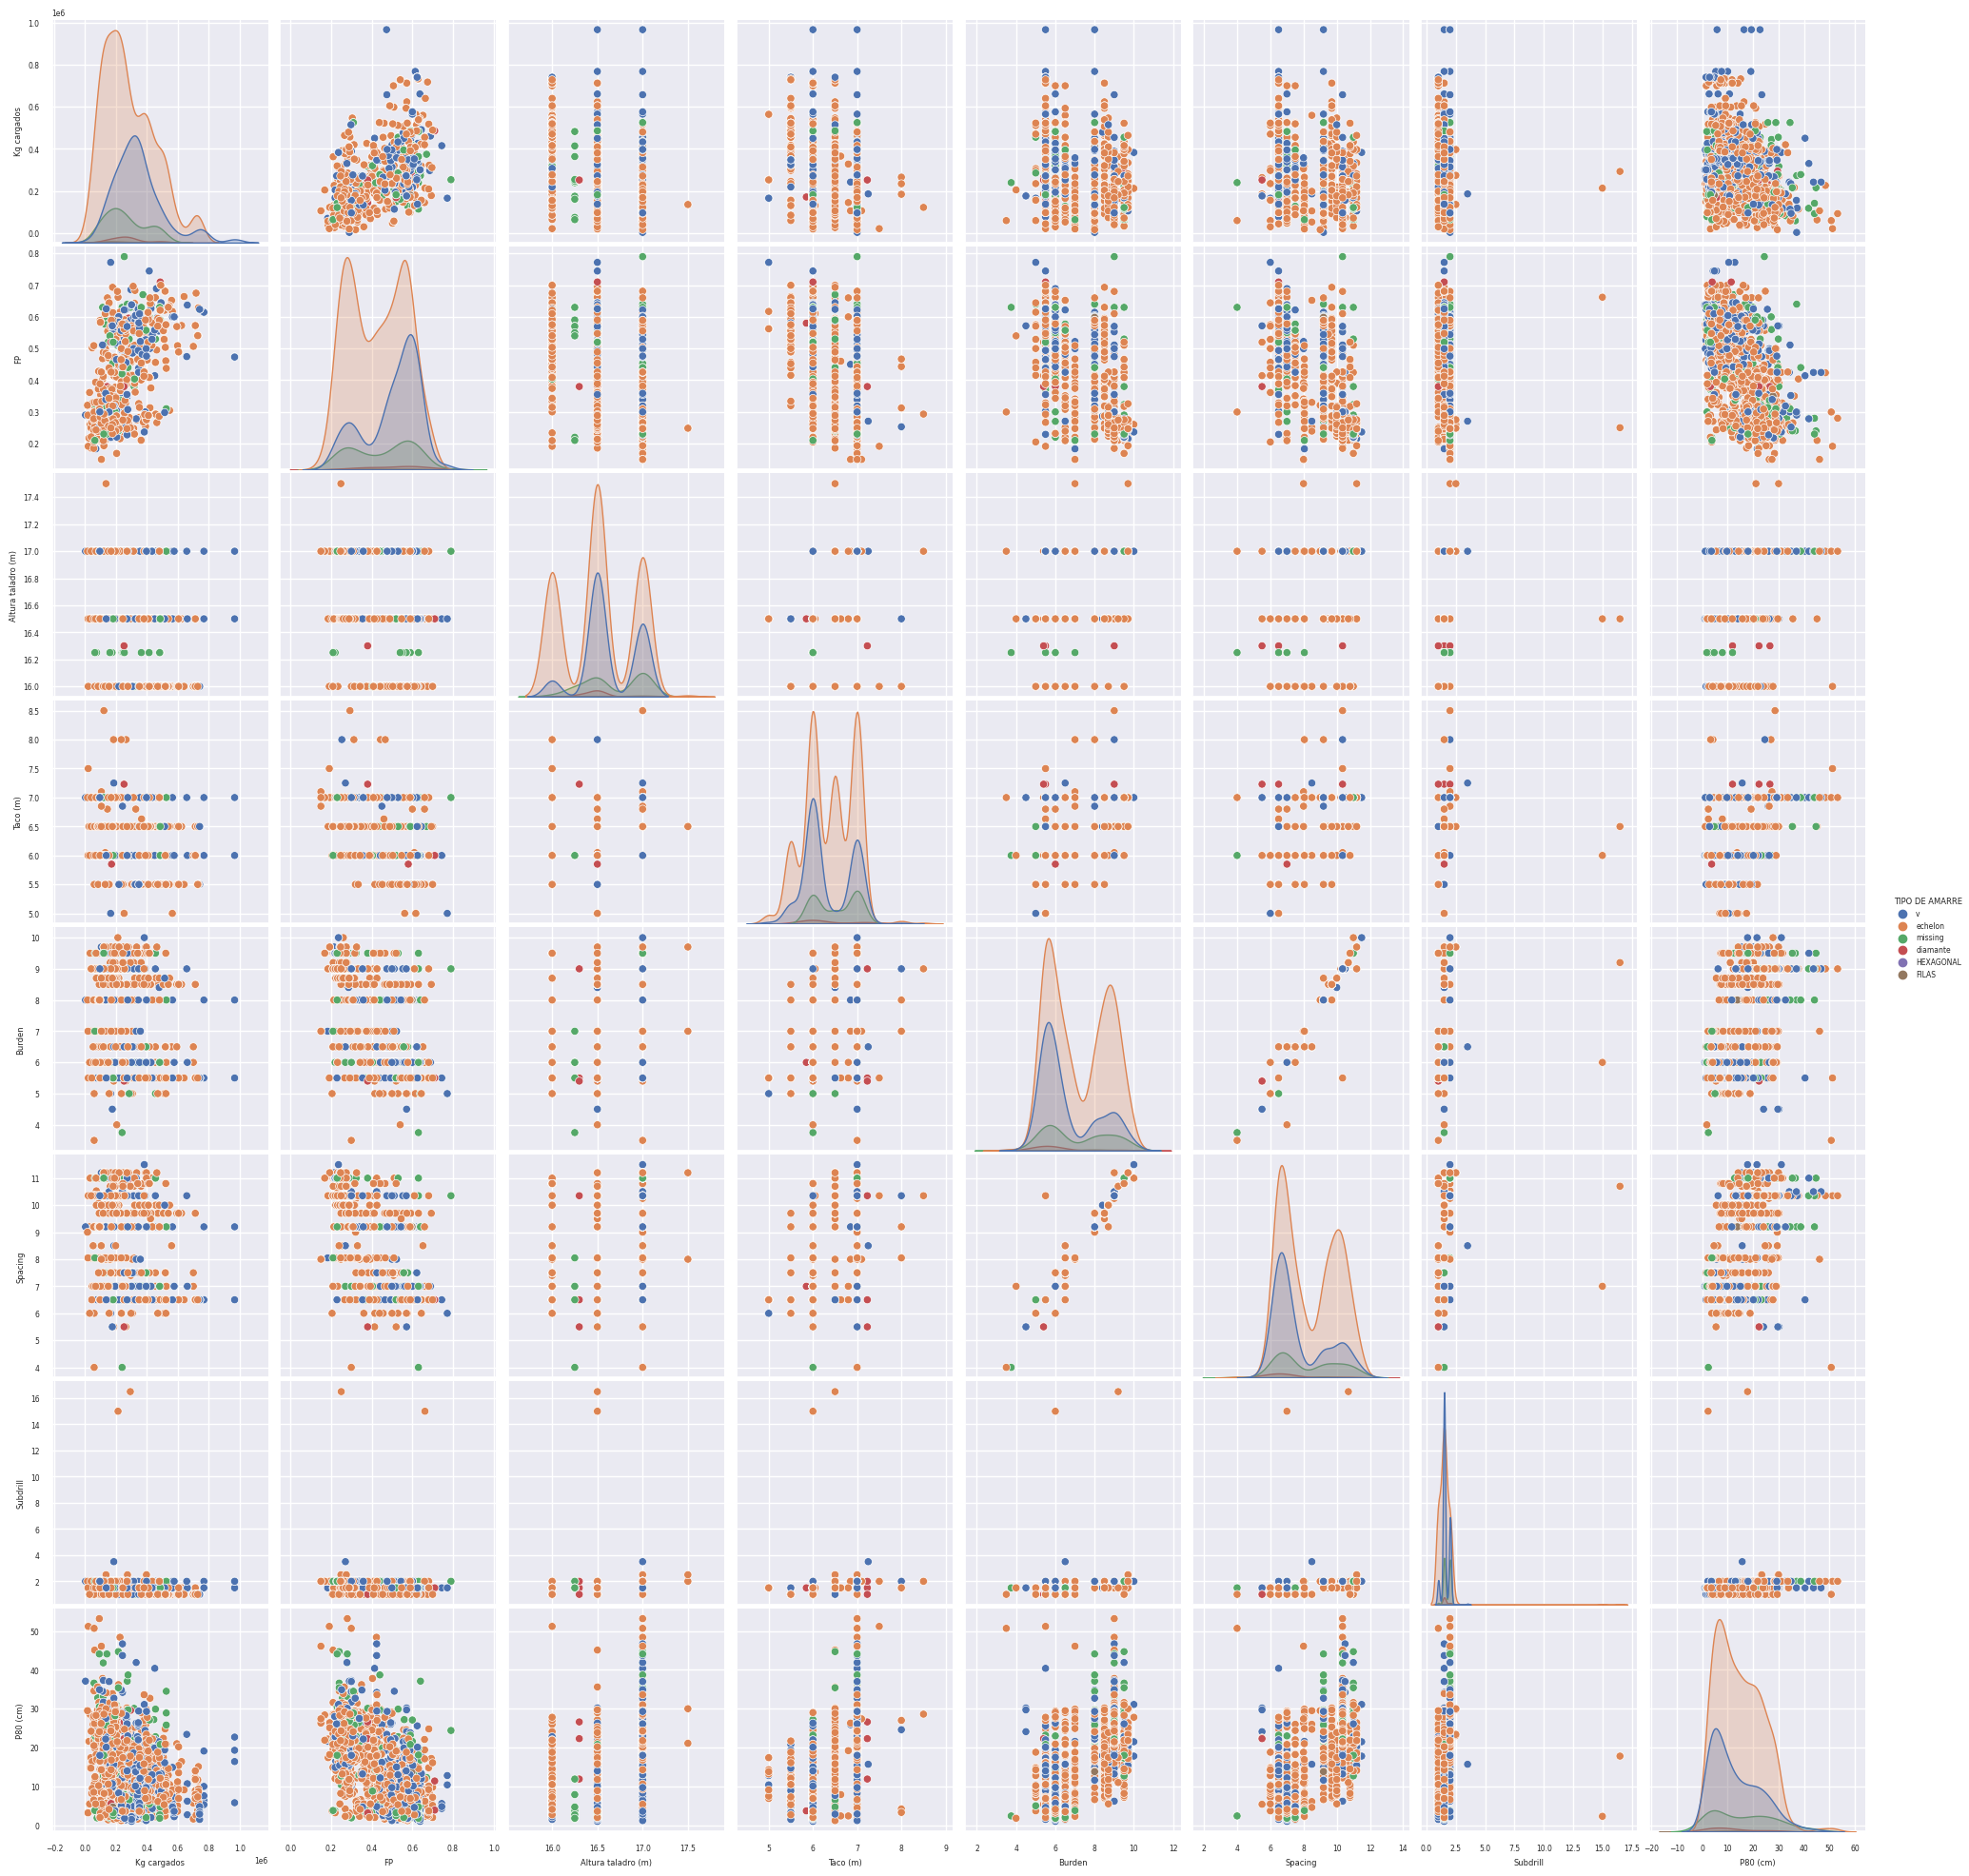

In [ ]:
sns.pairplot(train[numFeatures+target+catFeatures],hue='TIPO DE AMARRE')

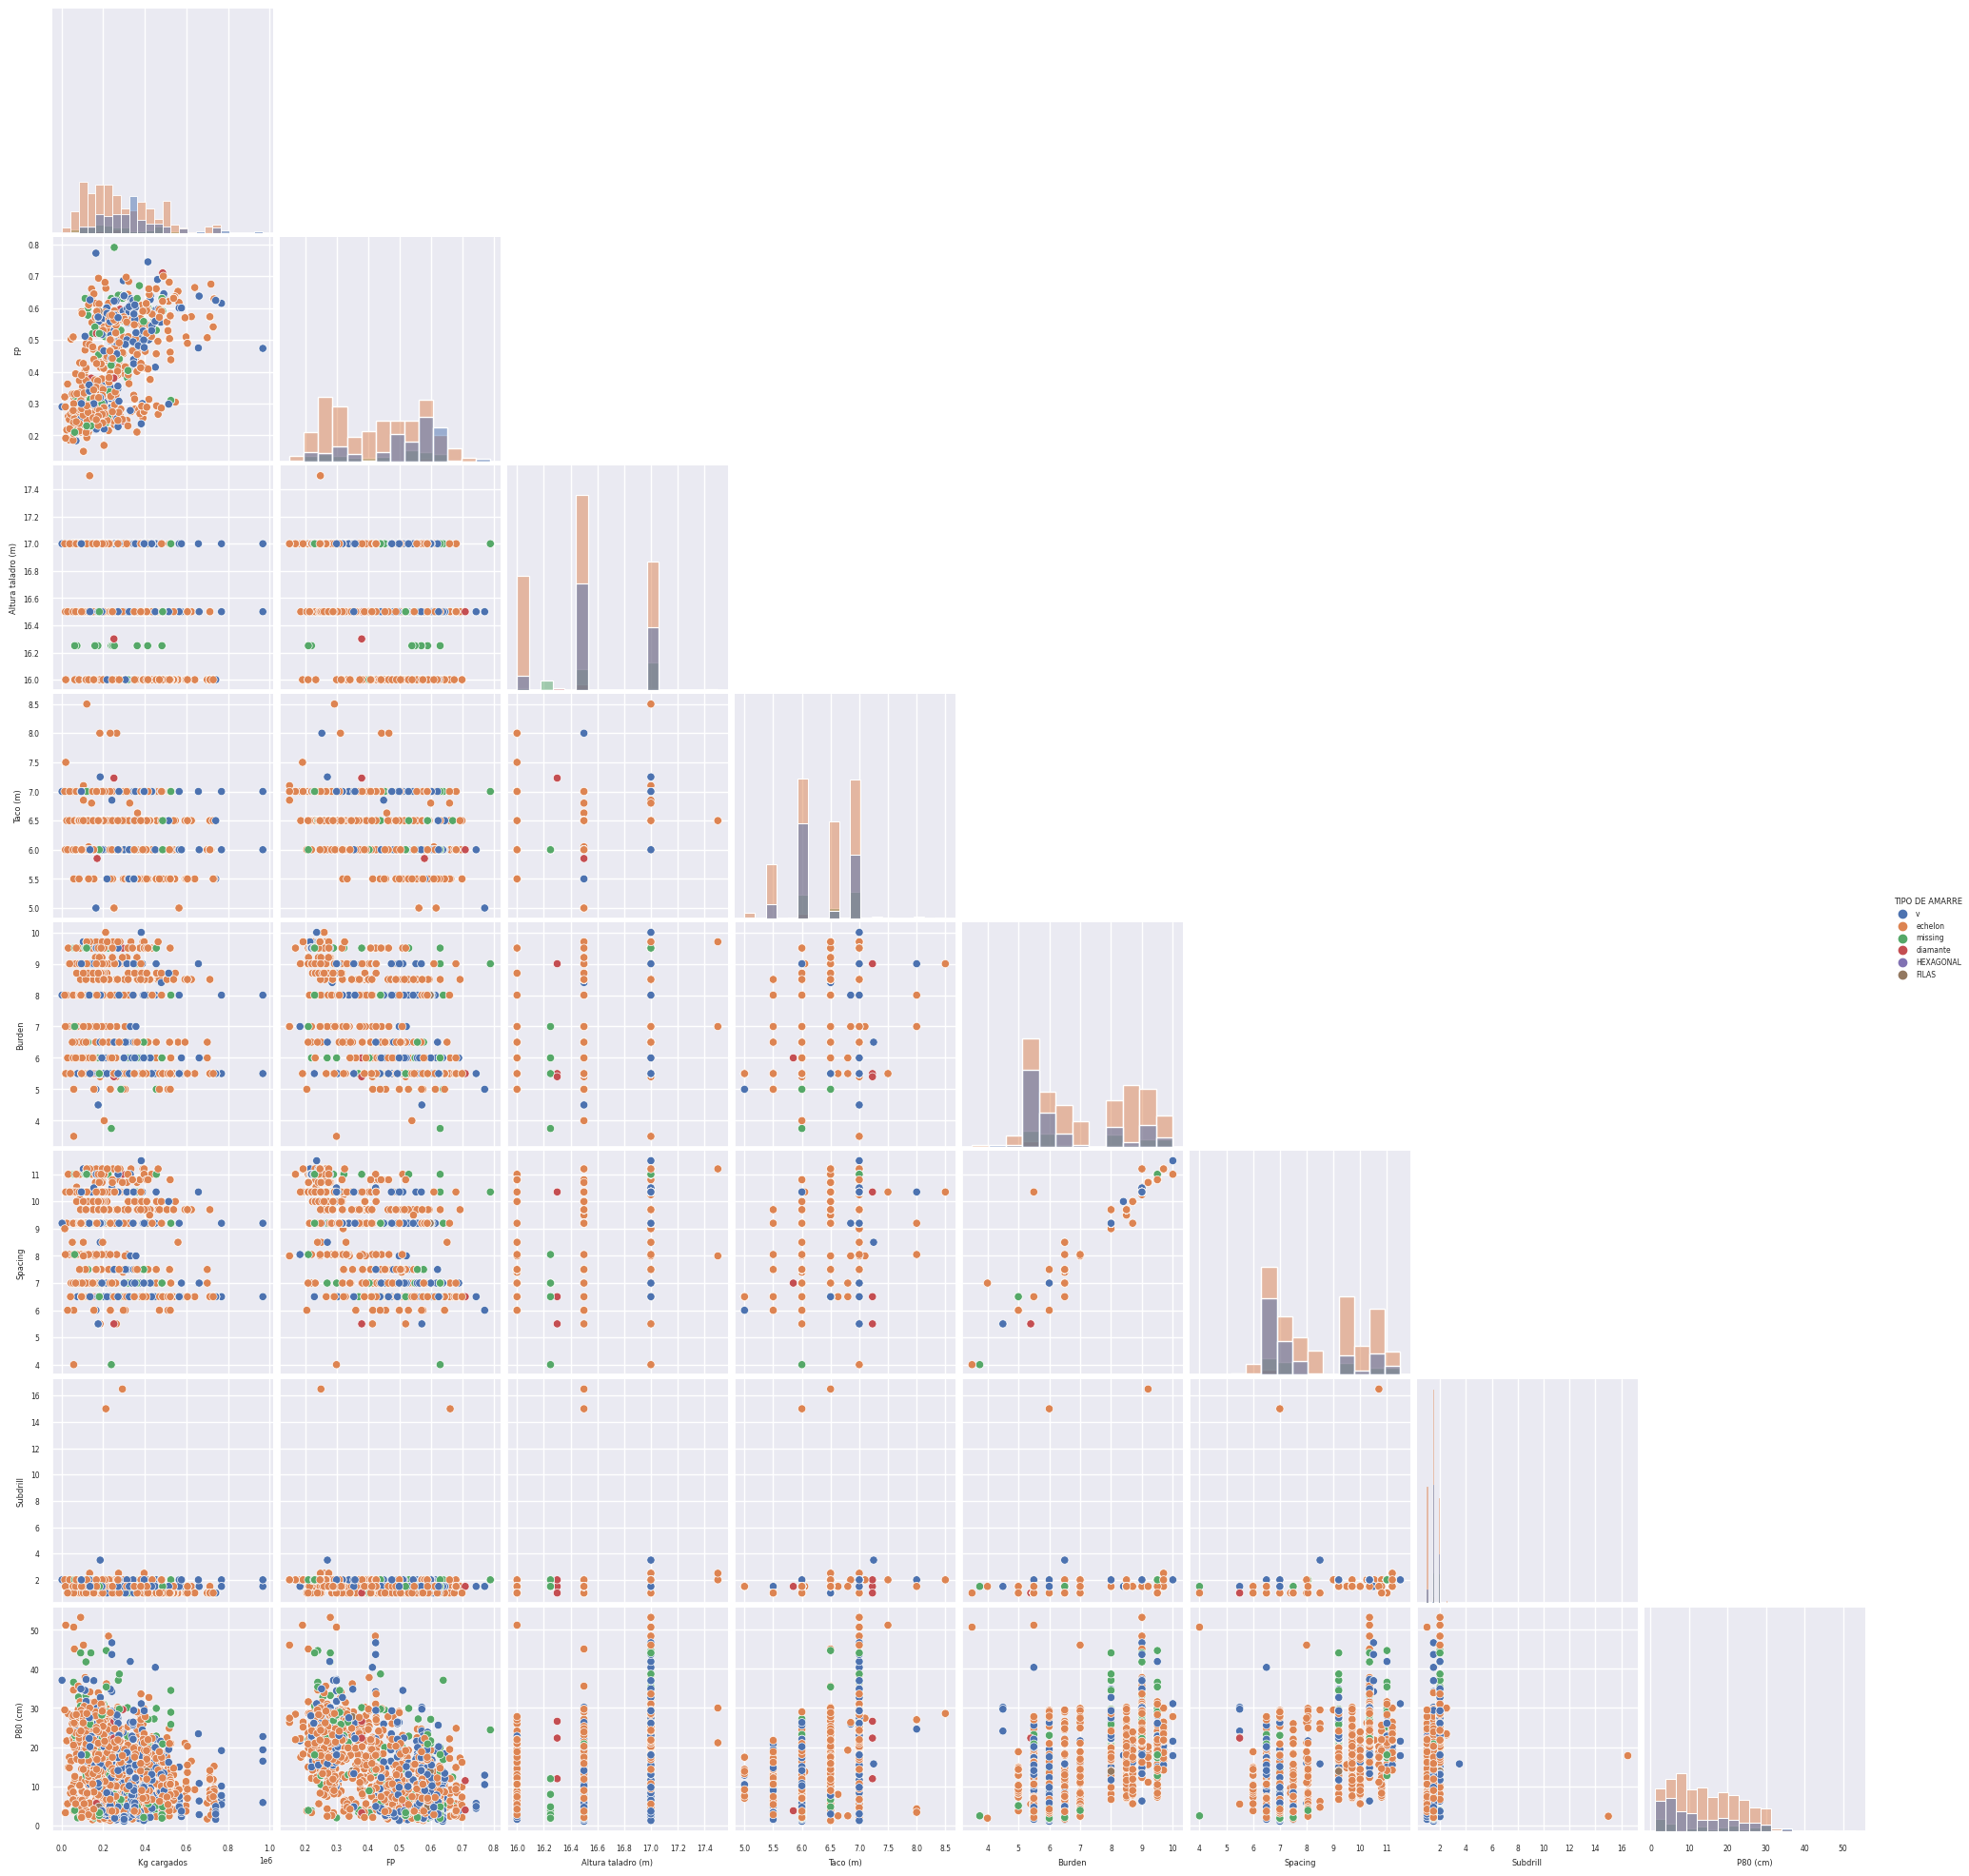

In [ ]:
g = sns.pairplot(train[numFeatures+target+catFeatures],hue='TIPO DE AMARRE', corner=True, diag_kind="hist")

In [ ]:
# Creando métricas de las variables

univariate = train[numFeatures+target].describe(percentiles = [0.01, 0.25, 0.5, 0.75, 0.99]).transpose()
univariate.reset_index(inplace = True)
univariate.rename(columns = {'index':'feature',
                             '1%': 'P1',
                             '25%': 'Q1',
                             '50%': 'median',
                             '75%': 'Q3',
                             '99%': 'P99'}, inplace = True)

univariate[['missing_rate']] = 1 - univariate[['count']]/train.shape[0]
univariate.sort_values(by = 'missing_rate', ascending = False, inplace = True)

In [ ]:
#matriz de correlaciones
corr_matrix = train.corr()
corr_matrix.reset_index(inplace = True)
corr_matrix.rename(columns = {'index': 'feature', 'P80 (cm)': 'correl'}, inplace = True)

#Cruce
univariate_II = pd.merge(univariate, corr_matrix[['feature', 'correl']], on = 'feature', how = 'left') 
univariate_II['correl_abs'] = univariate_II.correl.apply(lambda x: abs(x))
univariate_II.sort_values(by = 'correl_abs', ascending = False, inplace = True)
univariate_II

<ipython-input-91-25422f5e9f39>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train.corr()


feature   count           mean            std        min  \
7            P80 (cm)  1258.0      14.349597       9.451906     1.0000   
3            Taco (m)  1258.0       6.374006       0.544653     5.0000   
5             Spacing  1258.0       8.147917       1.679617     4.0000   
4              Burden  1258.0       7.016017       1.518944     3.5000   
2  Altura taladro (m)  1258.0      16.563712       0.354060    16.0000   
1                  FP  1258.0       0.450495       0.142106     0.1500   
0         Kg cargados  1258.0  297383.467773  163805.670727  2874.0798   
6            Subdrill  1258.0       1.566137       0.664043     1.0000   

             P1           Q1       median            Q3          P99  \
7      1.657000       6.2000      12.7000      21.50000      41.0020   
3      5.500000       6.0000       6.5000       7.00000       7.0000   
5      6.000000       6.5000       7.5000       9.70000      11.2000   
4      5.000000       5.5000       6.5000       8.50000       9.7000   
2     16.000000      16.5000      16.5000      17.00000      17.0000   
1      0.207494       0.3106       0.4769       0.57175       0.6997   
0  46815.301900  176278.5820  265480.8915  395171.72420  740853.9369   
6      1.000000       1.5000       1.5000       2.00000       2.0000   

          max  missing_rate    correl  correl_abs  
7      53.200           0.0  1.000000    1.000000  
3       8.500           0.0  0.658480    0.658480  
5      11.500           0.0  0.619203    0.619203  
4      10.000           0.0  0.610609    0.610609  
2      17.500           0.0  0.598074    0.598074  
1       0.790           0.0 -0.580715    0.580715  
0  967054.248           0.0 -0.345369    0.345369  
6      16.500           0.0  0.276632    0.276632

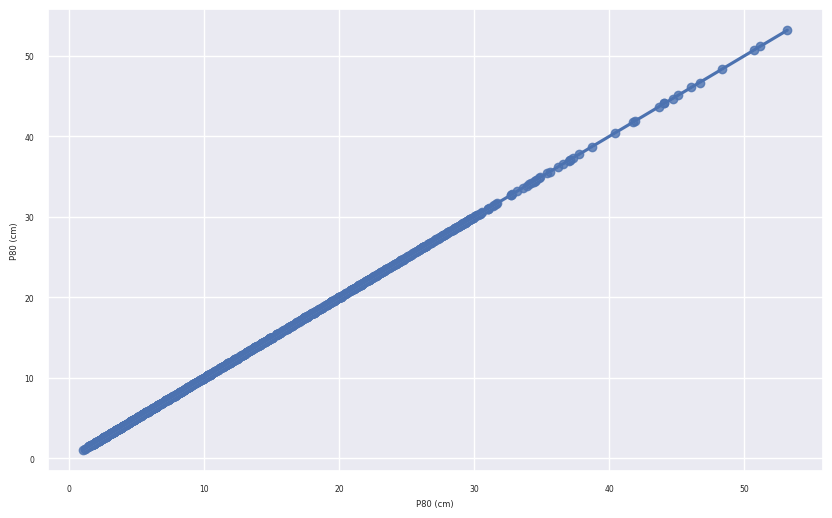

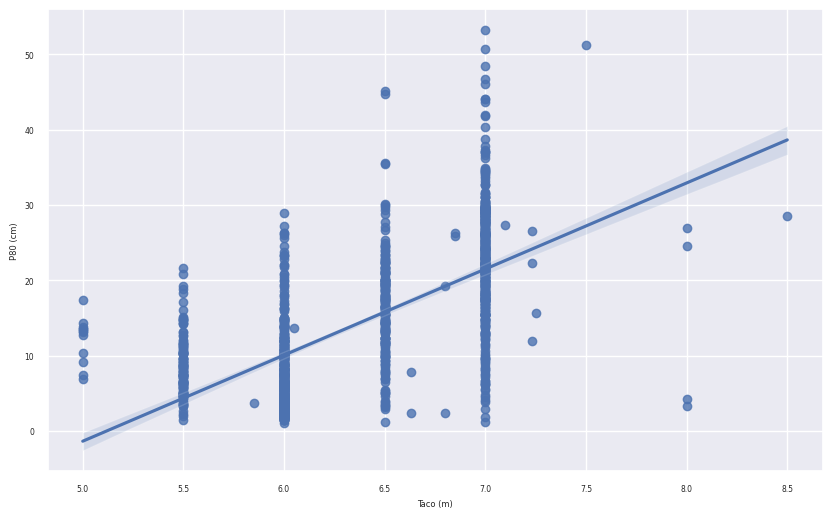

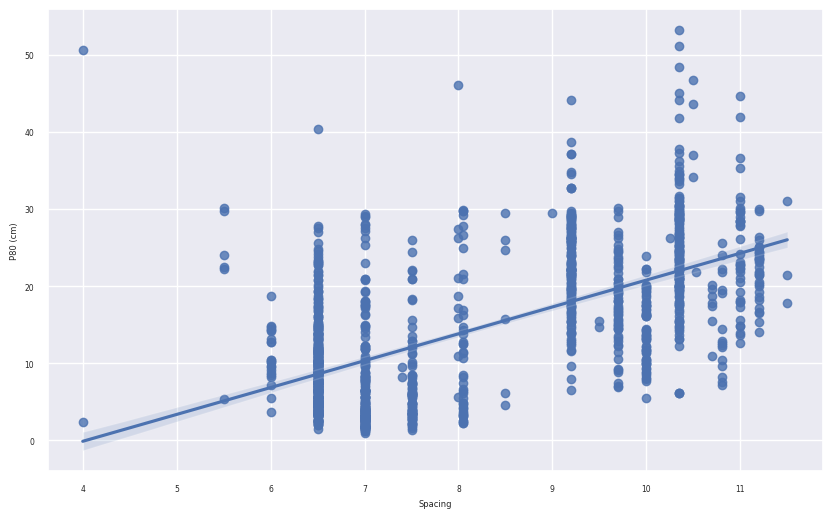

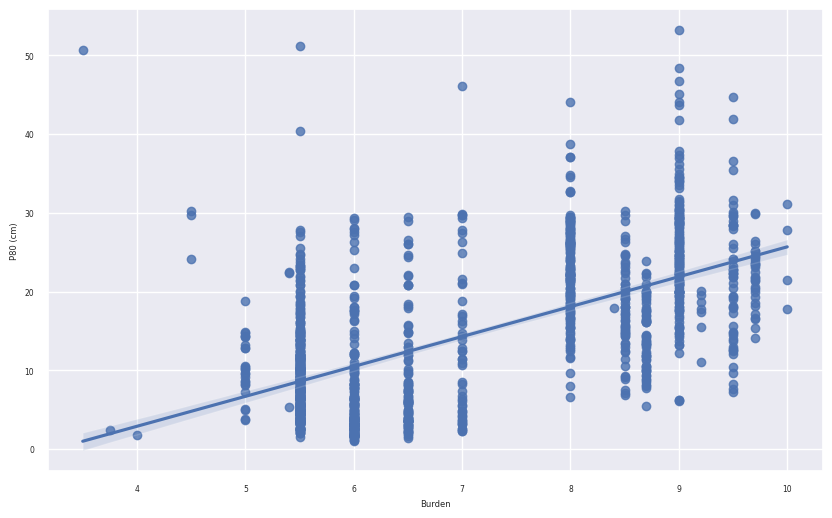

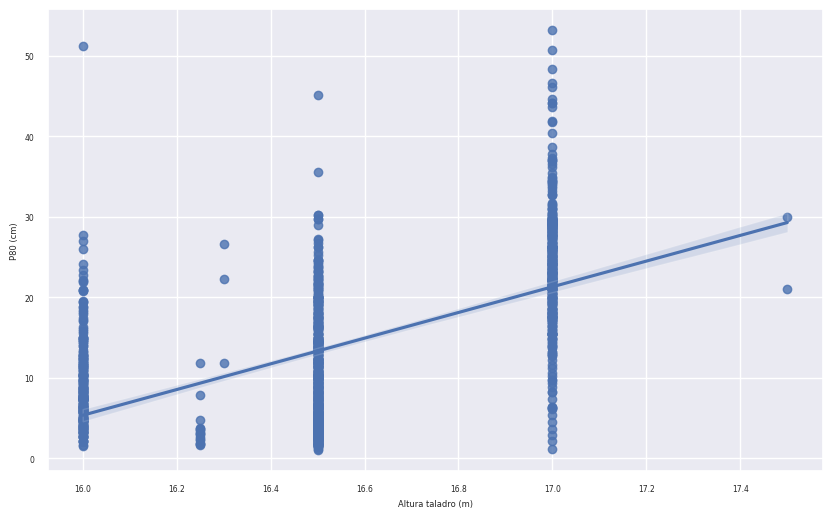

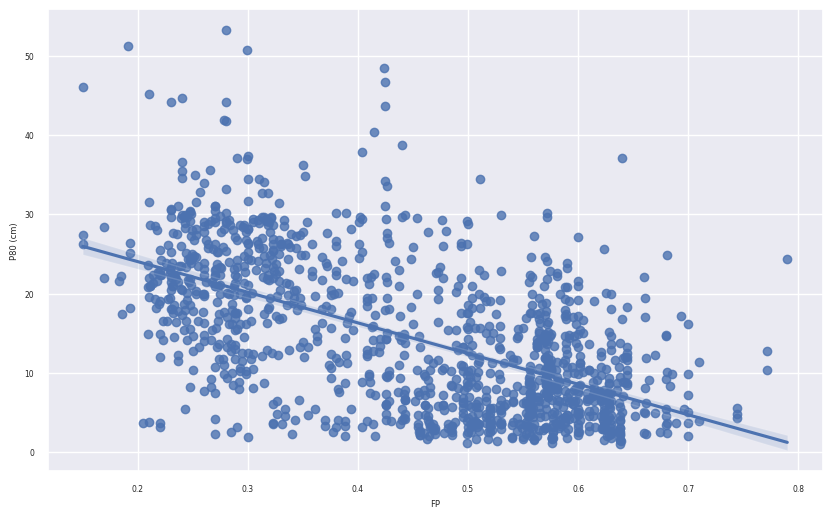

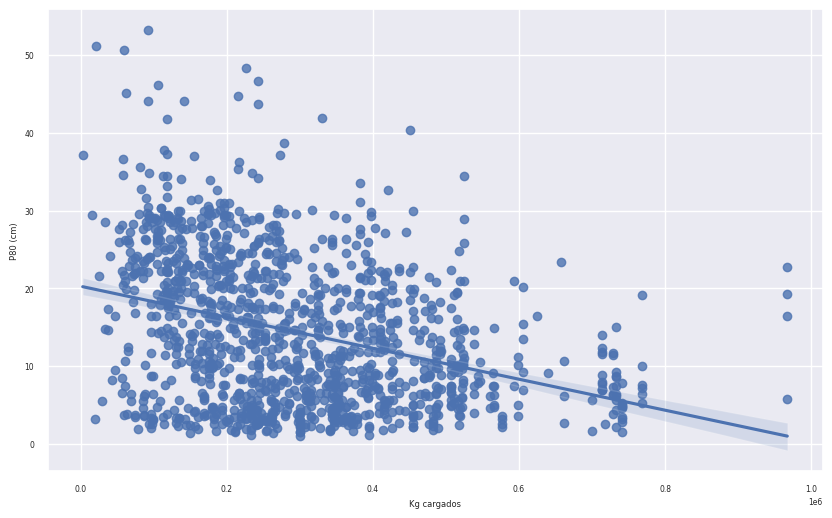

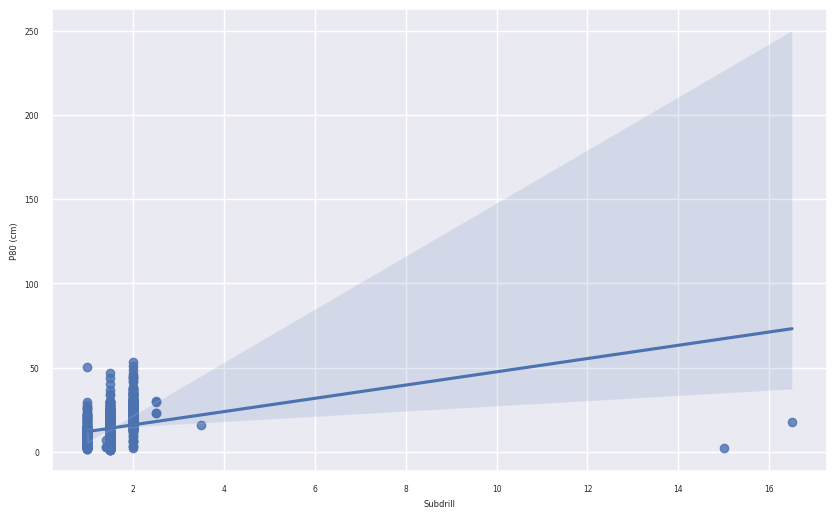

In [ ]:
i = 1
for col in univariate_II['feature']:
    i += 1
    plt.figure(i)
    sns.regplot(x = col, y = 'P80 (cm)', data = train)

REGRESAMOS CON LOS CLIENTES PARA VER SI LE HACE SENTIDO

### <b>Pre-selección de variables:</b>
En muchos casos, la cantidad de variables que tendremos que evaluar será tanta que deberemos filtrar aquellas que identiquemos con menor potencial para predecir nuestro target.
Algunos criterios que podemos tomar, son umbrales de correlación y missing rate.

--- 

Ejemplo:

*   Aquellas variables con correlación  < 0.1 se van
*   Aquellas variables con missing rate > 0.9 se van


In [ ]:
feature_prefilter = list(set(univariate_II.loc[univariate_II.correl_abs >= 0.1].loc[univariate_II.missing_rate <= 0.9].feature.tolist()) - set(['P80 (cm)'])) 

In [ ]:
univariate_II

feature   count           mean            std        min  \
7            P80 (cm)  1258.0      14.349597       9.451906     1.0000   
3            Taco (m)  1258.0       6.374006       0.544653     5.0000   
5             Spacing  1258.0       8.147917       1.679617     4.0000   
4              Burden  1258.0       7.016017       1.518944     3.5000   
2  Altura taladro (m)  1258.0      16.563712       0.354060    16.0000   
1                  FP  1258.0       0.450495       0.142106     0.1500   
0         Kg cargados  1258.0  297383.467773  163805.670727  2874.0798   
6            Subdrill  1258.0       1.566137       0.664043     1.0000   

             P1           Q1       median            Q3          P99  \
7      1.657000       6.2000      12.7000      21.50000      41.0020   
3      5.500000       6.0000       6.5000       7.00000       7.0000   
5      6.000000       6.5000       7.5000       9.70000      11.2000   
4      5.000000       5.5000       6.5000       8.50000       9.7000   
2     16.000000      16.5000      16.5000      17.00000      17.0000   
1      0.207494       0.3106       0.4769       0.57175       0.6997   
0  46815.301900  176278.5820  265480.8915  395171.72420  740853.9369   
6      1.000000       1.5000       1.5000       2.00000       2.0000   

          max  missing_rate    correl  correl_abs  
7      53.200           0.0  1.000000    1.000000  
3       8.500           0.0  0.658480    0.658480  
5      11.500           0.0  0.619203    0.619203  
4      10.000           0.0  0.610609    0.610609  
2      17.500           0.0  0.598074    0.598074  
1       0.790           0.0 -0.580715    0.580715  
0  967054.248           0.0 -0.345369    0.345369  
6      16.500           0.0  0.276632    0.276632

In [ ]:
print(f'Cantidad de variables iniciales: {univariate_II.shape[0]}')
print(f'Cantidad de variables luego de pre-seleccion: {len(feature_prefilter)}')

Cantidad de variables iniciales: 8
Cantidad de variables luego de pre-seleccion: 7


<Axes: >

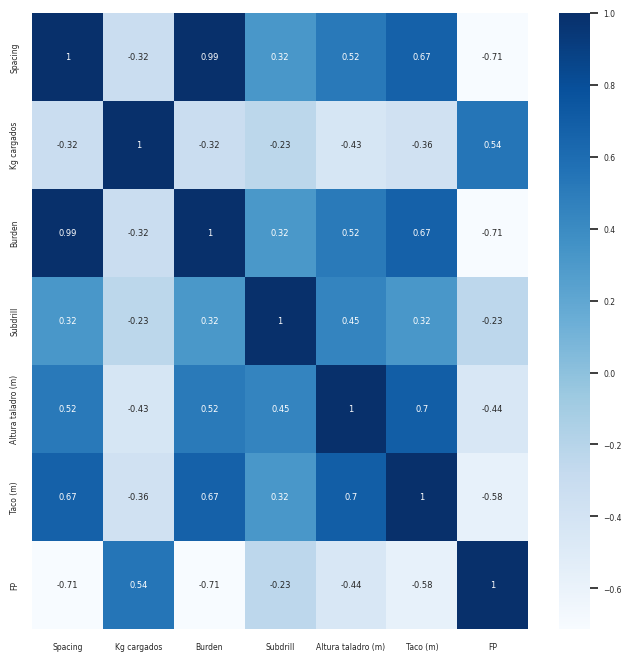

In [ ]:
univariate_III = train[feature_prefilter]
corr = univariate_III.corr()
plt.figure(figsize=(8, 8))
sns.set(font_scale=0.5
        )
sns.heatmap(corr, cmap="Blues", annot=True)

## Tratamiento de outliers




In [ ]:
# Tratamiento de outliers por percentiles

univariate_II['li_zscore'] = univariate_II['P1']
univariate_II['ls_zscore'] = univariate_II['P99']


In [ ]:
# Tratamiento de outliers por Z-score

def zscore(dataframe, univariate, featuresToTreat):
  for col in featuresToTreat:
    desc = univariate.loc[univariate.feature == col]
    dataframe[col + '_tzs'] = dataframe[col].apply(lambda x: desc.ls_zscore.values[0] if x > desc.ls_zscore.values[0]
                                                            else desc.li_zscore.values[0] if x < desc.li_zscore.values[0]
                                                            else x)
  return dataframe

In [ ]:
train_I = zscore(train, univariate_II, univariate_II.feature.to_list())
test_I  = zscore(test,  univariate_II, univariate_II.feature.to_list())

In [ ]:
train_I

Kg cargados      FP  Altura taladro (m)  Taco (m)  Burden  Spacing  \
749   293950.4338  0.4558                16.5       6.0     6.0      7.0   
1180  370401.2700  0.5100                17.0       7.0     5.5      6.5   
162   185393.6400  0.4300                16.5       6.0     6.0      7.0   
1408  380422.1566  0.2734                16.5       6.5     8.7     10.0   
958    74447.3024  0.3167                17.0       7.0     8.0      9.2   
...           ...     ...                 ...       ...     ...      ...   
1122  397424.4750  0.4761                17.0       7.0     8.0      9.2   
1346  271205.5934  0.2471                17.0       6.5     9.7     11.2   
1406  385561.4758  0.2917                16.5       6.5     8.7     10.0   
1389  409766.1126  0.2886                16.5       6.5     8.7     10.0   
1534  380784.4140  0.4126                16.5       6.5     8.5      9.7   

      Subdrill Fase      Proyecto Tipo de material  ... Matriz_coded  \
749        1.5    6  6-NP-3968-37              M4B  ...    14.636445   
1180       1.5    8  8-NP-4193-30                A  ...    11.840829   
162        1.5    6  6-NP-3908-05               M1  ...    14.636445   
1408       1.5    9  9-NP-4328-19                C  ...    14.636445   
958        2.0    8  8-NP-4148-39                A  ...    14.636445   
...        ...  ...           ...              ...  ...          ...   
1122       2.0    8  8-NP-4118-04                A  ...    14.636445   
1346       2.0    9  9-NP-4403-22                C  ...    14.636445   
1406       1.5    9  9-NP-4328-15                C  ...    14.636445   
1389       1.5    9  9-NP-4358-23                C  ...    14.636445   
1534       1.5    8  8-NP-4073-28                C  ...    14.636445   

     Fotografía_coded P80 (cm)_tzs Taco (m)_tzs  Spacing_tzs Burden_tzs  \
749         14.001225         14.6          6.0          7.0        6.0   
1180        14.001225         23.0          7.0          6.5        5.5   
162         14.001225          3.9          6.0          7.0        6.0   
1408        14.001225         11.8          6.5         10.0        8.7   
958         14.001225         23.9          7.0          9.2        8.0   
...               ...          ...          ...          ...        ...   
1122        14.001225         29.3          7.0          9.2        8.0   
1346        14.001225         21.8          6.5         11.2        9.7   
1406        14.001225          8.9          6.5         10.0        8.7   
1389        14.001225         11.8          6.5         10.0        8.7   
1534        14.001225         15.8          6.5          9.7        8.5   

      Altura taladro (m)_tzs  FP_tzs  Kg cargados_tzs  Subdrill_tzs  
749                     16.5  0.4558      293950.4338           1.5  
1180                    17.0  0.5100      370401.2700           1.5  
162                     16.5  0.4300      185393.6400           1.5  
1408                    16.5  0.2734      380422.1566           1.5  
958                     17.0  0.3167       74447.3024           2.0  
...                      ...     ...              ...           ...  
1122                    17.0  0.4761      397424.4750           2.0  
1346                    17.0  0.2471      271205.5934           2.0  
1406                    16.5  0.2917      385561.4758           1.5  
1389                    16.5  0.2886      409766.1126           1.5  
1534                    16.5  0.4126      380784.4140           1.5  

[1258 rows x 31 columns]

In [ ]:
numFeatures_tzscore = [x + '_tzs' for x in numFeatures]

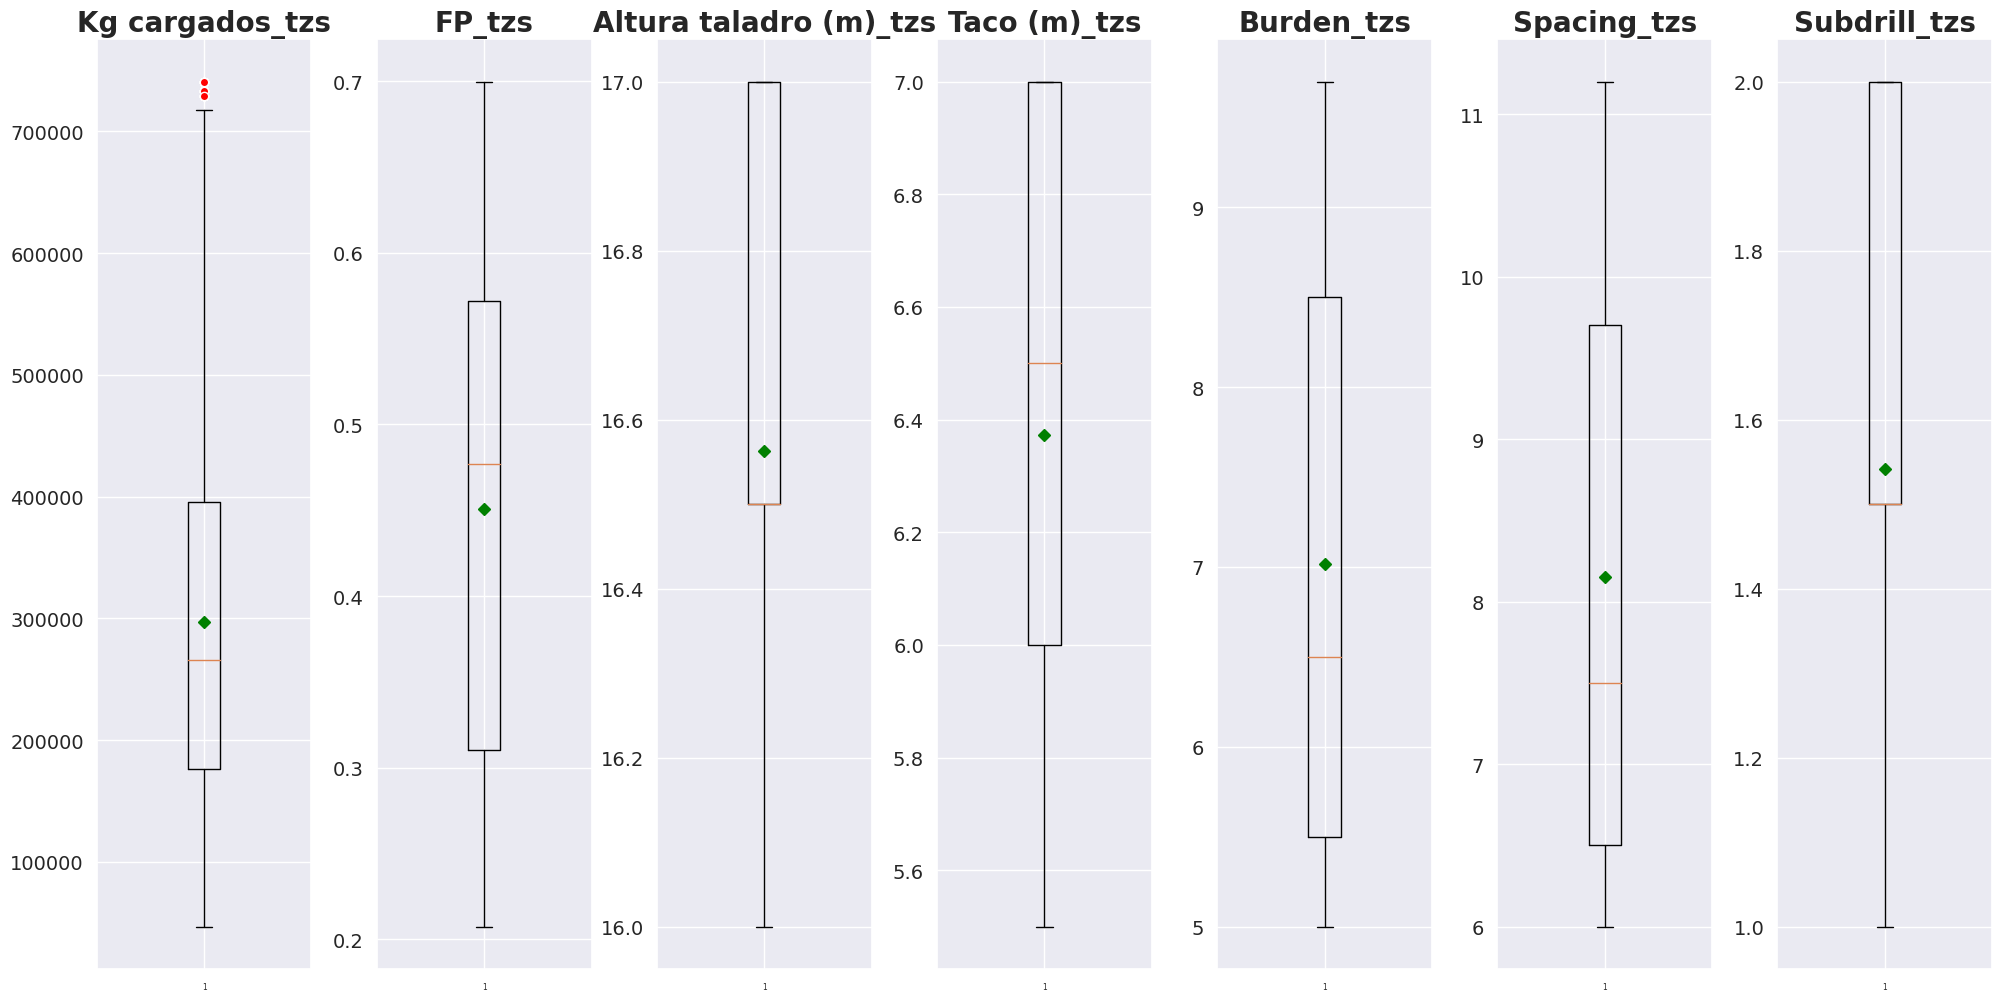

In [ ]:
train_tzscore = train[numFeatures_tzscore]
red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')
mean_shape = dict(markerfacecolor='green', marker='D', markeredgecolor='green')

fig, axs = plt.subplots(1, len(train_tzscore.columns), figsize=(20,10))

for i, ax in enumerate(axs.flat):
    ax.boxplot(train_tzscore.iloc[:,i], flierprops=red_circle,  
             showmeans=True, meanprops=mean_shape)
    train_tzscore.iloc[:,i]
    ax.set_title(train_tzscore.columns[i], fontsize=20, fontweight='bold')
    ax.tick_params(axis='y', labelsize=14)
    
    #Checking if column names are equal to columns we expect to be logarithmic
    if train_tzscore.columns[i] == 'RDEP' or train_tzscore.columns[i] == 'RMED':
        ax.semilogy()
    
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Subdrill')

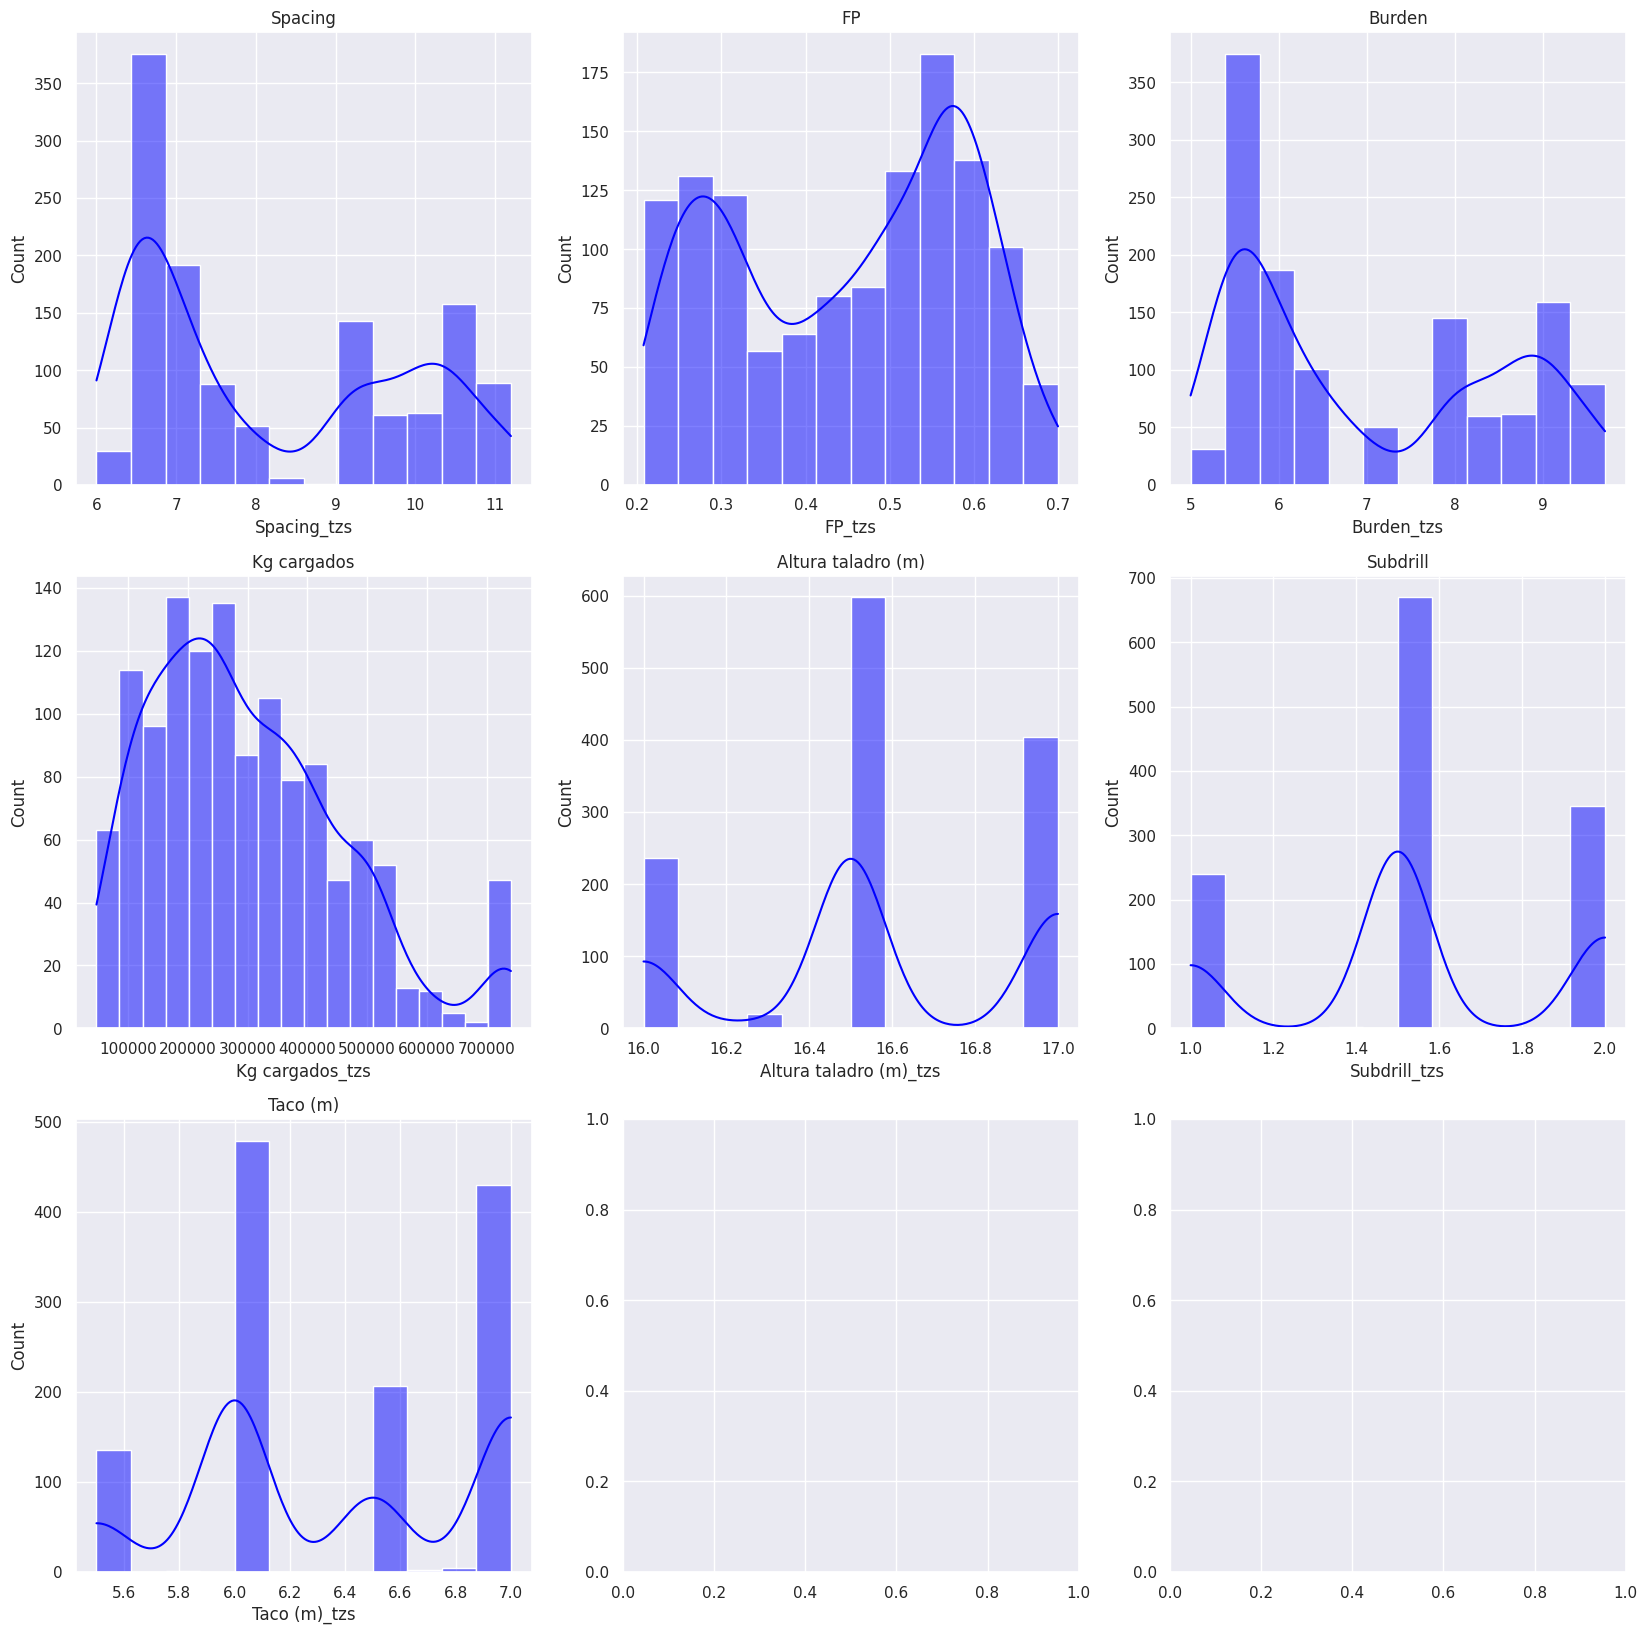

In [ ]:
sns.set(style="darkgrid")

fig, axs = plt.subplots(3, 3, figsize=(20, 20))

b = sns.histplot(data=train_tzscore, x="Kg cargados_tzs", kde=True, color="blue", ax=axs[1, 0])
c = sns.histplot(data=train_tzscore, x="FP_tzs", kde=True, color="blue", ax=axs[0, 1])
d = sns.histplot(data=train_tzscore, x="Altura taladro (m)_tzs", kde=True, color="blue", ax=axs[1, 1])
e = sns.histplot(data=train_tzscore, x="Taco (m)_tzs", kde=True, color="blue", ax=axs[2, 0])
f = sns.histplot(data=train_tzscore, x="Burden_tzs", kde=True, color="blue", ax=axs[0, 2])
g = sns.histplot(data=train_tzscore, x="Spacing_tzs", kde=True, color="blue", ax=axs[0, 0])
h = sns.histplot(data=train_tzscore, x="Subdrill_tzs", kde=True, color="blue", ax=axs[1, 2])
b.set_title("Kg cargados")
c.set_title("FP")
d.set_title("Altura taladro (m)")
f.set_title("Burden")
e.set_title("Taco (m)")
g.set_title("Spacing")
h.set_title("Subdrill")

## Estandarización

In [ ]:
#Estandarización de datos
variables = ['Spacing_tzs',
 'Taco (m)_tzs',
 'FP_tzs',
 'Altura taladro (m)_tzs',
 'Kg cargados_tzs',
 'Subdrill_tzs',
 'Burden_tzs']

train_II = (train_I[variables] - train_I[variables].mean())/train_I[variables].std()
test_II  = (test_I[variables] - test_I[variables].mean())/test_I[variables].std()


## 5. Modelo de regresión lineal

In [ ]:
train_III = train_II
test_III = test_II

In [ ]:
# Fit and summarize OLS model
mod = sm.OLS(train_I[['P80 (cm)' + '_tzs']], 
             sm.add_constant(train_III))
res = mod.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:           P80 (cm)_tzs   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.556
Method:                 Least Squares   F-statistic:                     226.2
Date:                Fri, 28 Apr 2023   Prob (F-statistic):          5.24e-217
Time:                        19:37:46   Log-Likelihood:                -4071.2
No. Observations:                1258   AIC:                             8158.
Df Residuals:                    1250   BIC:                             8200.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     14

In [ ]:
variables_mod = list(set(train_III.columns.tolist()) - set(['Subdrill_tzs']))

# Fit and summarize OLS model
mod = sm.OLS(train_I[['P80 (cm)' + '_tzs']], sm.add_constant(train_III[variables_mod]))
res = mod.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:           P80 (cm)_tzs   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.557
Method:                 Least Squares   F-statistic:                     264.1
Date:                Fri, 28 Apr 2023   Prob (F-statistic):          3.13e-218
Time:                        19:37:46   Log-Likelihood:                -4071.2
No. Observations:                1258   AIC:                             8156.
Df Residuals:                    1251   BIC:                             8192.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     14

In [ ]:
variables_mod = list(set(train_III.columns.tolist()) - set(['Subdrill_tzs', 'Kg cargados_tzs'])) #probibilidad menor a 0.05

# Fit and summarize OLS model
mod = sm.OLS(train_I[['P80 (cm)' + '_tzs']], sm.add_constant(train_III[variables_mod]))
res = mod.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:           P80 (cm)_tzs   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.557
Method:                 Least Squares   F-statistic:                     316.5
Date:                Fri, 28 Apr 2023   Prob (F-statistic):          3.37e-219
Time:                        19:37:46   Log-Likelihood:                -4071.9
No. Observations:                1258   AIC:                             8156.
Df Residuals:                    1252   BIC:                             8187.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     14

In [ ]:
modelo = pd.DataFrame({'coeficiente' : res.params})
modelo.reset_index(inplace = True)
modelo.rename(columns = {'index': 'feature'}, inplace = True)
modelo = modelo.loc[modelo.feature != 'const']
modelo['peso'] = modelo.coeficiente/modelo.coeficiente.sum()
modelo.sort_values(by = 'peso', ascending = False, inplace = True)
modelo

feature  coeficiente      peso
1             Spacing_tzs     7.632352  1.681888
5            Taco (m)_tzs     2.684645  0.591596
2  Altura taladro (m)_tzs     1.951519  0.430043
3                  FP_tzs    -1.782712 -0.392844
4              Burden_tzs    -5.947838 -1.310683

## 6. Control de correlaciones

In [ ]:
train_III[variables_mod].corr()

Spacing_tzs  Altura taladro (m)_tzs    FP_tzs  \
Spacing_tzs                1.000000                0.522315 -0.718906   
Altura taladro (m)_tzs     0.522315                1.000000 -0.443487   
FP_tzs                    -0.718906               -0.443487  1.000000   
Burden_tzs                 0.995186                0.518523 -0.717675   
Taco (m)_tzs               0.692529                0.732941 -0.584180   

                        Burden_tzs  Taco (m)_tzs  
Spacing_tzs               0.995186      0.692529  
Altura taladro (m)_tzs    0.518523      0.732941  
FP_tzs                   -0.717675     -0.584180  
Burden_tzs                1.000000      0.691498  
Taco (m)_tzs              0.691498      1.000000

In [ ]:
variables_mod = list(set(train_III.columns.tolist()) - set(['Subdrill_tzs', 'Kg cargados_tzs','Burden_tzs'])) #A mas burden no se tiene menor p80

# Fit and summarize OLS model
mod = sm.OLS(train_I[['P80 (cm)' + '_tzs']], sm.add_constant(train_III[variables_mod]))
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:           P80 (cm)_tzs   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     389.7
Date:                Fri, 28 Apr 2023   Prob (F-statistic):          4.12e-218
Time:                        19:37:46   Log-Likelihood:                -4077.5
No. Observations:                1258   AIC:                             8165.
Df Residuals:                    1253   BIC:                             8191.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     14

In [ ]:
train_III[variables_mod].corr()

Altura taladro (m)_tzs  Spacing_tzs  Taco (m)_tzs  \
Altura taladro (m)_tzs                1.000000     0.522315      0.732941   
Spacing_tzs                           0.522315     1.000000      0.692529   
Taco (m)_tzs                          0.732941     0.692529      1.000000   
FP_tzs                               -0.443487    -0.718906     -0.584180   

                          FP_tzs  
Altura taladro (m)_tzs -0.443487  
Spacing_tzs            -0.718906  
Taco (m)_tzs           -0.584180  
FP_tzs                  1.000000

## 7. Evaluación en test

In [ ]:
train_III[variables_mod]

Altura taladro (m)_tzs  Spacing_tzs  Taco (m)_tzs    FP_tzs
749                -0.178482    -0.690759     -0.713511  0.037700
1180                1.239901    -0.990369      1.198466  0.422296
162                -0.178482    -0.690759     -0.713511 -0.145374
1408               -0.178482     1.106897      0.242478 -1.256589
958                 1.239901     0.627522      1.198466 -0.949337
...                      ...          ...           ...       ...
1122                1.239901     0.627522      1.198466  0.181746
1346                1.239901     1.825960      0.242478 -1.443210
1406               -0.178482     1.106897      0.242478 -1.126734
1389               -0.178482     1.106897      0.242478 -1.148731
1534               -0.178482     0.927132      0.242478 -0.268842

[1258 rows x 4 columns]

In [ ]:
train_VI = sm.add_constant(train_III[variables_mod])
test_VI = sm.add_constant(test_III[variables_mod])

train_VI['prediction'] = res.predict(train_VI)
test_VI['prediction'] = res.predict(test_VI)

train_VI['P80 (cm)' + '_tzs'] = train_I[['P80 (cm)' + '_tzs']]
test_VI['P80 (cm)' + '_tzs'] = test_I[['P80 (cm)' + '_tzs']]


In [ ]:
from sklearn.metrics import r2_score

In [ ]:
print(f'R2 en train: {r2_score(train_VI["P80 (cm)" + "_tzs"], train_VI.prediction)}')
print(f'R2 en test:  {r2_score(test_VI["P80 (cm)" + "_tzs"], test_VI.prediction)}')

R2 en train: 0.5543864137256252
R2 en test:  0.5522414191605263


In [ ]:
test_VI[['prediction', 'P80 (cm)' + '_tzs']].head()

prediction  P80 (cm)_tzs
708    10.675997           5.1
1322   22.231286          25.8
270     8.187601          11.8
756    10.660453           3.4
1565   22.553086          22.0

In [ ]:
test_VI['error'] = test_VI['prediction'] - test_VI['P80 (cm)'+ '_tzs']
test_VI['error_rel'] = test_VI['error']/test_VI['P80 (cm)' + '_tzs']

test_VI[['prediction', 'P80 (cm)' + '_tzs', 'error_rel']]

prediction  P80 (cm)_tzs  error_rel
708    10.675997           5.1   1.093333
1322   22.231286          25.8  -0.138322
270     8.187601          11.8  -0.306136
756    10.660453           3.4   2.135427
1565   22.553086          22.0   0.025140
...          ...           ...        ...
1532   14.980160          21.7  -0.309670
1338   22.773423          25.4  -0.103409
1677   20.565417           5.9   2.485664
1590    9.169597           8.5   0.078776
250     8.278363           3.5   1.365247

[540 rows x 3 columns]

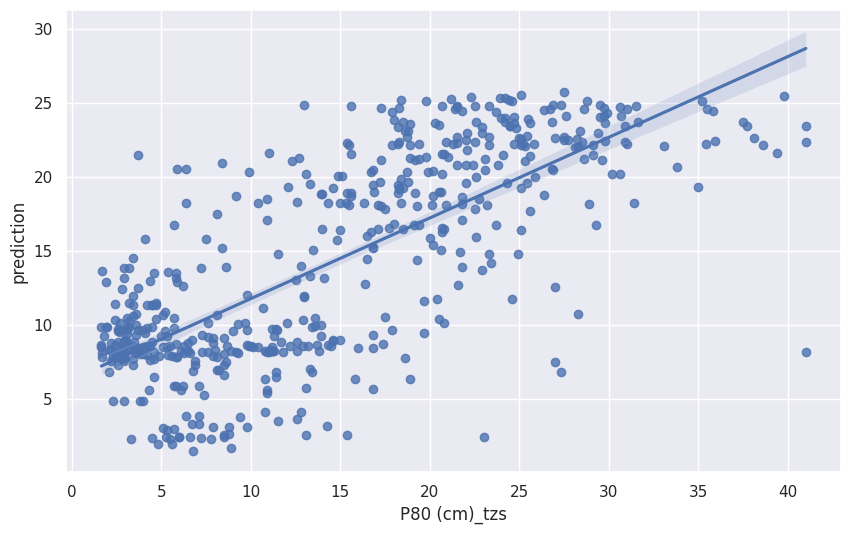

In [ ]:
import seaborn as sns
sns.regplot(x = 'P80 (cm)_tzs', y = 'prediction', data = test_VI)

plt.show()

In [ ]:
def rango_error(x):
  if abs(x) > 0.5:
    return '>+-50%'
  elif abs(x) >= 0.25:
    return '<+-50%'
  elif abs(x) < 0.25:
    return '<+-25%'


In [ ]:
test_VI['rango_error'] = test_VI.error_rel.apply(lambda x: rango_error(x))

In [ ]:
number_0_25 = test_VI[test_VI['rango_error']=='<+-25%']
number_25_50 = test_VI[test_VI['rango_error']=='<+-50%']
number_50_100 = test_VI[test_VI['rango_error']=='>+-50%']

In [ ]:
print('%01',round(len(number_0_25)*100/len(test_VI),2),'%')
print('%02',round(len(number_25_50)*100/len(test_VI),2),'%')

%01 43.15 %
%02 22.59 %


##Decision Tree

In [ ]:
pddf_train = copy.deepcopy(train00)
pddf_test = copy.deepcopy(test00)
pddf_total = pd.concat([pddf_train,pddf_test])

In [ ]:
pddf_total.columns

Index(['Kg cargados', 'FP', 'Altura taladro (m)', 'Taco (m)', 'Burden',
       'Spacing', 'Subdrill', 'Fase', 'Proyecto', 'Tipo de material',
       'Clasificación', 'TIPO DE AMARRE', 'Matriz', 'Fotografía', 'P80 (cm)',
       'rango_percentil', 'Fase_coded', 'Proyecto_coded',
       'Tipo de material_coded', 'Clasificación_coded', 'TIPO DE AMARRE_coded',
       'Matriz_coded', 'Fotografía_coded'],
      dtype='object')

##Definicion de variables

In [ ]:
#Variables para el modelo

numFeatures = ['Kg cargados', 'FP', 'Altura taladro (m)', 'Taco (m)', 'Burden', 'Spacing', 'Subdrill']
catFeatures = ['Fase', 'Proyecto', 'Tipo de material', 'Clasificación','TIPO DE AMARRE', 'Matriz', 'Fotografía']
catFeatures_coded = [x + '_coded' for x in catFeatures]
target = 'P80 (cm)'

X = pddf_total[numFeatures + catFeatures_coded]
y = pddf_total[target]

In [ ]:
pddf_total

Kg cargados      FP  Altura taladro (m)  Taco (m)  Burden  Spacing  \
749   293950.4338  0.4558                16.5       6.0     6.0     7.00   
1180  370401.2700  0.5100                17.0       7.0     5.5     6.50   
162   185393.6400  0.4300                16.5       6.0     6.0     7.00   
1408  380422.1566  0.2734                16.5       6.5     8.7    10.00   
958    74447.3024  0.3167                17.0       7.0     8.0     9.20   
...           ...     ...                 ...       ...     ...      ...   
1532  178654.6125  0.3185                16.5       6.0     8.5     9.70   
1338  135541.6956  0.2484                17.5       6.5     9.7    11.20   
1677  315308.1649  0.5527                17.0       7.0     9.0    10.35   
1590  241274.1898  0.5593                16.5       6.0     6.0     7.00   
250   324843.7500  0.6300                16.5       6.0     6.0     7.00   

      Subdrill Fase      Proyecto Tipo de material  ...  Fotografía P80 (cm)  \
749        1.5    6  6-NP-3968-37              M4B  ...  produccion     14.6   
1180       1.5    8  8-NP-4193-30                A  ...  produccion     23.0   
162        1.5    6  6-NP-3908-05               M1  ...  produccion      3.9   
1408       1.5    9  9-NP-4328-19                C  ...  produccion     11.8   
958        2.0    8  8-NP-4148-39                A  ...  produccion     23.9   
...        ...  ...           ...              ...  ...         ...      ...   
1532       1.5    8  8-NP-4073-13                C  ...  produccion     21.7   
1338       2.5    9  9-NP-4388-11                C  ...  produccion     25.4   
1677       2.0    6  6-NP-3908-29                A  ...  produccion      5.9   
1590       1.5    6  6-NP-3968-33                A  ...  produccion      8.5   
250        1.5    6  6-NP-3908-21               M1  ...  produccion      3.5   

     rango_percentil Fase_coded  Proyecto_coded Tipo de material_coded  \
749    percentil_p75   9.057406       14.382177               8.890464   
1180   percentil_p99  15.442983       13.673539              20.839133   
162    percentil_p25   9.057406       12.990016               4.712225   
1408   percentil_p50  20.656545       14.122693              21.318682   
958    percentil_p99  15.442983       15.592186              20.839133   
...              ...        ...             ...                    ...   
1532   percentil_p99  15.442983       14.837556              21.318682   
1338   percentil_p99  20.656545       15.938386              21.318682   
1677   percentil_p25   9.057406       12.965061              20.839133   
1590   percentil_p50   9.057406       12.802432              20.839133   
250    percentil_p25   9.057406       14.349597               4.712225   

      Clasificación_coded  TIPO DE AMARRE_coded  Matriz_coded  \
749              7.232215             13.044694     14.636445   
1180            21.200494             14.663831     11.840829   
162              7.232215             14.663831     14.636445   
1408            21.200494             14.663831     14.636445   
958             21.200494             14.663831     14.636445   
...                   ...                   ...           ...   
1532            21.200494             14.663831     14.636445   
1338            21.200494             14.663831     14.636445   
1677            21.200494             13.044694     14.636445   
1590            21.200494             14.663831     14.636445   
250              7.232215             13.044694     14.636445   

      Fotografía_coded  
749          14.001225  
1180         14.001225  
162          14.001225  
1408         14.001225  
958          14.001225  
...                ...  
1532         14.001225  
1338         14.001225  
1677         14.001225  
1590         14.001225  
250          14.001225  

[1798 rows x 23 columns]

##Seleccion de parametros optimos de discretizacion

In [ ]:
# Discretizar variable 

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.pipeline import Pipeline

# Create a pipeline with the KBinsDiscretizer and the DecisionTreeRegressor or RandomForestRegressor
pipe_dt = Pipeline([('discretizer', KBinsDiscretizer()), ('regressor', DecisionTreeRegressor())])

# Define the hyperparameters to search over
params = {'discretizer__n_bins': [8, 20, 25 , 30, 35, 40, 50, 75, 90, 200, 400, 5000, 6000], 
          'discretizer__encode': ['ordinal'], 
          'discretizer__strategy': ['quantile','uniform']}

# Use GridSearchCV to find the best combination of hyperparameters
grid_dt = GridSearchCV(pipe_dt, params, cv=5)
grid_dt.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:279: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 2 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:279: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 3 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:279: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 4 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:279: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 5 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:279

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('discretizer', KBinsDiscretizer()),
                                       ('regressor', DecisionTreeRegressor())]),
             param_grid={'discretizer__encode': ['ordinal'],
                         'discretizer__n_bins': [8, 20, 25, 30, 35, 40, 50, 75,
                                                 90, 200, 400, 5000, 6000],
                         'discretizer__strategy': ['quantile', 'uniform']})

In [ ]:
# Print the best combination of hyperparameters for the DecisionTreeRegressor
print("Best hyperparameters for DecisionTreeRegressor:", grid_dt.best_params_)

print("Best score for Decision Tree:", grid_dt.best_score_)
print("Best parameters for Decision Tree:", grid_dt.best_params_)

Best hyperparameters for DecisionTreeRegressor: {'discretizer__encode': 'ordinal', 'discretizer__n_bins': 8, 'discretizer__strategy': 'uniform'}
Best score for Decision Tree: 0.636586146328135
Best parameters for Decision Tree: {'discretizer__encode': 'ordinal', 'discretizer__n_bins': 8, 'discretizer__strategy': 'uniform'}


###Discretizer

<ipython-input-130-9397256a7a6c>:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(pddf_total[i], palette = 'hls', discrete=True)
<ipython-input-130-9397256a7a6c>:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(pddf_total[i], palette = 'hls', discrete=True)
<ipython-input-130-9397256a7a6c>:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(pddf_total[i], palette = 'hls', discrete=True)
<ipython-input-130-9397256a7a6c>:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(pddf_total[i], palette = 'hls', discrete=True)
<ipython-input-130-9397256a7a6c>:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(pddf_total[i], palette = 'hls', discrete=True)
<ipython-input-130-9397256a7a6c>:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(pdd

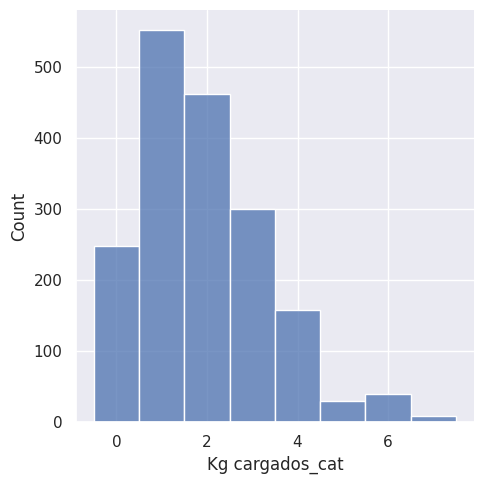

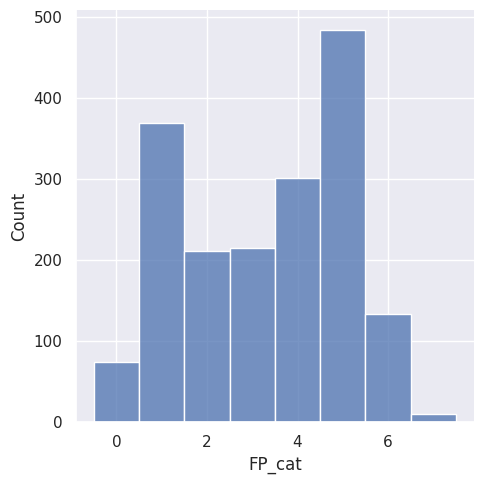

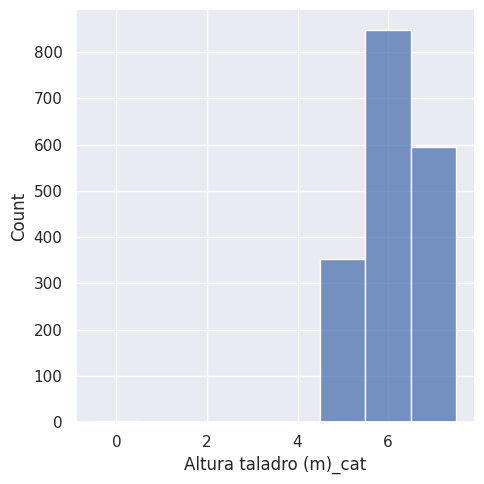

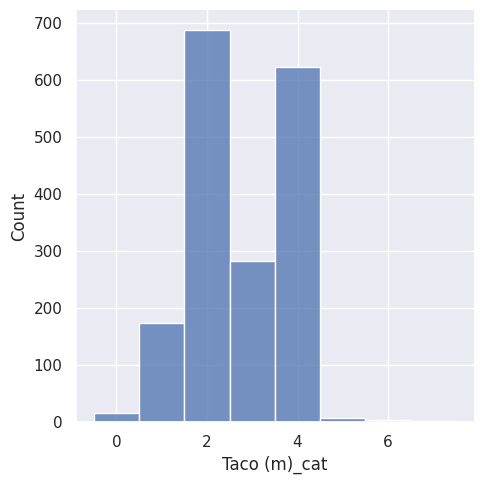

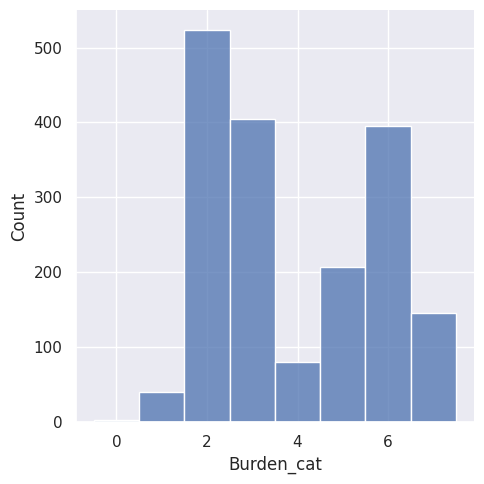

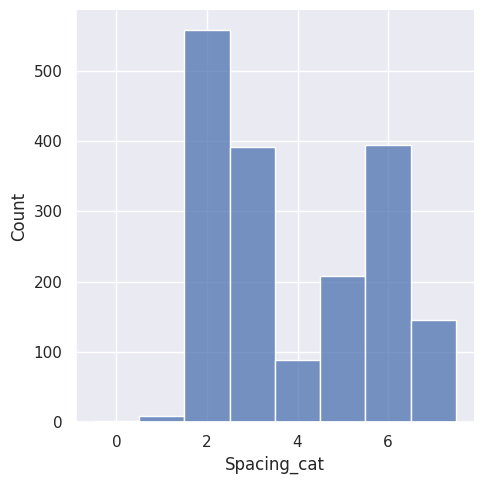

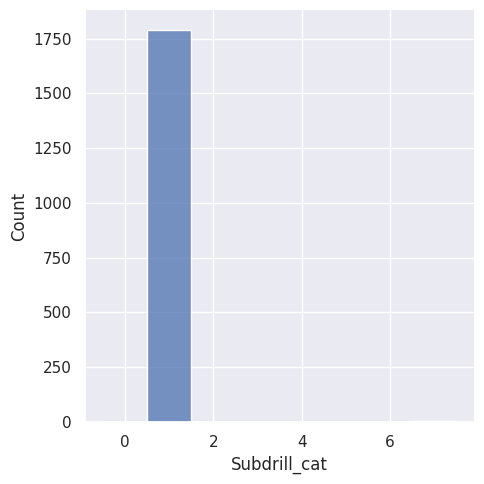

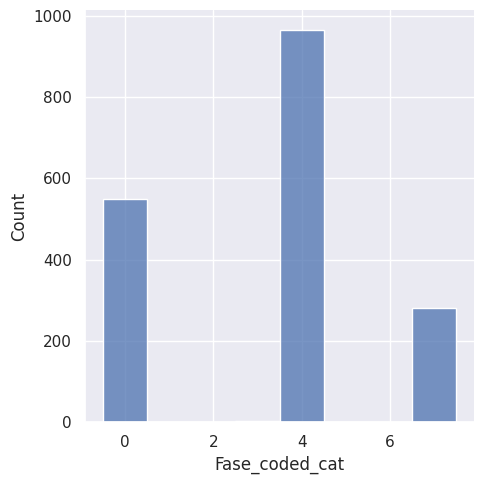

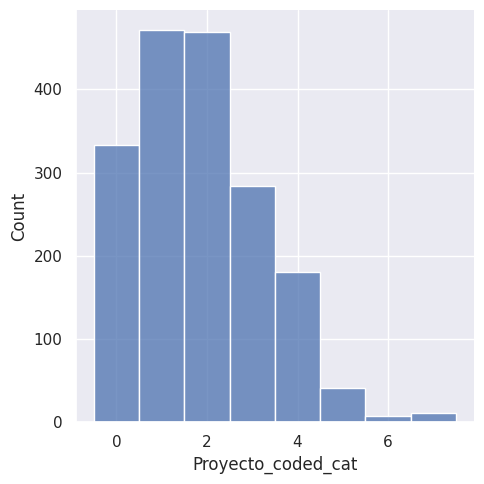

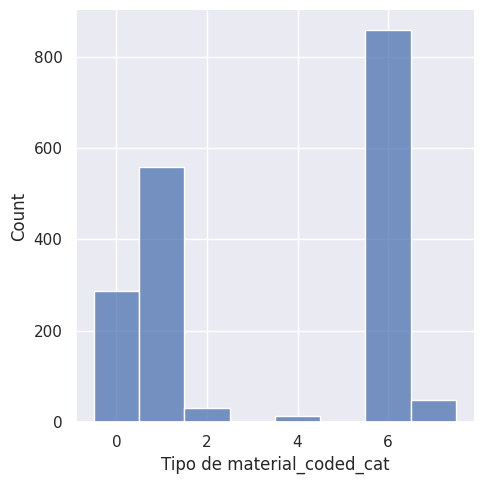

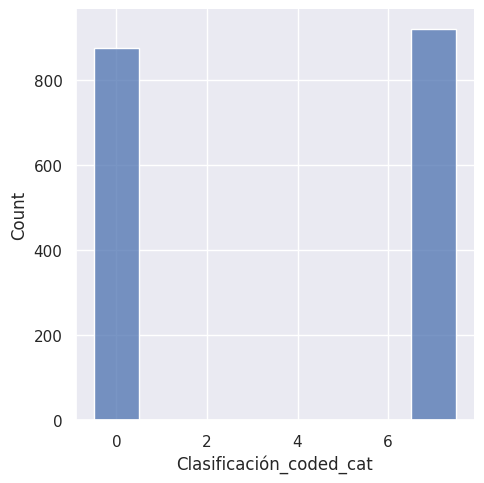

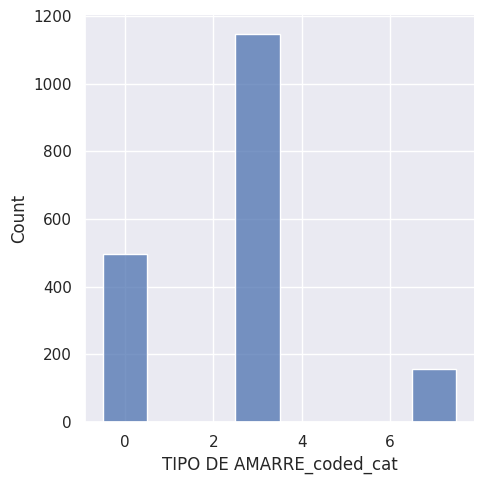

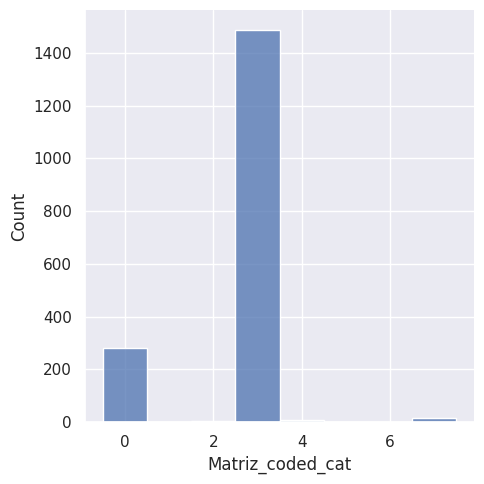

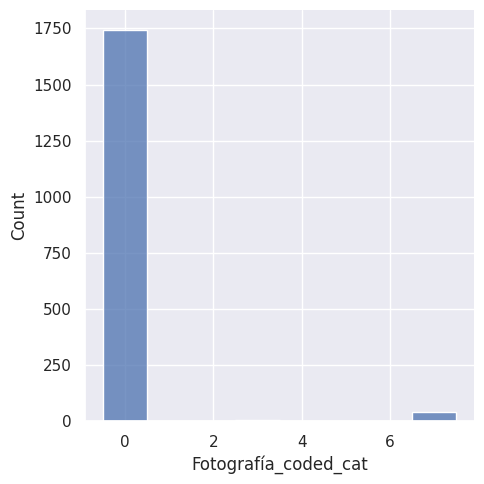

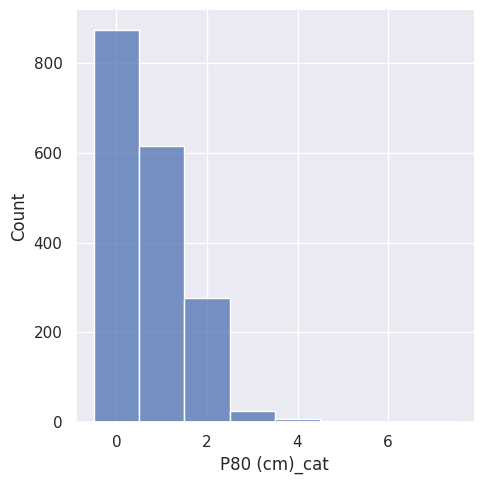

In [ ]:
#n_bins_optimal = [8,35,40,75,90,200,400,500,6000]
discretizer = KBinsDiscretizer(n_bins=8, encode='ordinal', strategy='uniform')

numFeatures_cat = [x + '_cat' for x in numFeatures+catFeatures_coded+['P80 (cm)']]

pddf_total[numFeatures_cat] = discretizer.fit_transform(pddf_total[numFeatures+catFeatures_coded+['P80 (cm)']])

for i in numFeatures_cat:
  sns.displot(pddf_total[i], palette = 'hls', discrete=True)

      Kg cargados  Kg cargados_cat  P80 (cm)
749   293950.4338              2.0      14.6
1180  370401.2700              3.0      23.0
162   185393.6400              1.0       3.9
1408  380422.1566              3.0      11.8
958    74447.3024              0.0      23.9
...           ...              ...       ...
1532  178654.6125              1.0      21.7
1338  135541.6956              1.0      25.4
1677  315308.1649              2.0       5.9
1590  241274.1898              1.0       8.5
250   324843.7500              2.0       3.5

[1798 rows x 3 columns]
   Kg cargados_cat   P80 (cm)  Kg cargados
0              0.0  19.850766  121950.7380
1              1.0  16.975170  243567.5864
2              2.0  12.293131  363772.8678
3              3.0  12.313000  482641.7400
4              4.0  10.442848  605055.8280
5              5.0   9.313333  717910.2728
6              6.0   6.930090  768436.5515
7              7.0  14.811111  967054.2480


<ipython-input-131-9cc8246ddb25>:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(data=pddf_total, x=f'{j}_cat', y='P80 (cm)', palette = 'hls')


--------------
          FP  FP_cat  P80 (cm)
749   0.4558     3.0      14.6
1180  0.5100     4.0      23.0
162   0.4300     3.0       3.9
1408  0.2734     1.0      11.8
958   0.3167     2.0      23.9
...      ...     ...       ...
1532  0.3185     2.0      21.7
1338  0.2484     1.0      25.4
1677  0.5527     5.0       5.9
1590  0.5593     5.0       8.5
250   0.6300     6.0       3.5

[1798 rows x 3 columns]
   FP_cat   P80 (cm)      FP
0     0.0  21.589189  0.2291
1     1.0  22.003917  0.3096
2     2.0  19.896066  0.3896
3     3.0  14.669708  0.4680
4     4.0  10.099114  0.5496
5     5.0   9.410341  0.6287
6     6.0   8.986940  0.7100
7     7.0  12.640000  0.7900


<ipython-input-131-9cc8246ddb25>:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(data=pddf_total, x=f'{j}_cat', y='P80 (cm)', palette = 'hls')


--------------
      Altura taladro (m)  Altura taladro (m)_cat  P80 (cm)
749                 16.5                     6.0      14.6
1180                17.0                     7.0      23.0
162                 16.5                     6.0       3.9
1408                16.5                     6.0      11.8
958                 17.0                     7.0      23.9
...                  ...                     ...       ...
1532                16.5                     6.0      21.7
1338                17.5                     7.0      25.4
1677                17.0                     7.0       5.9
1590                16.5                     6.0       8.5
250                 16.5                     6.0       3.5

[1798 rows x 3 columns]
   Altura taladro (m)_cat   P80 (cm)  Altura taladro (m)
0                     0.0  16.100000                13.5
1                     5.0   9.025494                16.3
2                     6.0  10.351474                16.5
3                     7.

<ipython-input-131-9cc8246ddb25>:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(data=pddf_total, x=f'{j}_cat', y='P80 (cm)', palette = 'hls')


--------------
      Taco (m)  Taco (m)_cat  P80 (cm)
749        6.0           2.0      14.6
1180       7.0           4.0      23.0
162        6.0           2.0       3.9
1408       6.5           3.0      11.8
958        7.0           4.0      23.9
...        ...           ...       ...
1532       6.0           2.0      21.7
1338       6.5           3.0      25.4
1677       7.0           4.0       5.9
1590       6.0           2.0       8.5
250        6.0           2.0       3.5

[1798 rows x 3 columns]
   Taco (m)_cat   P80 (cm)  Taco (m)
0           0.0  13.050000      5.00
1           1.0   8.786280      5.85
2           2.0   7.461435      6.05
3           3.0  16.545985      6.63
4           4.0  22.741083      7.13
5           5.0  22.142857      7.50
6           6.0  14.775000      8.00
7           7.0  28.600000      8.50


<ipython-input-131-9cc8246ddb25>:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(data=pddf_total, x=f'{j}_cat', y='P80 (cm)', palette = 'hls')


--------------
      Burden  Burden_cat  P80 (cm)
749      6.0         3.0      14.6
1180     5.5         2.0      23.0
162      6.0         3.0       3.9
1408     8.7         6.0      11.8
958      8.0         5.0      23.9
...      ...         ...       ...
1532     8.5         6.0      21.7
1338     9.7         7.0      25.4
1677     9.0         6.0       5.9
1590     6.0         3.0       8.5
250      6.0         3.0       3.5

[1798 rows x 3 columns]
   Burden_cat   P80 (cm)  Burden
0         0.0  18.300000     4.0
1         1.0  12.130000     5.0
2         2.0   9.716303     5.5
3         3.0   7.466161     6.5
4         4.0  12.464069     7.0
5         5.0  23.160233     8.0
6         6.0  21.247406     9.0
7         7.0  21.809655    10.0


<ipython-input-131-9cc8246ddb25>:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(data=pddf_total, x=f'{j}_cat', y='P80 (cm)', palette = 'hls')


--------------
      Spacing  Spacing_cat  P80 (cm)
749      7.00          3.0      14.6
1180     6.50          2.0      23.0
162      7.00          3.0       3.9
1408    10.00          6.0      11.8
958      9.20          5.0      23.9
...       ...          ...       ...
1532     9.70          6.0      21.7
1338    11.20          7.0      25.4
1677    10.35          6.0       5.9
1590     7.00          3.0       8.5
250      7.00          3.0       3.5

[1798 rows x 3 columns]
   Spacing_cat   P80 (cm)  Spacing
0          0.0  26.550000     4.00
1          1.0  18.012500     5.50
2          2.0   9.688985     6.50
3          3.0   7.213849     7.50
4          4.0  12.949725     8.50
5          5.0  23.093597     9.50
6          6.0  21.347019    10.53
7          7.0  21.823973    11.50


<ipython-input-131-9cc8246ddb25>:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(data=pddf_total, x=f'{j}_cat', y='P80 (cm)', palette = 'hls')


--------------
      Subdrill  Subdrill_cat  P80 (cm)
749        1.5           1.0      14.6
1180       1.5           1.0      23.0
162        1.5           1.0       3.9
1408       1.5           1.0      11.8
958        2.0           1.0      23.9
...        ...           ...       ...
1532       1.5           1.0      21.7
1338       2.5           1.0      25.4
1677       2.0           1.0       5.9
1590       1.5           1.0       8.5
250        1.5           1.0       3.5

[1798 rows x 3 columns]
   Subdrill_cat   P80 (cm)  Subdrill
0           0.0  16.100000      -1.5
1           1.0  14.462362       2.5
2           2.0  15.700000       3.5
3           7.0  11.050000      16.5
--------------
      Fase_coded  Fase_coded_cat  P80 (cm)
749     9.057406             0.0      14.6
1180   15.442983             4.0      23.0
162     9.057406             0.0       3.9
1408   20.656545             7.0      11.8
958    15.442983             4.0      23.9
...          ...             ...  

<ipython-input-131-9cc8246ddb25>:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(data=pddf_total, x=f'{j}_cat', y='P80 (cm)', palette = 'hls')
<ipython-input-131-9cc8246ddb25>:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(data=pddf_total, x=f'{j}_cat', y='P80 (cm)', palette = 'hls')


--------------
      Proyecto_coded  Proyecto_coded_cat  P80 (cm)
749        14.382177                 2.0      14.6
1180       13.673539                 1.0      23.0
162        12.990016                 0.0       3.9
1408       14.122693                 2.0      11.8
958        15.592186                 3.0      23.9
...              ...                 ...       ...
1532       14.837556                 2.0      21.7
1338       15.938386                 4.0      25.4
1677       12.965061                 0.0       5.9
1590       12.802432                 0.0       8.5
250        14.349597                 2.0       3.5

[1798 rows x 3 columns]
   Proyecto_coded_cat   P80 (cm)  Proyecto_coded
0                 0.0   5.277733       13.016038
1                 1.0   9.069317       13.931194
2                 2.0  15.353962       14.837556
3                 3.0  20.835845       15.753980
4                 4.0  26.664641       16.619271
5                 5.0  30.739024       17.456986
6    

<ipython-input-131-9cc8246ddb25>:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(data=pddf_total, x=f'{j}_cat', y='P80 (cm)', palette = 'hls')


--------------
      Tipo de material_coded  Tipo de material_coded_cat  P80 (cm)
749                 8.890464                         1.0      14.6
1180               20.839133                         6.0      23.0
162                 4.712225                         0.0       3.9
1408               21.318682                         6.0      11.8
958                20.839133                         6.0      23.9
...                      ...                         ...       ...
1532               21.318682                         6.0      21.7
1338               21.318682                         6.0      25.4
1677               20.839133                         6.0       5.9
1590               20.839133                         6.0       8.5
250                 4.712225                         0.0       3.5

[1798 rows x 3 columns]
   Tipo de material_coded_cat   P80 (cm)  Tipo de material_coded
0                         0.0   5.075183                4.712225
1                         

<ipython-input-131-9cc8246ddb25>:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(data=pddf_total, x=f'{j}_cat', y='P80 (cm)', palette = 'hls')


--------------
      Clasificación_coded  Clasificación_coded_cat  P80 (cm)
749              7.232215                      0.0      14.6
1180            21.200494                      7.0      23.0
162              7.232215                      0.0       3.9
1408            21.200494                      7.0      11.8
958             21.200494                      7.0      23.9
...                   ...                      ...       ...
1532            21.200494                      7.0      21.7
1338            21.200494                      7.0      25.4
1677            21.200494                      7.0       5.9
1590            21.200494                      7.0       8.5
250              7.232215                      0.0       3.5

[1798 rows x 3 columns]
   Clasificación_coded_cat   P80 (cm)  Clasificación_coded
0                      0.0   7.268692             7.232215
1                      7.0  21.287220            21.200494
--------------
      TIPO DE AMARRE_coded  TIPO DE 

<ipython-input-131-9cc8246ddb25>:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(data=pddf_total, x=f'{j}_cat', y='P80 (cm)', palette = 'hls')
<ipython-input-131-9cc8246ddb25>:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(data=pddf_total, x=f'{j}_cat', y='P80 (cm)', palette = 'hls')


--------------
      Matriz_coded  Matriz_coded_cat  P80 (cm)
749      14.636445               3.0      14.6
1180     11.840829               0.0      23.0
162      14.636445               3.0       3.9
1408     14.636445               3.0      11.8
958      14.636445               3.0      23.9
...            ...               ...       ...
1532     14.636445               3.0      21.7
1338     14.636445               3.0      25.4
1677     14.636445               3.0       5.9
1590     14.636445               3.0       8.5
250      14.636445               3.0       3.5

[1798 rows x 3 columns]
   Matriz_coded_cat   P80 (cm)  Matriz_coded
0               0.0  12.030430     11.840829
1               2.0  18.660000     13.861743
2               3.0  14.683614     14.636445
3               4.0  21.112500     15.526315
4               7.0  30.094118     17.836344


<ipython-input-131-9cc8246ddb25>:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(data=pddf_total, x=f'{j}_cat', y='P80 (cm)', palette = 'hls')


--------------
      Fotografía_coded  Fotografía_coded_cat  P80 (cm)
749          14.001225                   0.0      14.6
1180         14.001225                   0.0      23.0
162          14.001225                   0.0       3.9
1408         14.001225                   0.0      11.8
958          14.001225                   0.0      23.9
...                ...                   ...       ...
1532         14.001225                   0.0      21.7
1338         14.001225                   0.0      25.4
1677         14.001225                   0.0       5.9
1590         14.001225                   0.0       8.5
250          14.001225                   0.0       3.5

[1798 rows x 3 columns]
   Fotografía_coded_cat   P80 (cm)  Fotografía_coded
0                   0.0  14.112717         14.001225
1                   1.0  17.825000         15.188849
2                   3.0  28.171429         17.557595
3                   7.0  26.166667         22.493096


<ipython-input-131-9cc8246ddb25>:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(data=pddf_total, x=f'{j}_cat', y='P80 (cm)', palette = 'hls')


--------------
      P80 (cm)  P80 (cm)_cat  P80 (cm)
749       14.6           1.0      14.6
1180      23.0           1.0      23.0
162        3.9           0.0       3.9
1408      11.8           0.0      11.8
958       23.9           1.0      23.9
...        ...           ...       ...
1532      21.7           1.0      21.7
1338      25.4           2.0      25.4
1677       5.9           0.0       5.9
1590       8.5           0.0       8.5
250        3.5           0.0       3.5

[1798 rows x 3 columns]
   P80 (cm)_cat  P80 (cm)
0           0.0      12.5
1           1.0      24.2
2           2.0      35.9
3           3.0      46.7
4           4.0      53.2
5           7.0      94.7


<ipython-input-131-9cc8246ddb25>:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(data=pddf_total, x=f'{j}_cat', y='P80 (cm)', palette = 'hls')


--------------


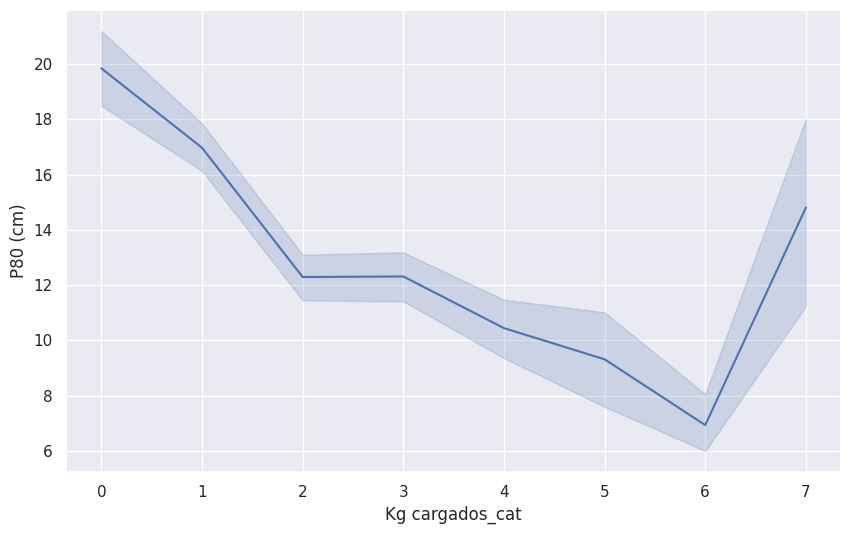

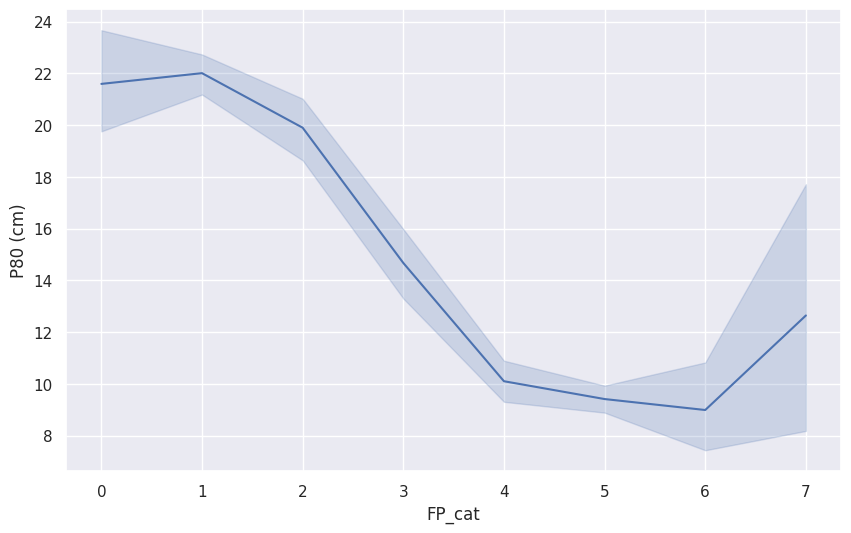

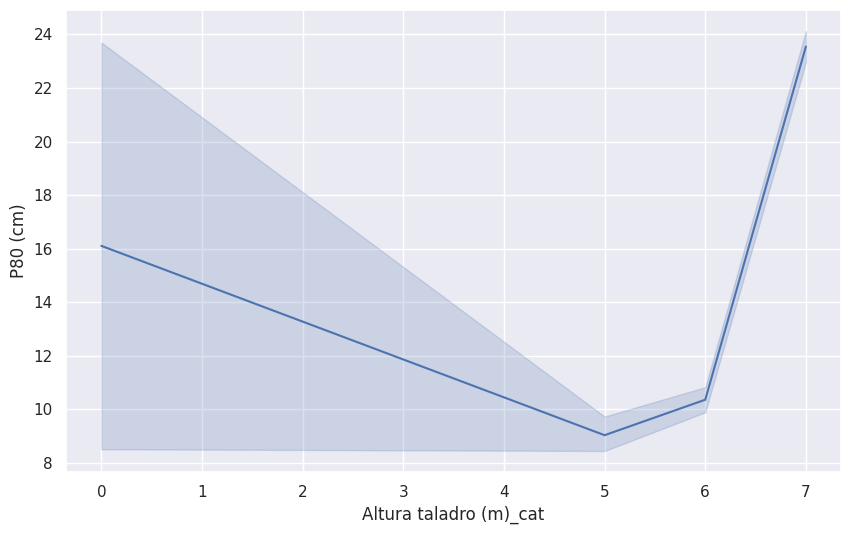

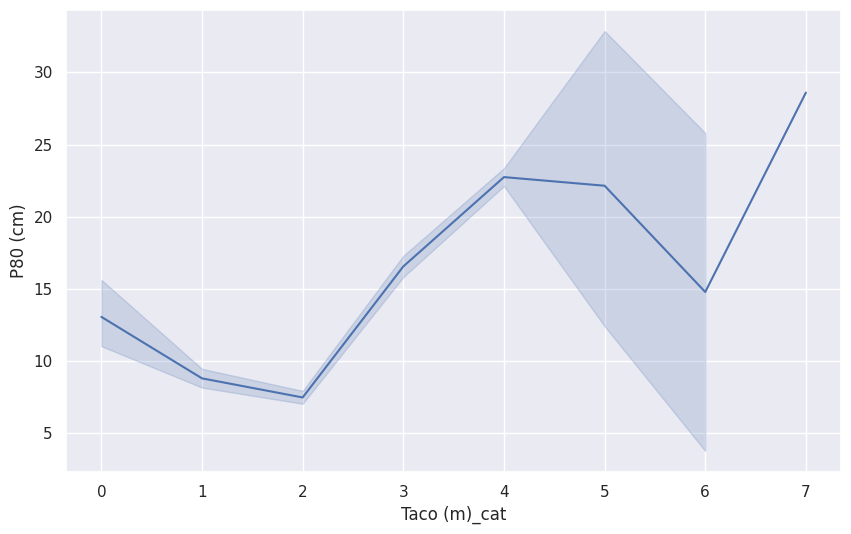

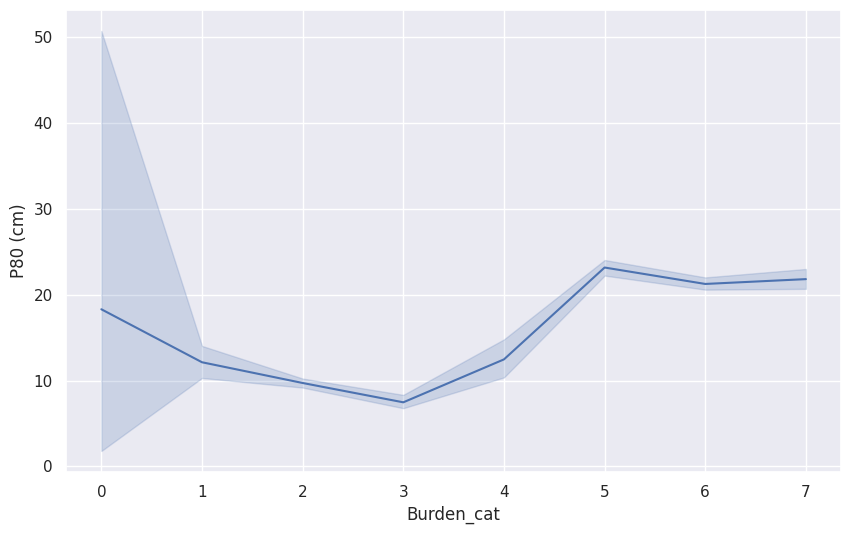

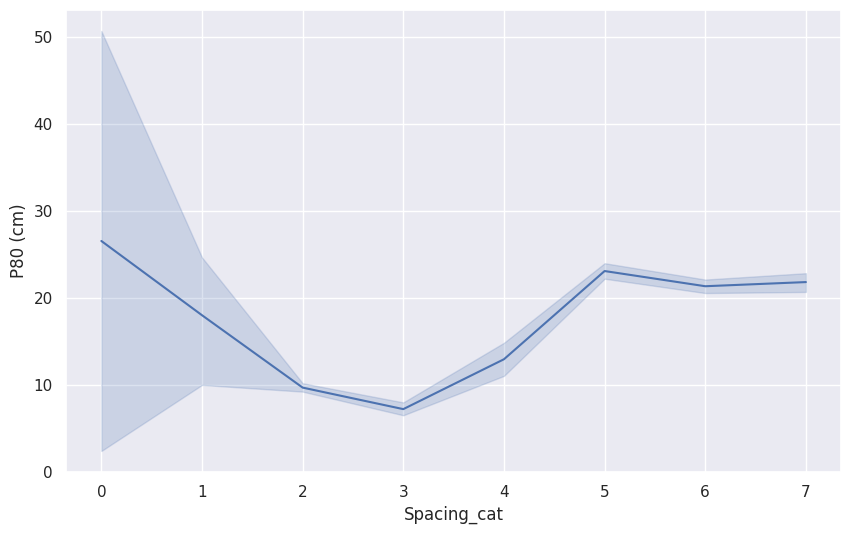

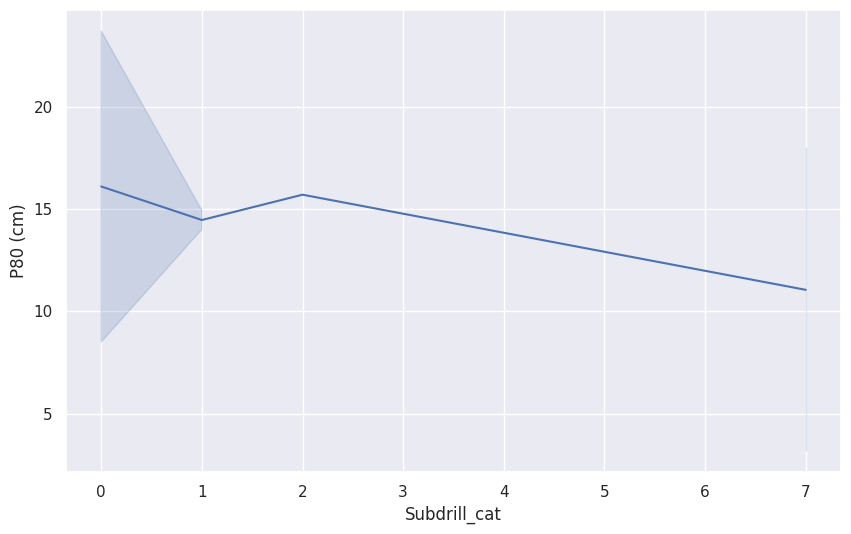

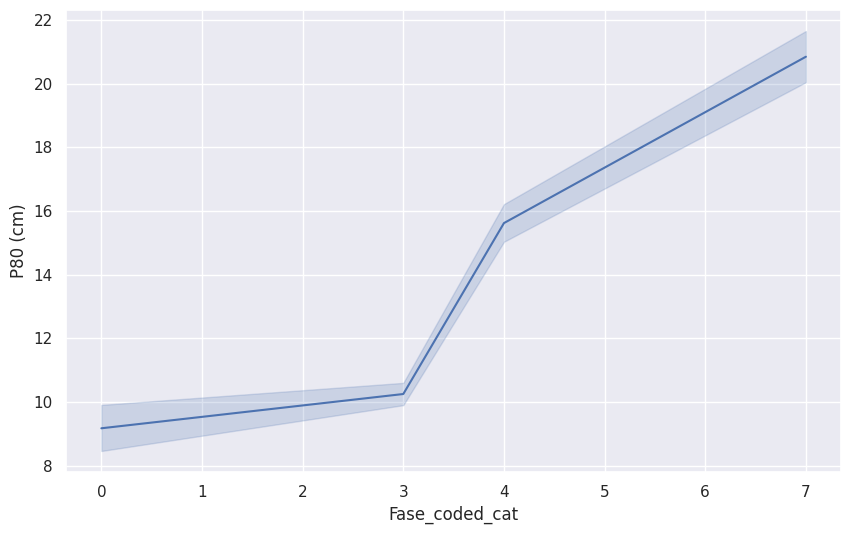

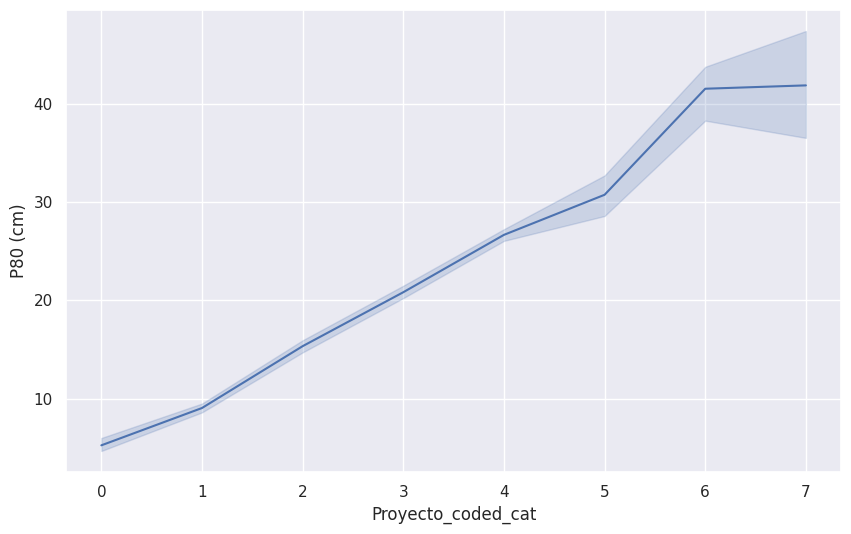

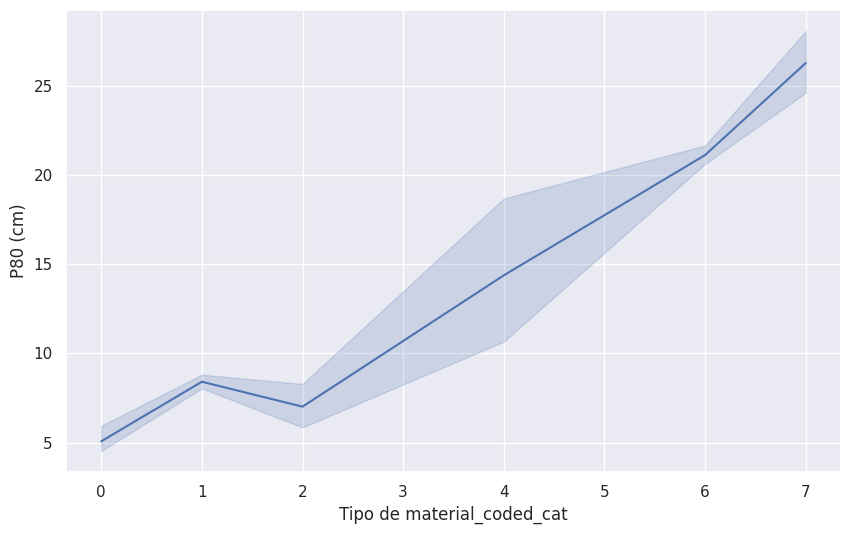

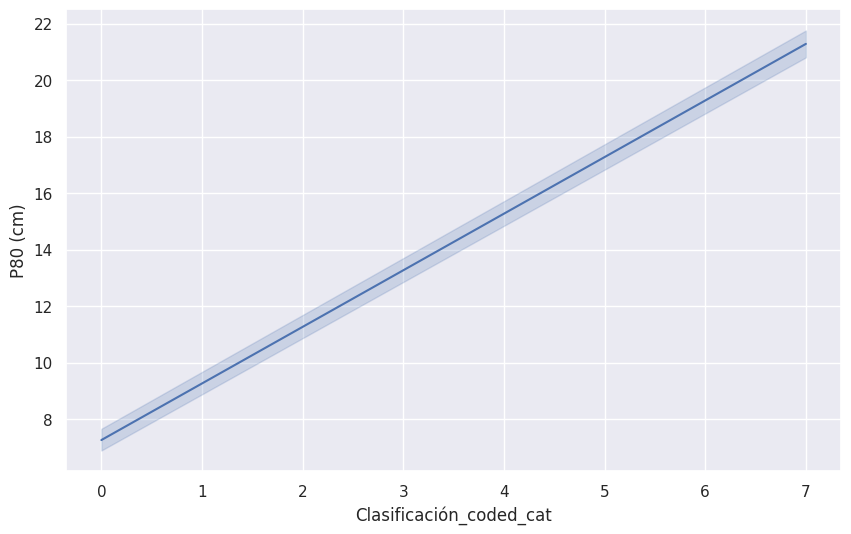

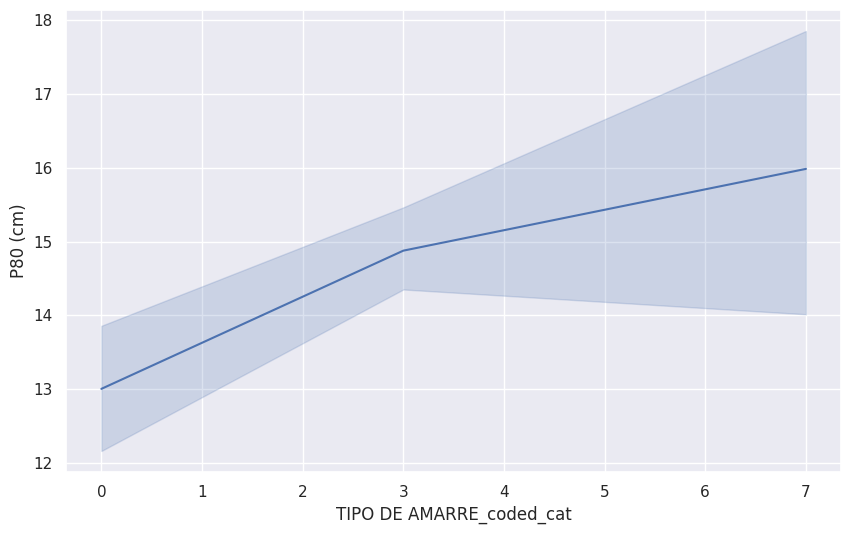

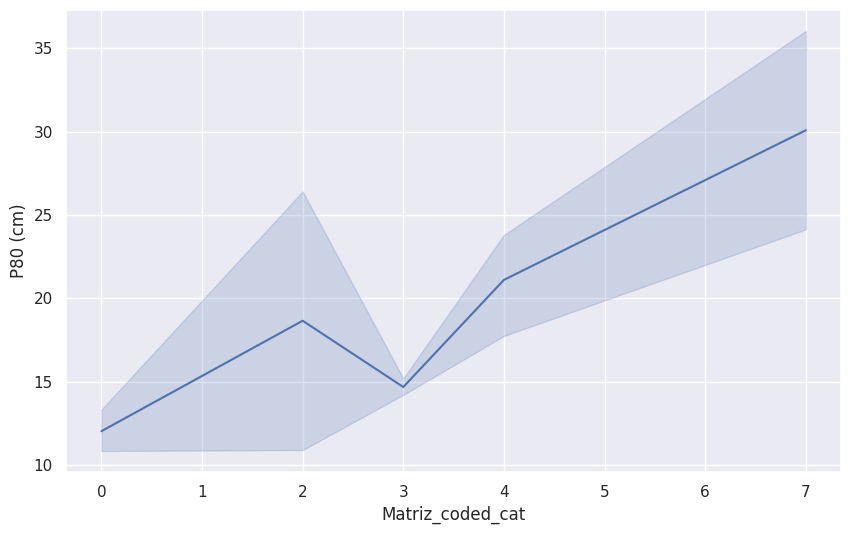

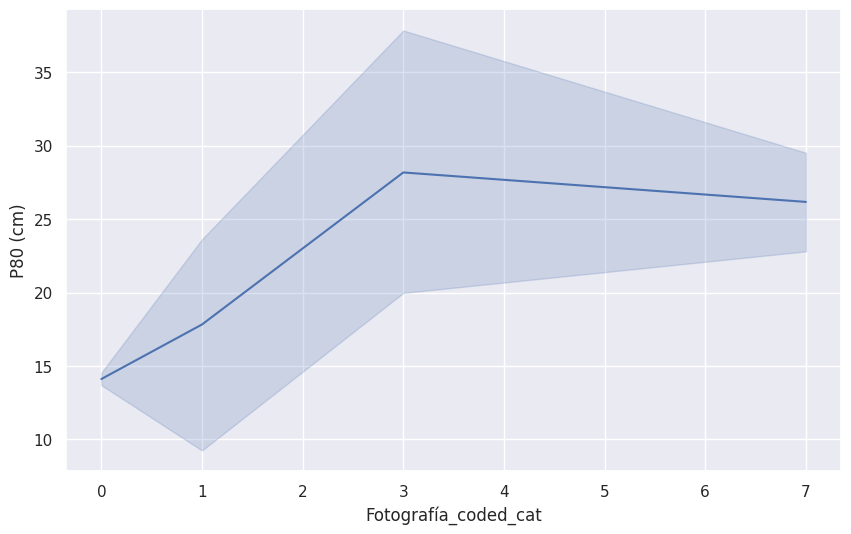

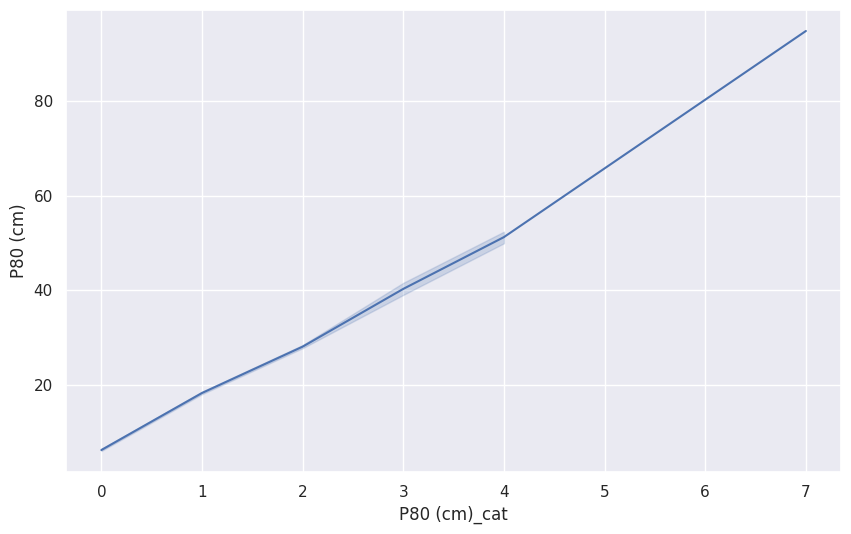

In [ ]:
for j in numFeatures + catFeatures_coded + ['P80 (cm)']:
  print(pddf_total[[f'{j}', f'{j}_cat', 'P80 (cm)']])
  aggregations = {'P80 (cm)':'mean', f'{j}':'min', f'{j}':'max'}
  res = pddf_total.groupby(f'{j}_cat').agg(aggregations).reset_index()
  print(res)
  # Ratio del evento por tramo dela variable numérica
  fig, ax = plt.subplots()
  ax = sns.lineplot(data=pddf_total, x=f'{j}_cat', y='P80 (cm)', palette = 'hls')
  print('--------------')

##Seleccion de muestras

In [ ]:
pddf_total.columns

Index(['Kg cargados', 'FP', 'Altura taladro (m)', 'Taco (m)', 'Burden',
       'Spacing', 'Subdrill', 'Fase', 'Proyecto', 'Tipo de material',
       'Clasificación', 'TIPO DE AMARRE', 'Matriz', 'Fotografía', 'P80 (cm)',
       'rango_percentil', 'Fase_coded', 'Proyecto_coded',
       'Tipo de material_coded', 'Clasificación_coded', 'TIPO DE AMARRE_coded',
       'Matriz_coded', 'Fotografía_coded', 'Kg cargados_cat', 'FP_cat',
       'Altura taladro (m)_cat', 'Taco (m)_cat', 'Burden_cat', 'Spacing_cat',
       'Subdrill_cat', 'Fase_coded_cat', 'Proyecto_coded_cat',
       'Tipo de material_coded_cat', 'Clasificación_coded_cat',
       'TIPO DE AMARRE_coded_cat', 'Matriz_coded_cat', 'Fotografía_coded_cat',
       'P80 (cm)_cat'],
      dtype='object')

In [ ]:
list_features_cat = ['Kg cargados_cat', 'FP_cat',
       'Altura taladro (m)_cat', 'Taco (m)_cat', 'Burden_cat', 'Spacing_cat',
       'Subdrill_cat', 'Fase_coded_cat', 'Proyecto_coded_cat',
       'Tipo de material_coded_cat', 'Clasificación_coded_cat',
       'TIPO DE AMARRE_coded_cat', 'Matriz_coded_cat', 'Fotografía_coded_cat']
list_target_cat = 'P80 (cm)_cat'

In [ ]:
# Determinando matrices de datos

X_matrix = pddf_total[list_features_cat]
y_matrix = pddf_total[list_target_cat]

In [ ]:
# Muestreo de data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_matrix, y_matrix, 
                                                    test_size = 0.3,
                                                    random_state = 123)


In [ ]:
y_train.mean()

0.7273449920508744

In [ ]:
y_test.mean()

0.6611111111111111

##SMOTE

In [ ]:
# Aplicando SMOTE para oversampling

from imblearn.over_sampling import SMOTE

In [ ]:
sm = SMOTE(k_neighbors=4,random_state = 123)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

In [ ]:
X_train_res

Kg cargados_cat    FP_cat  Altura taladro (m)_cat  Taco (m)_cat  \
0            1.000000  0.000000                 7.00000      4.000000   
1            3.000000  5.000000                 7.00000      4.000000   
2            2.000000  3.000000                 5.00000      4.000000   
3            2.000000  1.000000                 7.00000      4.000000   
4            4.000000  5.000000                 6.00000      2.000000   
...               ...       ...                     ...           ...   
2945         0.453813  1.000000                 7.00000      4.000000   
2946         0.134655  0.269310                 5.26931      4.865345   
2947         0.748980  1.748980                 7.00000      4.000000   
2948         0.248352  1.248352                 7.00000      4.000000   
2949         0.000000  1.000000                 7.00000      4.000000   

      Burden_cat  Spacing_cat  Subdrill_cat  Fase_coded_cat  \
0       7.000000     7.000000           1.0        7.000000   
1       2.000000     2.000000           1.0        4.000000   
2       3.000000     3.000000           1.0        0.000000   
3       6.000000     6.000000           1.0        7.000000   
4       2.000000     2.000000           1.0        4.000000   
...          ...          ...           ...             ...   
2945    2.269067     2.269067           1.0        4.000000   
2946    2.403965     5.865345           1.0        0.538620   
2947    5.251020     5.251020           1.0        4.753061   
2948    5.751648     5.751648           1.0        6.254945   
2949    1.513421     1.513421           1.0        4.756711   

      Proyecto_coded_cat  Tipo de material_coded_cat  Clasificación_coded_cat  \
0               3.000000                    6.000000                      7.0   
1               1.000000                    6.000000                      7.0   
2               2.000000                    6.000000                      7.0   
3               4.000000                    6.000000                      7.0   
4               1.000000                    1.000000                      0.0   
...                  ...                         ...                      ...   
2945            4.730933                    6.546187                      7.0   
2946            6.461380                    6.000000                      7.0   
2947            4.004081                    6.000000                      7.0   
2948            6.006593                    6.000000                      7.0   
2949            7.000000                    6.747763                      7.0   

      TIPO DE AMARRE_coded_cat  Matriz_coded_cat  Fotografía_coded_cat  
0                     0.000000          0.000000              0.000000  
1                     0.000000          0.000000              0.000000  
2                     3.000000          3.000000              0.000000  
3                     3.000000          3.000000              0.000000  
4                     0.000000          3.000000              0.000000  
...                        ...               ...                   ...  
2945                  4.815254          5.184746              7.000000  
2946                  3.538620          3.000000              0.000000  
2947                  5.995919          3.000000              1.757143  
2948                  3.993407          3.000000              5.261538  
2949                  3.000000          5.991053              7.000000  

[2950 rows x 14 columns]

<Axes: ylabel='count'>

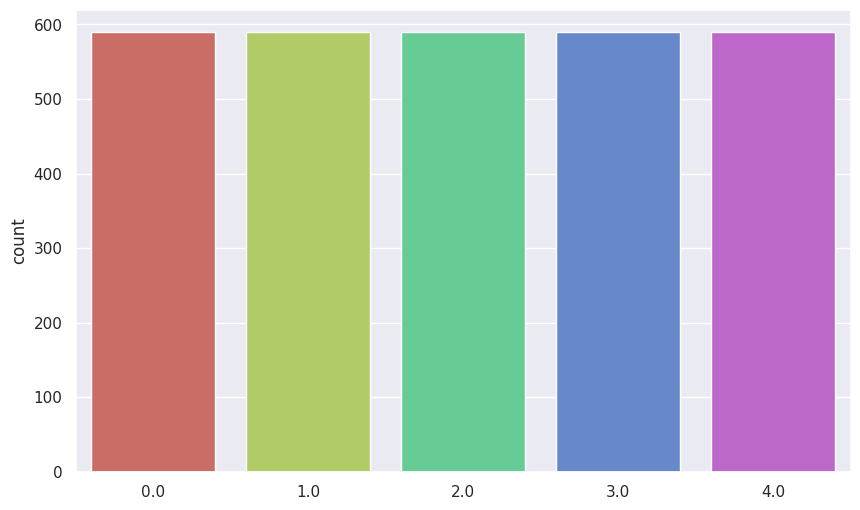

In [ ]:
# Analizando el target 
sns.countplot(x = y_train_res, palette = 'hls')

# Decision Tree

In [ ]:
# Cargar librerías 

from sklearn.tree import DecisionTreeRegressor

In [ ]:
# Create a decision tree regressor object
dt_reg = DecisionTreeRegressor()

# Define the hyperparameters to tune
param_grid = {'max_depth': [2, 3, 4, 5, 6, 7, 10, 12, 15, 18 ,20],
              'min_samples_split': [2, 5, 10, 30, 50],
              'min_samples_leaf': [0.01, 0.02, 0.025, 0.05, 0.1, 0.2],
              'max_features': ['auto', 'sqrt', 'log2']}
    
# Perform a grid search
grid_search = GridSearchCV(estimator=dt_reg, param_grid=param_grid, cv=5, verbose = 5, n_jobs=5, return_train_score = True)
grid_search.fit(X_train_res, y_train_res)

Fitting 5 folds for each of 990 candidates, totalling 4950 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=5,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 10, 12, 15, 18, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [0.01, 0.02, 0.025, 0.05, 0.1,
                                              0.2],
                         'min_samples_split': [2, 5, 10, 30, 50]},
             return_train_score=True, verbose=5)

In [ ]:
# Print the best hyperparameters
print('Best hyperparameters:', grid_search.best_params_)

Best hyperparameters: {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 0.01, 'min_samples_split': 50}


In [ ]:
def plot_search_results(grid):
    """
    Params: 
        grid: A trained GridSearchCV object.
    """
    ## Results from grid search
    results = grid.cv_results_
    means_test = results['mean_test_score']
    stds_test = results['std_test_score']
    means_train = results['mean_train_score']
    stds_train = results['std_train_score']

    ## Getting indexes of values per hyper-parameter
    masks=[]
    masks_names= list(grid.best_params_.keys())
    for p_k, p_v in grid.best_params_.items():
        masks.append(list(results['param_'+p_k].data==p_v))

    params=grid.param_grid

    ## Ploting results
    fig, ax = plt.subplots(1,len(params),sharex='none', sharey='all',figsize=(20,5))
    fig.suptitle('Score per parameter')
    fig.text(0.04, 0.5, 'MEAN SCORE', va='center', rotation='vertical')
    pram_preformace_in_best = {}
    for i, p in enumerate(masks_names):
        m = np.stack(masks[:i] + masks[i+1:])
        pram_preformace_in_best
        best_parms_mask = m.all(axis=0)
        best_index = np.where(best_parms_mask)[0]
        x = np.array(params[p])
        y_1 = np.array(means_test[best_index])
        e_1 = np.array(stds_test[best_index])
        y_2 = np.array(means_train[best_index])
        e_2 = np.array(stds_train[best_index])
        ax[i].errorbar(x, y_1, e_1, linestyle='--', marker='o', label='test')
        ax[i].errorbar(x, y_2, e_2, linestyle='-', marker='^',label='train' )
        ax[i].set_xlabel(p.upper())

    plt.legend()
    plt.show()

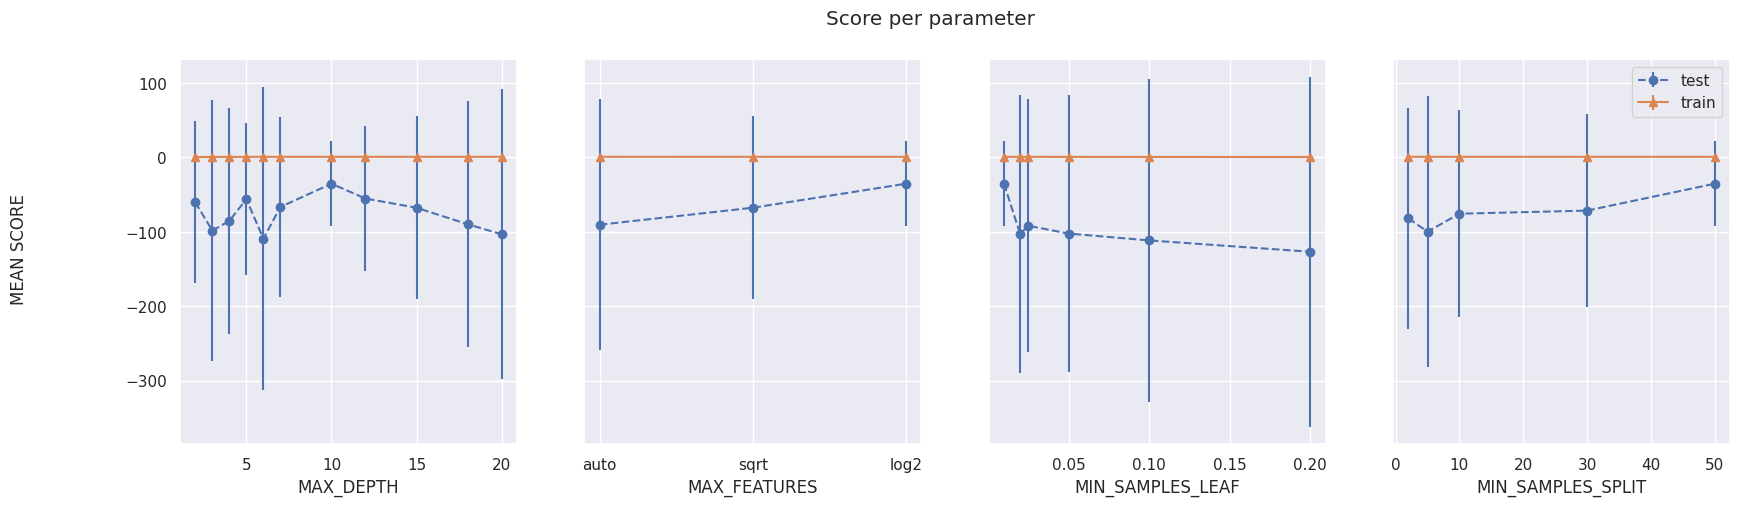

In [ ]:

# Calling Method 
plot_search_results(grid_search)


In [ ]:
# Use the optimal hyperparameters to train the model
dt_reg_opt = DecisionTreeRegressor(max_depth=grid_search.best_params_['max_depth'],
                                    min_samples_split=grid_search.best_params_['min_samples_split'],
                                    min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
                                    max_features=grid_search.best_params_['max_features'])
dt_reg_opt = dt_reg_opt.fit(X_train_res, y_train_res)

In [ ]:
# Graficando resultados

from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data

dot_data = export_graphviz(dt_reg_opt,
                           feature_names = features,
                           filled = True,
                           rounded = True,
                           special_characters = True)

graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png')
print(graph)


In [ ]:
# Make predictions on the test set
y_pred = dt_reg_opt.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error:', mse)

# Calculate the R^2 score
r2 = r2_score(y_test, y_pred)
print('R^2 score:', r2)

Mean squared error: 0.7576694603767763
R^2 score: -0.08530397083016727


In [ ]:
# Usando el modelo para predecir

X_train_res['prediction'] = dt_reg_opt.predict(X_train_res[list_features_cat])
X_test['prediction']  = dt_reg_opt.predict(X_test[list_features_cat])

X_train_res['P80'] = y_train_res
X_test['P80'] = y_test

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
print(f'R2 en train: {r2_score(X_train_res["P80"], X_train_res.prediction)}')
print(f'R2 en test:  {r2_score(X_test["P80"], X_test.prediction)}')

R2 en train: 0.7686673867893036
R2 en test:  -0.08530397083016727


In [ ]:
X_test[['prediction', 'P80']].head()

prediction  P80
916    1.085106  2.0
784    0.024390  0.0
497    0.142857  0.0
435    0.065217  0.0
394    0.468085  1.0

In [ ]:
X_test['error'] = X_test['prediction'] - X_test['P80']
X_test['error_rel'] = X_test['error']/X_test['P80']

X_test[['prediction', 'P80', 'error_rel']]

prediction  P80  error_rel
916     1.085106  2.0  -0.457447
784     0.024390  0.0        inf
497     0.142857  0.0        inf
435     0.065217  0.0        inf
394     0.468085  1.0  -0.531915
...          ...  ...        ...
357     0.024390  0.0        inf
813     0.032432  0.0        inf
1578    1.377778  2.0  -0.311111
1005    0.682927  2.0  -0.658537
1516    2.087023  2.0   0.043511

[540 rows x 3 columns]

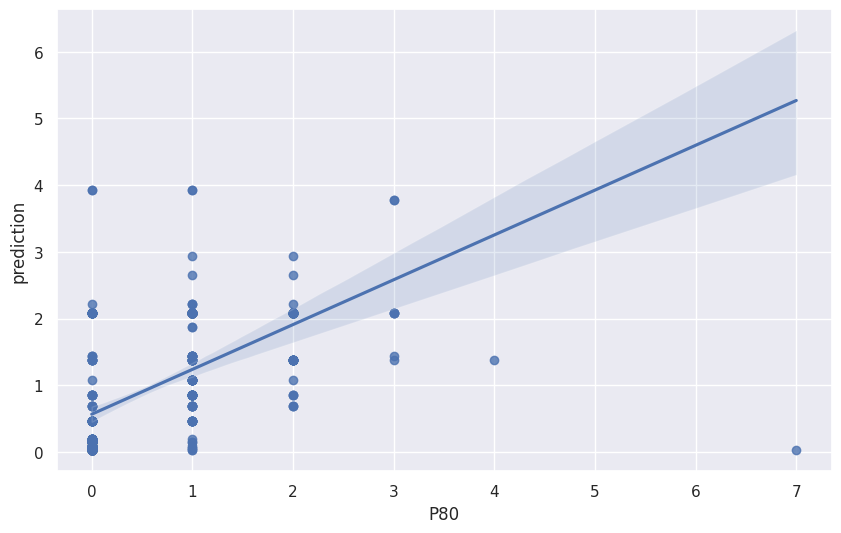

In [ ]:
import seaborn as sns
sns.regplot(x = 'P80', y = 'prediction', data = X_test)

plt.show()

In [ ]:
def rango_error(x):
  if abs(x) > 0.5:
    return '>+-50%'
  elif abs(x) >= 0.25:
    return '<+-50%'
  elif abs(x) < 0.25:
    return '<+-25%'


In [ ]:
X_test['rango_error'] = X_test.error_rel.apply(lambda x: rango_error(x))

In [ ]:
number_0_25 = X_test[X_test['rango_error']=='<+-25%']
number_25_50 = X_test[X_test['rango_error']=='<+-50%']
number_50_100 = X_test[X_test['rango_error']=='>+-50%']

In [ ]:
print('%01',round(len(number_0_25)*100/len(X_test),2),'%')
print('%02',round(len(number_25_50)*100/len(X_test),2),'%')

%01 15.93 %
%02 8.89 %


## **RANDOM FOREST REGRESION**

In [ ]:
pddf_train = copy.deepcopy(train00)
pddf_test = copy.deepcopy(test00)
pddf_total = pd.concat([pddf_train,pddf_test])

In [ ]:
pddf_total.columns

Index(['Kg cargados', 'FP', 'Altura taladro (m)', 'Taco (m)', 'Burden',
       'Spacing', 'Subdrill', 'Fase', 'Proyecto', 'Tipo de material',
       'Clasificación', 'TIPO DE AMARRE', 'Matriz', 'Fotografía', 'P80 (cm)',
       'rango_percentil', 'Fase_coded', 'Proyecto_coded',
       'Tipo de material_coded', 'Clasificación_coded', 'TIPO DE AMARRE_coded',
       'Matriz_coded', 'Fotografía_coded'],
      dtype='object')

##Definicion de variables

In [ ]:
#Variables para el modelo

numFeatures = ['Kg cargados', 'FP', 'Altura taladro (m)', 'Taco (m)', 'Burden', 'Spacing', 'Subdrill']
catFeatures = ['Fase', 'Proyecto', 'Tipo de material', 'Clasificación','TIPO DE AMARRE', 'Matriz', 'Fotografía']
catFeatures_coded = [x + '_coded' for x in catFeatures]
target = 'P80 (cm)'

X = pddf_total[numFeatures + catFeatures_coded]
y = pddf_total[target]

In [ ]:
pddf_total

Kg cargados      FP  Altura taladro (m)  Taco (m)  Burden  Spacing  \
749   293950.4338  0.4558                16.5       6.0     6.0     7.00   
1180  370401.2700  0.5100                17.0       7.0     5.5     6.50   
162   185393.6400  0.4300                16.5       6.0     6.0     7.00   
1408  380422.1566  0.2734                16.5       6.5     8.7    10.00   
958    74447.3024  0.3167                17.0       7.0     8.0     9.20   
...           ...     ...                 ...       ...     ...      ...   
1532  178654.6125  0.3185                16.5       6.0     8.5     9.70   
1338  135541.6956  0.2484                17.5       6.5     9.7    11.20   
1677  315308.1649  0.5527                17.0       7.0     9.0    10.35   
1590  241274.1898  0.5593                16.5       6.0     6.0     7.00   
250   324843.7500  0.6300                16.5       6.0     6.0     7.00   

      Subdrill Fase      Proyecto Tipo de material  ...  Fotografía P80 (cm)  \
749        1.5    6  6-NP-3968-37              M4B  ...  produccion     14.6   
1180       1.5    8  8-NP-4193-30                A  ...  produccion     23.0   
162        1.5    6  6-NP-3908-05               M1  ...  produccion      3.9   
1408       1.5    9  9-NP-4328-19                C  ...  produccion     11.8   
958        2.0    8  8-NP-4148-39                A  ...  produccion     23.9   
...        ...  ...           ...              ...  ...         ...      ...   
1532       1.5    8  8-NP-4073-13                C  ...  produccion     21.7   
1338       2.5    9  9-NP-4388-11                C  ...  produccion     25.4   
1677       2.0    6  6-NP-3908-29                A  ...  produccion      5.9   
1590       1.5    6  6-NP-3968-33                A  ...  produccion      8.5   
250        1.5    6  6-NP-3908-21               M1  ...  produccion      3.5   

     rango_percentil Fase_coded  Proyecto_coded Tipo de material_coded  \
749    percentil_p75   9.057406       14.382177               8.890464   
1180   percentil_p99  15.442983       13.673539              20.839133   
162    percentil_p25   9.057406       12.990016               4.712225   
1408   percentil_p50  20.656545       14.122693              21.318682   
958    percentil_p99  15.442983       15.592186              20.839133   
...              ...        ...             ...                    ...   
1532   percentil_p99  15.442983       14.837556              21.318682   
1338   percentil_p99  20.656545       15.938386              21.318682   
1677   percentil_p25   9.057406       12.965061              20.839133   
1590   percentil_p50   9.057406       12.802432              20.839133   
250    percentil_p25   9.057406       14.349597               4.712225   

      Clasificación_coded  TIPO DE AMARRE_coded  Matriz_coded  \
749              7.232215             13.044694     14.636445   
1180            21.200494             14.663831     11.840829   
162              7.232215             14.663831     14.636445   
1408            21.200494             14.663831     14.636445   
958             21.200494             14.663831     14.636445   
...                   ...                   ...           ...   
1532            21.200494             14.663831     14.636445   
1338            21.200494             14.663831     14.636445   
1677            21.200494             13.044694     14.636445   
1590            21.200494             14.663831     14.636445   
250              7.232215             13.044694     14.636445   

      Fotografía_coded  
749          14.001225  
1180         14.001225  
162          14.001225  
1408         14.001225  
958          14.001225  
...                ...  
1532         14.001225  
1338         14.001225  
1677         14.001225  
1590         14.001225  
250          14.001225  

[1798 rows x 23 columns]

##Seleccion de parametros optimos de discretizacion

In [ ]:
# Discretizar variable 

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.pipeline import Pipeline

# Create a pipeline with the KBinsDiscretizer and the DecisionTreeRegressor or RandomForestRegressor
pipe_rf = Pipeline([('discretizer', KBinsDiscretizer()), ('regressor', RandomForestRegressor())])

# Define the hyperparameters to search over
params = {'discretizer__n_bins': [8, 20, 25 , 30, 35, 40, 50, 75, 90, 200, 400, 5000, 6000], 
          'discretizer__encode': ['ordinal'], 
          'discretizer__strategy': ['quantile','uniform']}

# Use GridSearchCV to find the best combination of hyperparameters
grid_rf = GridSearchCV(pipe_rf, params, cv=5)
grid_rf.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:279: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 2 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:279: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 3 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:279: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 4 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:279: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 5 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:279

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('discretizer', KBinsDiscretizer()),
                                       ('regressor', RandomForestRegressor())]),
             param_grid={'discretizer__encode': ['ordinal'],
                         'discretizer__n_bins': [8, 20, 25, 30, 35, 40, 50, 75,
                                                 90, 200, 400, 5000, 6000],
                         'discretizer__strategy': ['quantile', 'uniform']})

In [ ]:
# Print the best combination of hyperparameters for the RandomForestRegressor
print("Best hyperparameters for RandomForestRegressor:", grid_rf.best_params_)

print("Best score for Random Forest:", grid_rf.best_score_)
print("Best parameters for Random Forest:", grid_rf.best_params_)

Best hyperparameters for RandomForestRegressor: {'discretizer__encode': 'ordinal', 'discretizer__n_bins': 35, 'discretizer__strategy': 'quantile'}
Best score for Random Forest: 0.7266234047827251
Best parameters for Random Forest: {'discretizer__encode': 'ordinal', 'discretizer__n_bins': 35, 'discretizer__strategy': 'quantile'}


###Discretizer

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:279: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 2 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:279: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 3 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:279: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 4 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:279: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 5 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:279

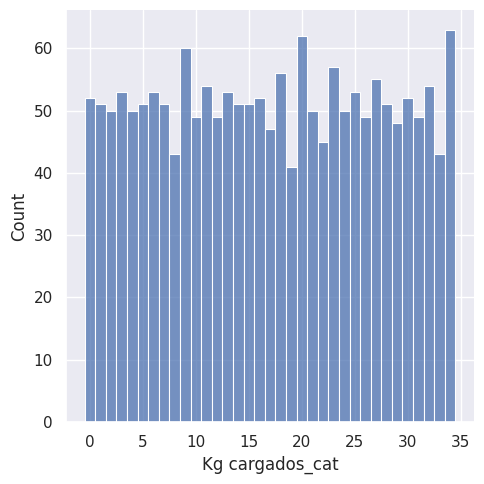

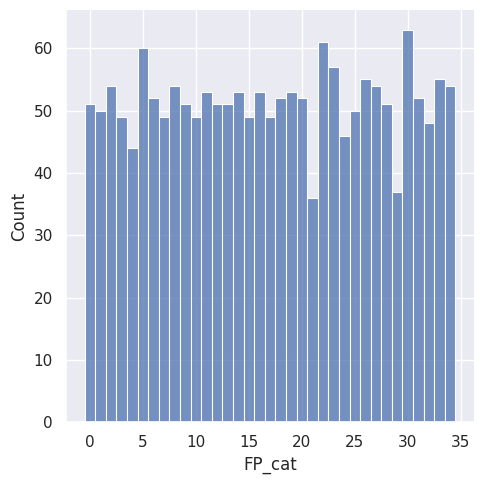

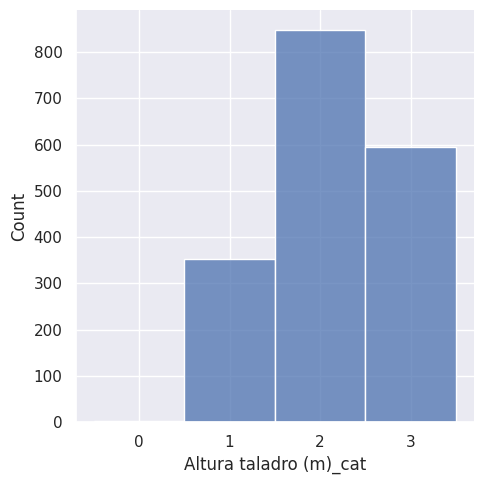

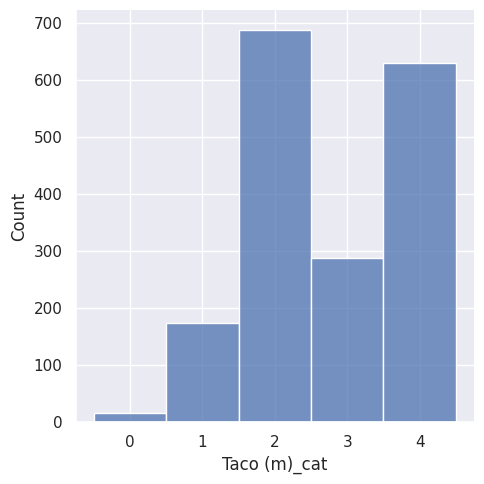

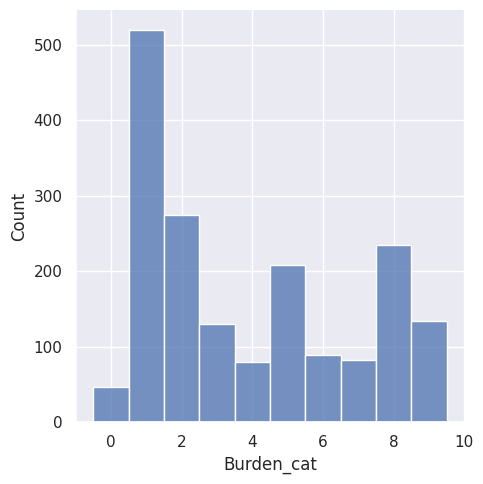

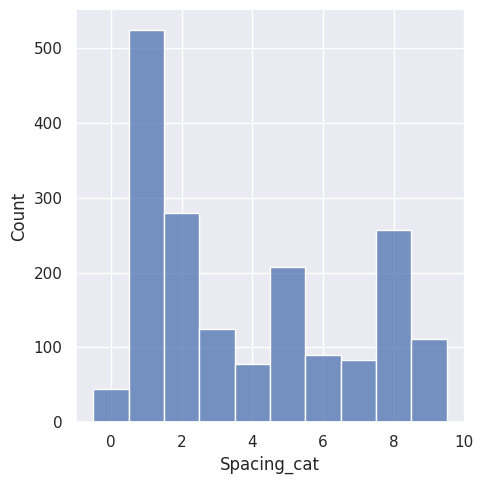

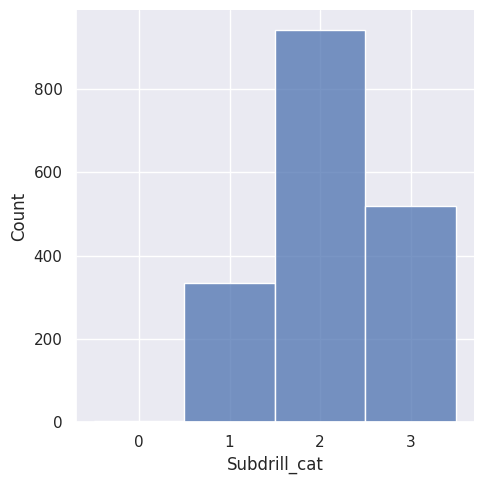

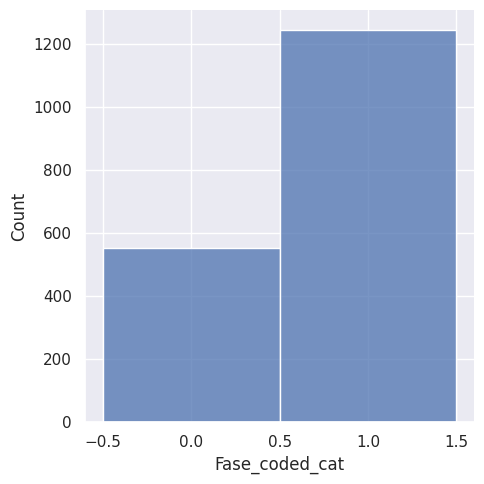

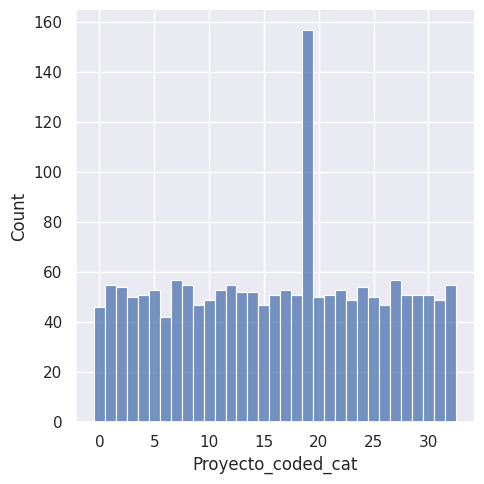

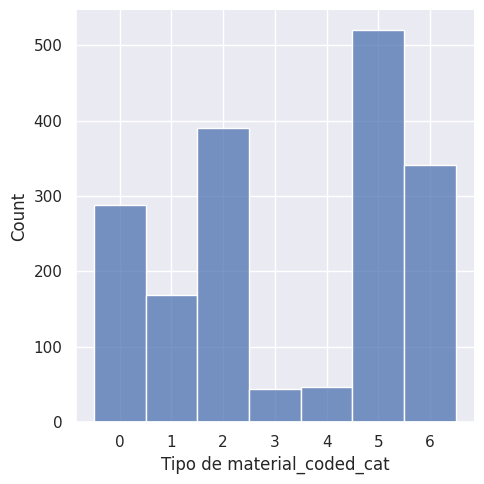

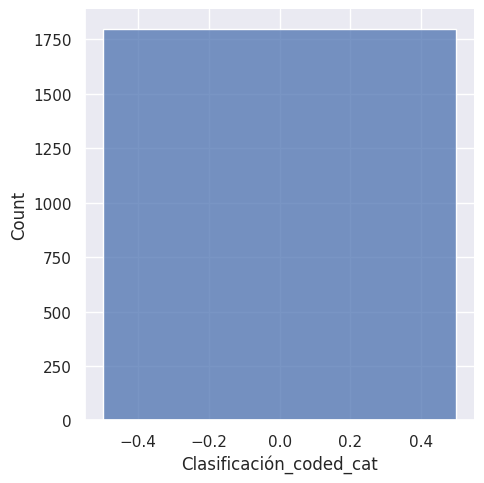

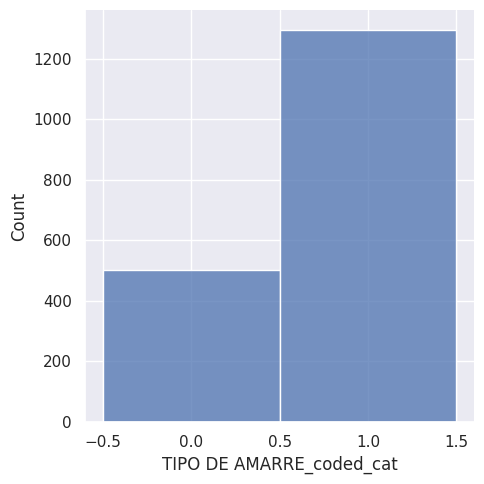

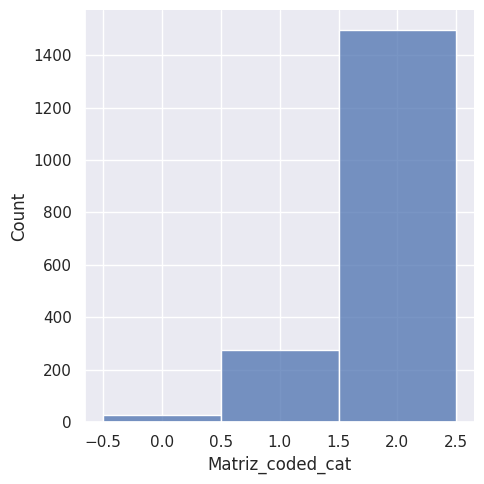

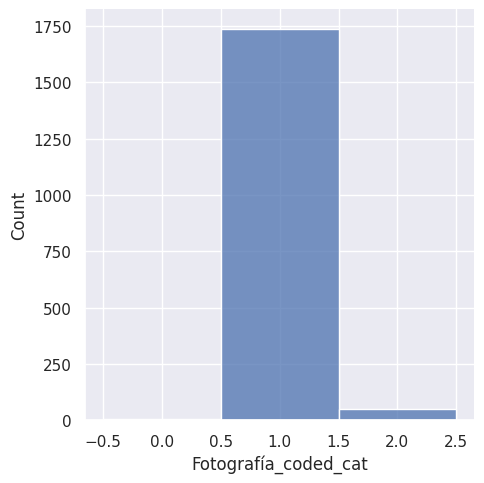

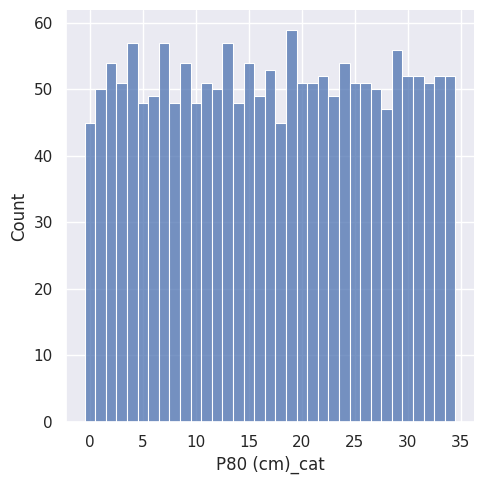

In [ ]:
#n_bins_optimal = [8,35,40,75,90,200,400,500,6000]
discretizer = KBinsDiscretizer(n_bins=grid_rf.best_params_['discretizer__n_bins']
                               , encode=grid_rf.best_params_['discretizer__encode']
                               , strategy=grid_rf.best_params_['discretizer__strategy'])

numFeatures_cat = [x + '_cat' for x in numFeatures+catFeatures_coded+['P80 (cm)']]

pddf_total[numFeatures_cat] = discretizer.fit_transform(pddf_total[numFeatures+catFeatures_coded+['P80 (cm)']])

for i in numFeatures_cat:
  sns.displot(pddf_total[i], palette = 'hls', discrete=True)

      Kg cargados  Kg cargados_cat  P80 (cm)
749   293950.4338             19.0      14.6
1180  370401.2700             24.0      23.0
162   185393.6400             10.0       3.9
1408  380422.1566             25.0      11.8
958    74447.3024              1.0      23.9
...           ...              ...       ...
1532  178654.6125              9.0      21.7
1338  135541.6956              5.0      25.4
1677  315308.1649             20.0       5.9
1590  241274.1898             15.0       8.5
250   324843.7500             21.0       3.5

[1798 rows x 3 columns]
    Kg cargados_cat   P80 (cm)  Kg cargados
0               0.0  20.432692   64312.6553
1               1.0  17.943137   85592.0506
2               2.0  18.326000   98894.8400
3               3.0  20.252830  113679.0900
4               4.0  22.955800  126364.5000
5               5.0  18.966667  136966.1565
6               6.0  17.916981  152798.4311
7               7.0  16.346667  166227.7864
8               8.0  17.427907  176049.

<ipython-input-168-9cc8246ddb25>:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(data=pddf_total, x=f'{j}_cat', y='P80 (cm)', palette = 'hls')


--------------
          FP  FP_cat  P80 (cm)
749   0.4558    15.0      14.6
1180  0.5100    20.0      23.0
162   0.4300    14.0       3.9
1408  0.2734     5.0      11.8
958   0.3167     9.0      23.9
...      ...     ...       ...
1532  0.3185     9.0      21.7
1338  0.2484     3.0      25.4
1677  0.5527    23.0       5.9
1590  0.5593    24.0       8.5
250   0.6300    32.0       3.5

[1798 rows x 3 columns]
    FP_cat   P80 (cm)      FP
0      0.0  21.964706  0.2200
1      1.0  23.658000  0.2319
2      2.0  22.559259  0.2446
3      3.0  22.338840  0.2592
4      4.0  22.605906  0.2699
5      5.0  20.831375  0.2799
6      6.0  19.686538  0.2886
7      7.0  21.902041  0.2998
8      8.0  24.007222  0.3145
9      9.0  21.345098  0.3263
10    10.0  19.381633  0.3428
11    11.0  19.392075  0.3741
12    12.0  15.854279  0.4005
13    13.0  17.193922  0.4200
14    14.0  18.997103  0.4377
15    15.0  13.515969  0.4558
16    16.0   7.662264  0.4704
17    17.0  11.665306  0.4879
18    18.0  11.394

<ipython-input-168-9cc8246ddb25>:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(data=pddf_total, x=f'{j}_cat', y='P80 (cm)', palette = 'hls')


--------------
      Altura taladro (m)  Altura taladro (m)_cat  P80 (cm)
749                 16.5                     2.0      14.6
1180                17.0                     3.0      23.0
162                 16.5                     2.0       3.9
1408                16.5                     2.0      11.8
958                 17.0                     3.0      23.9
...                  ...                     ...       ...
1532                16.5                     2.0      21.7
1338                17.5                     3.0      25.4
1677                17.0                     3.0       5.9
1590                16.5                     2.0       8.5
250                 16.5                     2.0       3.5

[1798 rows x 3 columns]
   Altura taladro (m)_cat   P80 (cm)  Altura taladro (m)
0                     0.0  16.100000                13.5
1                     1.0   9.025494                16.3
2                     2.0  10.351474                16.5
3                     3.

<ipython-input-168-9cc8246ddb25>:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(data=pddf_total, x=f'{j}_cat', y='P80 (cm)', palette = 'hls')


--------------
      Taco (m)  Taco (m)_cat  P80 (cm)
749        6.0           2.0      14.6
1180       7.0           4.0      23.0
162        6.0           2.0       3.9
1408       6.5           3.0      11.8
958        7.0           4.0      23.9
...        ...           ...       ...
1532       6.0           2.0      21.7
1338       6.5           3.0      25.4
1677       7.0           4.0       5.9
1590       6.0           2.0       8.5
250        6.0           2.0       3.5

[1798 rows x 3 columns]
   Taco (m)_cat   P80 (cm)  Taco (m)
0           0.0  13.050000      5.00
1           1.0   8.786280      5.85
2           2.0   7.461435      6.05
3           3.0  16.526784      6.85
4           4.0  22.751086      8.50


<ipython-input-168-9cc8246ddb25>:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(data=pddf_total, x=f'{j}_cat', y='P80 (cm)', palette = 'hls')


--------------
      Burden  Burden_cat  P80 (cm)
749      6.0         2.0      14.6
1180     5.5         1.0      23.0
162      6.0         2.0       3.9
1408     8.7         7.0      11.8
958      8.0         5.0      23.9
...      ...         ...       ...
1532     8.5         6.0      21.7
1338     9.7         9.0      25.4
1677     9.0         8.0       5.9
1590     6.0         2.0       8.5
250      6.0         2.0       3.5

[1798 rows x 3 columns]
   Burden_cat   P80 (cm)  Burden
0         0.0  12.589362     5.4
1         1.0   9.691813     5.5
2         2.0   6.998646     6.0
3         3.0   8.451538     6.5
4         4.0  12.464069     7.0
5         5.0  23.134943     8.4
6         6.0  18.001124     8.5
7         7.0  14.939458     8.7
8         8.0  24.531154     9.2
9         9.0  22.162687    10.0


<ipython-input-168-9cc8246ddb25>:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(data=pddf_total, x=f'{j}_cat', y='P80 (cm)', palette = 'hls')


--------------
      Spacing  Spacing_cat  P80 (cm)
749      7.00          2.0      14.6
1180     6.50          1.0      23.0
162      7.00          2.0       3.9
1408    10.00          7.0      11.8
958      9.20          5.0      23.9
...       ...          ...       ...
1532     9.70          6.0      21.7
1338    11.20          9.0      25.4
1677    10.35          8.0       5.9
1590     7.00          2.0       8.5
250      7.00          2.0       3.5

[1798 rows x 3 columns]
   Spacing_cat   P80 (cm)  Spacing
0          0.0  13.347727     6.00
1          1.0   9.573415     6.50
2          2.0   7.270103     7.40
3          3.0   8.274399     8.00
4          4.0  12.156410     9.00
5          5.0  23.062648     9.50
6          6.0  18.132584     9.70
7          7.0  15.037777    10.25
8          8.0  23.805798    10.80
9          9.0  23.576577    11.50


<ipython-input-168-9cc8246ddb25>:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(data=pddf_total, x=f'{j}_cat', y='P80 (cm)', palette = 'hls')


--------------
      Subdrill  Subdrill_cat  P80 (cm)
749        1.5           2.0      14.6
1180       1.5           2.0      23.0
162        1.5           2.0       3.9
1408       1.5           2.0      11.8
958        2.0           3.0      23.9
...        ...           ...       ...
1532       1.5           2.0      21.7
1338       2.5           3.0      25.4
1677       2.0           3.0       5.9
1590       1.5           2.0       8.5
250        1.5           2.0       3.5

[1798 rows x 3 columns]
   Subdrill_cat   P80 (cm)  Subdrill
0           0.0  16.100000      -1.5
1           1.0   9.463392       1.4
2           2.0  11.042091       1.5
3           3.0  23.842288      16.5


<ipython-input-168-9cc8246ddb25>:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(data=pddf_total, x=f'{j}_cat', y='P80 (cm)', palette = 'hls')


--------------
      Fase_coded  Fase_coded_cat  P80 (cm)
749     9.057406             0.0      14.6
1180   15.442983             1.0      23.0
162     9.057406             0.0       3.9
1408   20.656545             1.0      11.8
958    15.442983             1.0      23.9
...          ...             ...       ...
1532   15.442983             1.0      21.7
1338   20.656545             1.0      25.4
1677    9.057406             0.0       5.9
1590    9.057406             0.0       8.5
250     9.057406             0.0       3.5

[1798 rows x 3 columns]
   Fase_coded_cat   P80 (cm)  Fase_coded
0             0.0   9.177091   13.861743
1             1.0  16.796498   20.656545
--------------
      Proyecto_coded  Proyecto_coded_cat  P80 (cm)
749        14.382177                19.0      14.6
1180       13.673539                13.0      23.0
162        12.990016                 5.0       3.9
1408       14.122693                17.0      11.8
958        15.592186                27.0      23.9


<ipython-input-168-9cc8246ddb25>:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(data=pddf_total, x=f'{j}_cat', y='P80 (cm)', palette = 'hls')
<ipython-input-168-9cc8246ddb25>:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(data=pddf_total, x=f'{j}_cat', y='P80 (cm)', palette = 'hls')


--------------
      Tipo de material_coded  Tipo de material_coded_cat  P80 (cm)
749                 8.890464                         2.0      14.6
1180               20.839133                         5.0      23.0
162                 4.712225                         0.0       3.9
1408               21.318682                         6.0      11.8
958                20.839133                         5.0      23.9
...                      ...                         ...       ...
1532               21.318682                         6.0      21.7
1338               21.318682                         6.0      25.4
1677               20.839133                         5.0       5.9
1590               20.839133                         5.0       8.5
250                 4.712225                         0.0       3.5

[1798 rows x 3 columns]
   Tipo de material_coded_cat   P80 (cm)  Tipo de material_coded
0                         0.0   5.075183                4.712225
1                         

<ipython-input-168-9cc8246ddb25>:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(data=pddf_total, x=f'{j}_cat', y='P80 (cm)', palette = 'hls')


--------------
      Clasificación_coded  Clasificación_coded_cat  P80 (cm)
749              7.232215                      0.0      14.6
1180            21.200494                      0.0      23.0
162              7.232215                      0.0       3.9
1408            21.200494                      0.0      11.8
958             21.200494                      0.0      23.9
...                   ...                      ...       ...
1532            21.200494                      0.0      21.7
1338            21.200494                      0.0      25.4
1677            21.200494                      0.0       5.9
1590            21.200494                      0.0       8.5
250              7.232215                      0.0       3.5

[1798 rows x 3 columns]
   Clasificación_coded_cat   P80 (cm)  Clasificación_coded
0                      0.0  14.457281            21.200494
--------------
      TIPO DE AMARRE_coded  TIPO DE AMARRE_coded_cat  P80 (cm)
749              13.044694      

<ipython-input-168-9cc8246ddb25>:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(data=pddf_total, x=f'{j}_cat', y='P80 (cm)', palette = 'hls')
<ipython-input-168-9cc8246ddb25>:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(data=pddf_total, x=f'{j}_cat', y='P80 (cm)', palette = 'hls')


--------------
      Matriz_coded  Matriz_coded_cat  P80 (cm)
749      14.636445               2.0      14.6
1180     11.840829               1.0      23.0
162      14.636445               2.0       3.9
1408     14.636445               2.0      11.8
958      14.636445               2.0      23.9
...            ...               ...       ...
1532     14.636445               2.0      21.7
1338     14.636445               2.0      25.4
1677     14.636445               2.0       5.9
1590     14.636445               2.0       8.5
250      14.636445               2.0       3.5

[1798 rows x 3 columns]
   Matriz_coded_cat   P80 (cm)  Matriz_coded
0               0.0   8.403846     11.732299
1               1.0  12.687920     14.349597
2               2.0  14.885982     17.836344


<ipython-input-168-9cc8246ddb25>:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(data=pddf_total, x=f'{j}_cat', y='P80 (cm)', palette = 'hls')


--------------
      Fotografía_coded  Fotografía_coded_cat  P80 (cm)
749          14.001225                   1.0      14.6
1180         14.001225                   1.0      23.0
162          14.001225                   1.0       3.9
1408         14.001225                   1.0      11.8
958          14.001225                   1.0      23.9
...                ...                   ...       ...
1532         14.001225                   1.0      21.7
1338         14.001225                   1.0      25.4
1677         14.001225                   1.0       5.9
1590         14.001225                   1.0       8.5
250          14.001225                   1.0       3.5

[1798 rows x 3 columns]
   Fotografía_coded_cat   P80 (cm)  Fotografía_coded
0                   0.0  15.966667         13.243216
1                   1.0  14.106320         14.001225
2                   2.0  25.801887         22.493096


<ipython-input-168-9cc8246ddb25>:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(data=pddf_total, x=f'{j}_cat', y='P80 (cm)', palette = 'hls')


--------------
      P80 (cm)  P80 (cm)_cat  P80 (cm)
749       14.6          19.0      14.6
1180      23.0          27.0      23.0
162        3.9           4.0       3.9
1408      11.8          16.0      11.8
958       23.9          28.0      23.9
...        ...           ...       ...
1532      21.7          26.0      21.7
1338      25.4          30.0      25.4
1677       5.9           8.0       5.9
1590       8.5          12.0       8.5
250        3.5           3.0       3.5

[1798 rows x 3 columns]
    P80 (cm)_cat   P80 (cm)
0            0.0   2.100000
1            1.0   2.600000
2            2.0   3.180000
3            3.0   3.500000
4            4.0   3.900000
5            5.0   4.400000
6            6.0   4.900000
7            7.0   5.609140
8            8.0   6.100000
9            9.0   6.700000
10          10.0   7.400000
11          11.0   8.100000
12          12.0   8.800000
13          13.0   9.882476
14          14.0  10.600000
15          15.0  11.500000
16          16.0

<ipython-input-168-9cc8246ddb25>:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(data=pddf_total, x=f'{j}_cat', y='P80 (cm)', palette = 'hls')


--------------


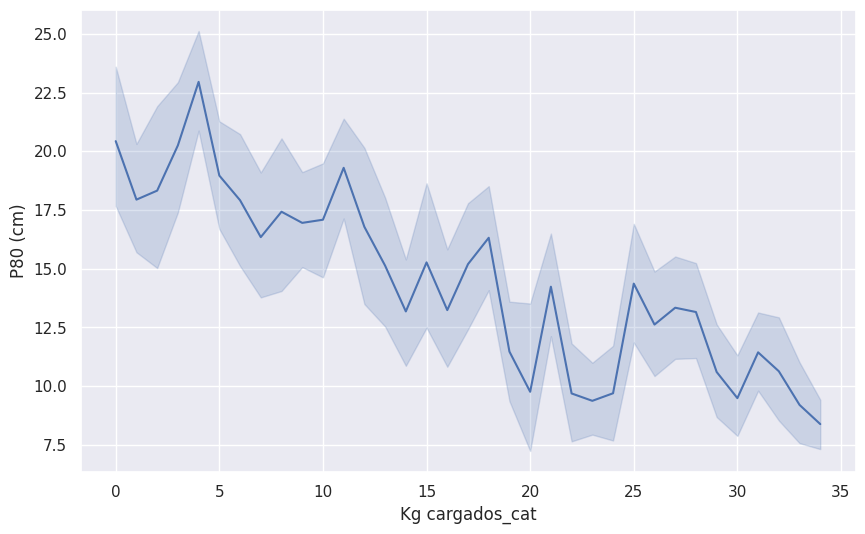

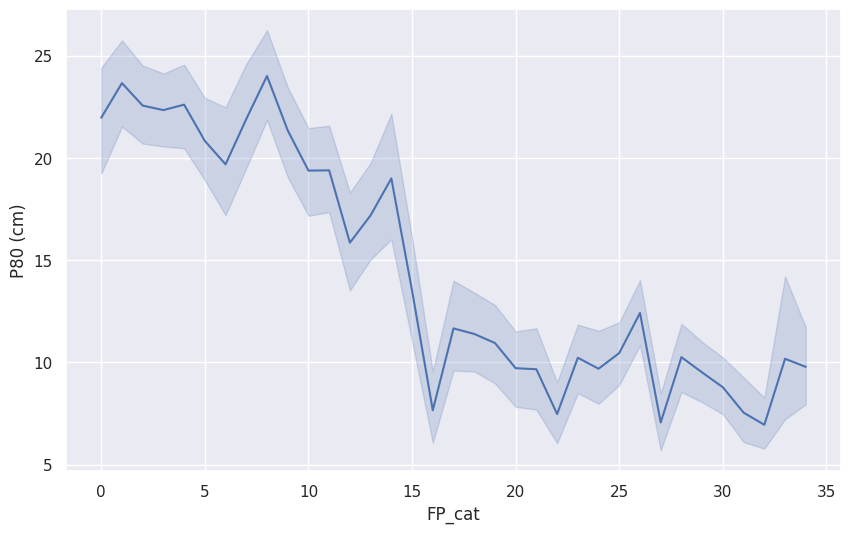

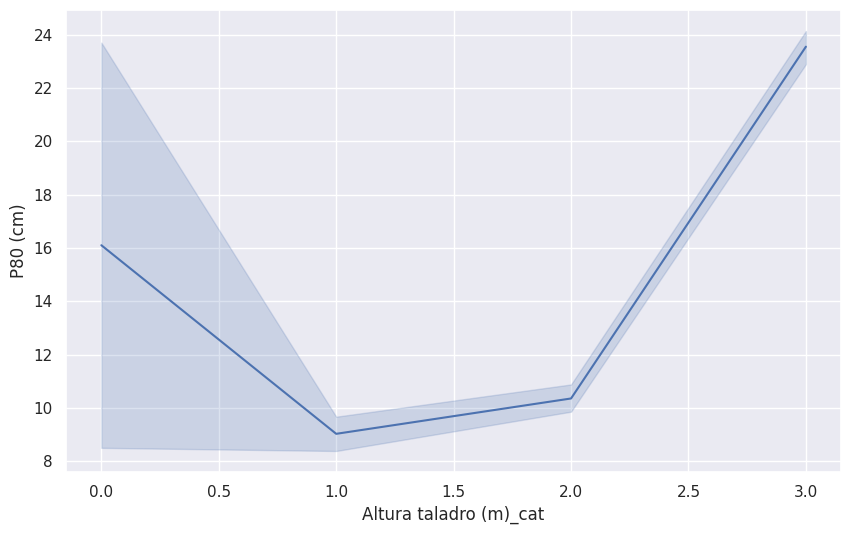

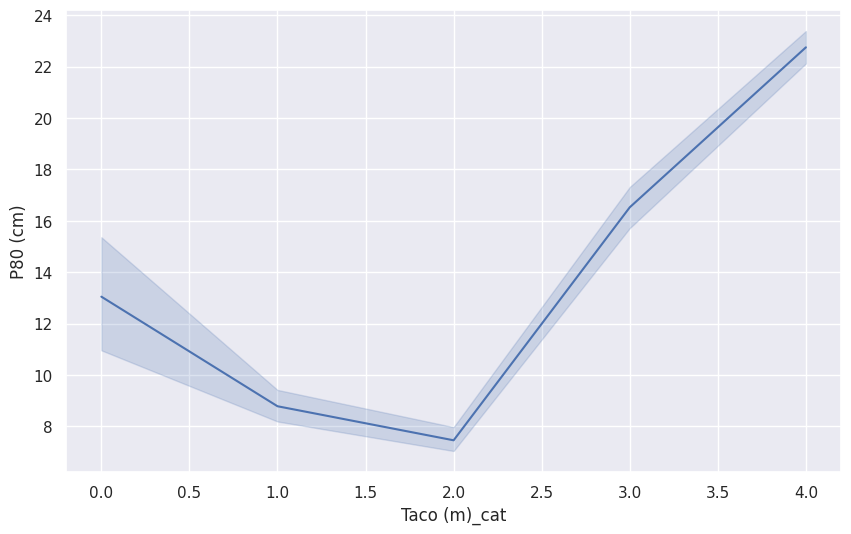

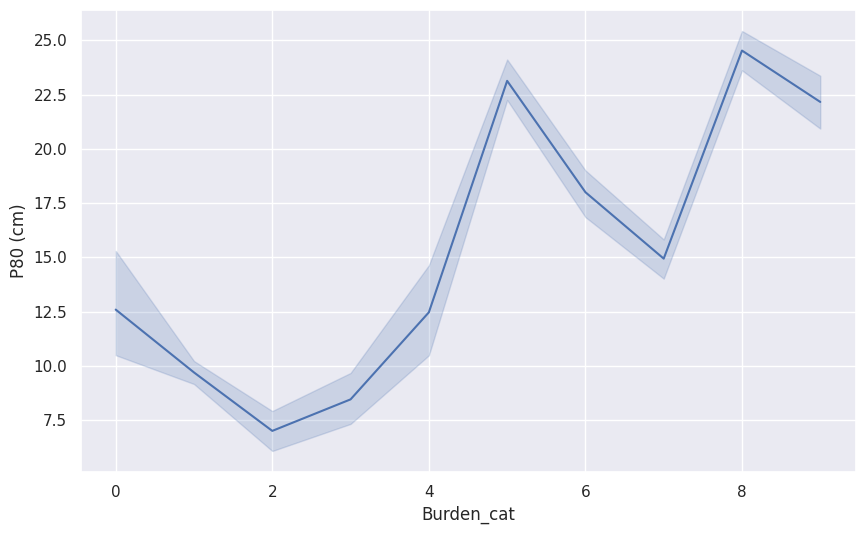

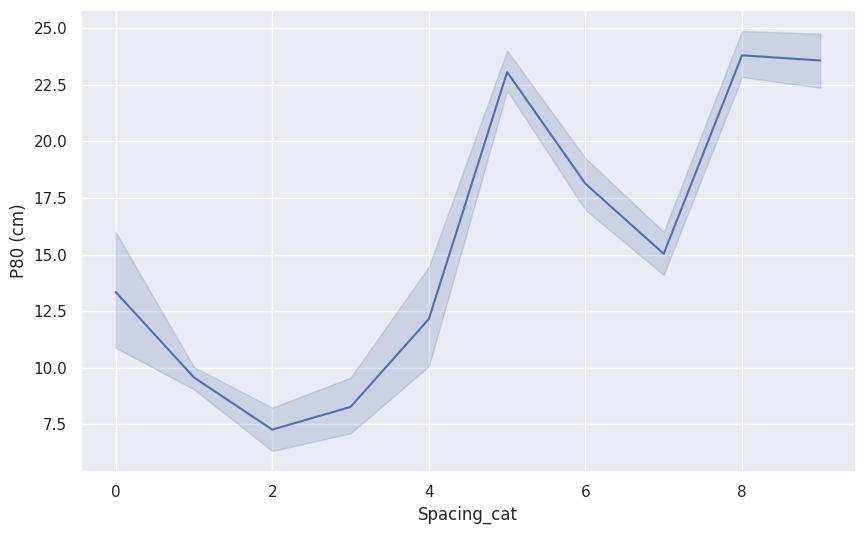

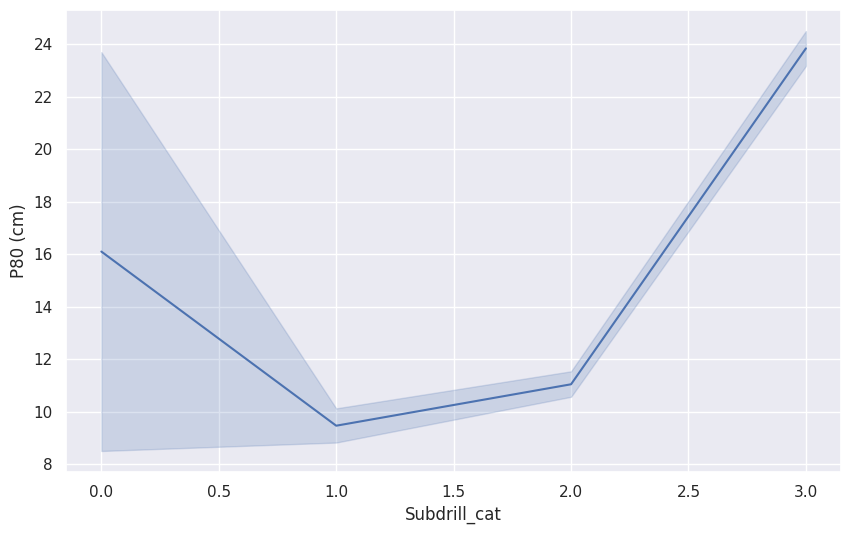

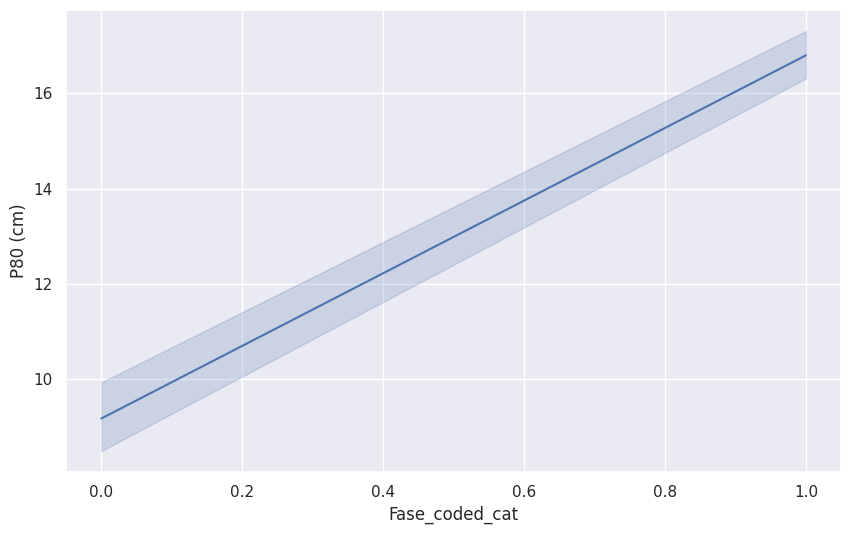

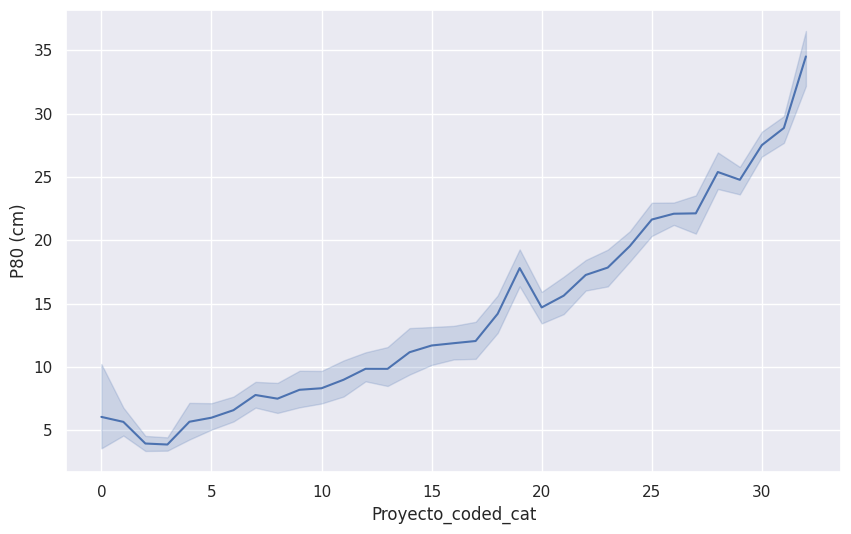

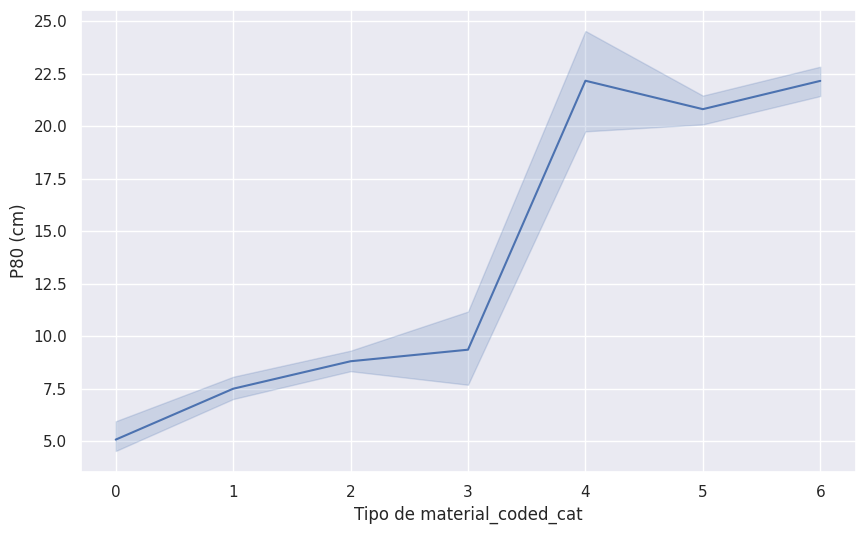

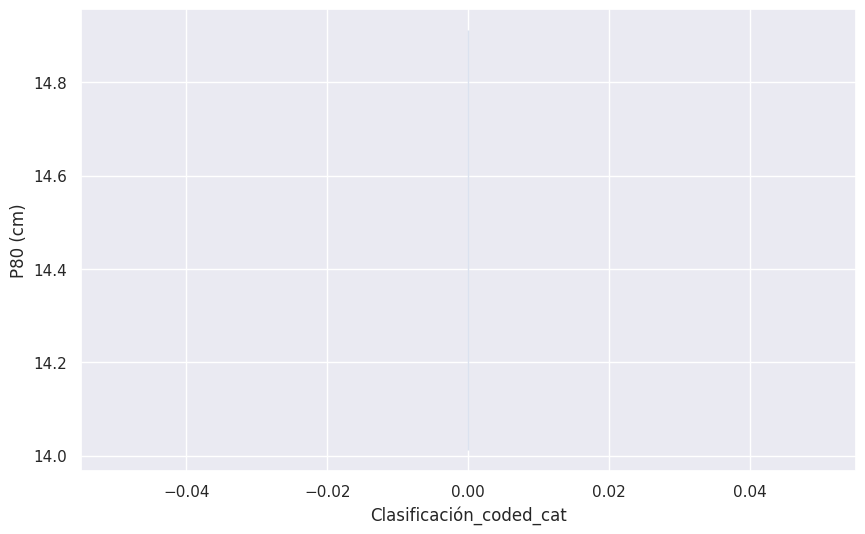

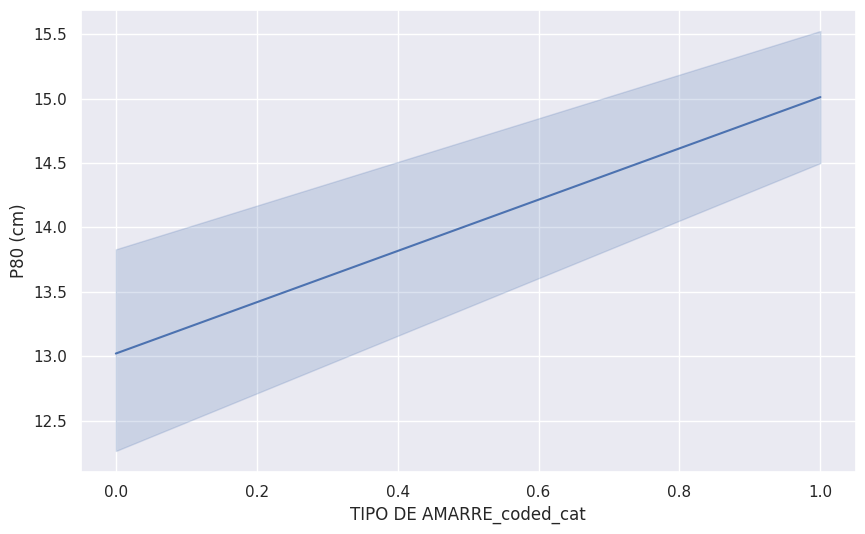

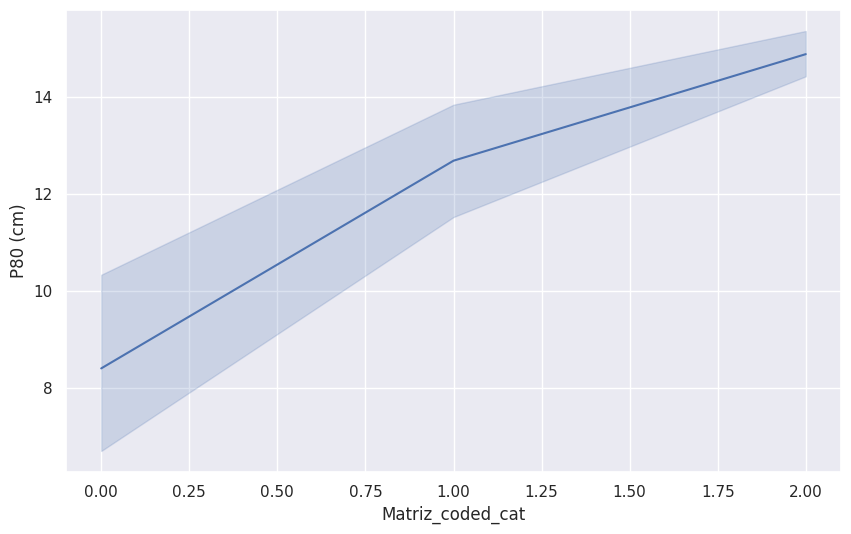

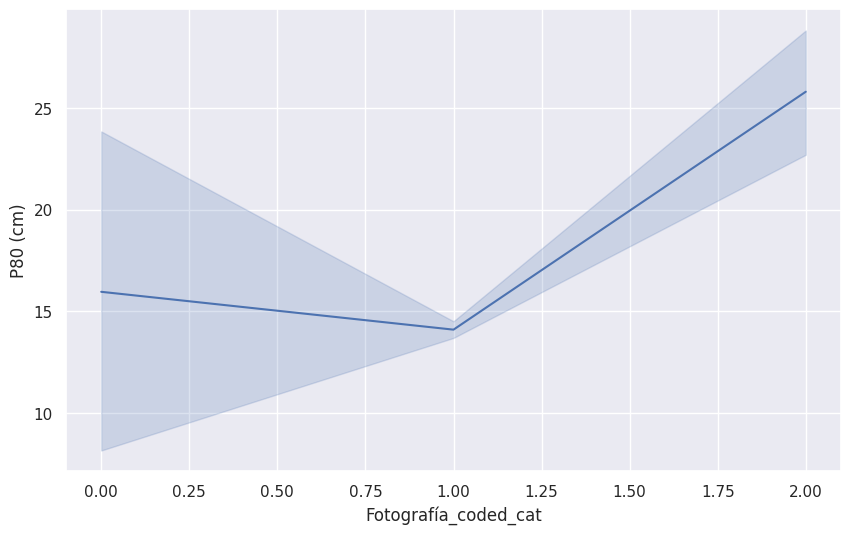

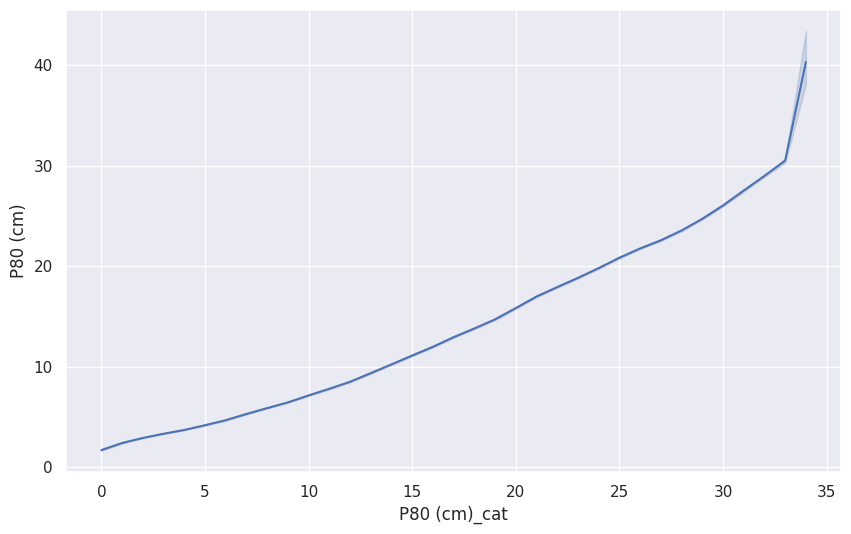

In [ ]:
for j in numFeatures + catFeatures_coded + ['P80 (cm)']:
  print(pddf_total[[f'{j}', f'{j}_cat', 'P80 (cm)']])
  aggregations = {'P80 (cm)':'mean', f'{j}':'min', f'{j}':'max'}
  res = pddf_total.groupby(f'{j}_cat').agg(aggregations).reset_index()
  print(res)
  # Ratio del evento por tramo dela variable numérica
  fig, ax = plt.subplots()
  ax = sns.lineplot(data=pddf_total, x=f'{j}_cat', y='P80 (cm)', palette = 'hls')
  print('--------------')

##Seleccion de muestras

In [ ]:
pddf_total.columns

Index(['Kg cargados', 'FP', 'Altura taladro (m)', 'Taco (m)', 'Burden',
       'Spacing', 'Subdrill', 'Fase', 'Proyecto', 'Tipo de material',
       'Clasificación', 'TIPO DE AMARRE', 'Matriz', 'Fotografía', 'P80 (cm)',
       'rango_percentil', 'Fase_coded', 'Proyecto_coded',
       'Tipo de material_coded', 'Clasificación_coded', 'TIPO DE AMARRE_coded',
       'Matriz_coded', 'Fotografía_coded', 'Kg cargados_cat', 'FP_cat',
       'Altura taladro (m)_cat', 'Taco (m)_cat', 'Burden_cat', 'Spacing_cat',
       'Subdrill_cat', 'Fase_coded_cat', 'Proyecto_coded_cat',
       'Tipo de material_coded_cat', 'Clasificación_coded_cat',
       'TIPO DE AMARRE_coded_cat', 'Matriz_coded_cat', 'Fotografía_coded_cat',
       'P80 (cm)_cat'],
      dtype='object')

In [ ]:
list_features_cat = ['Kg cargados_cat', 'FP_cat',
       'Altura taladro (m)_cat', 'Taco (m)_cat', 'Burden_cat', 'Spacing_cat',
       'Subdrill_cat', 'Fase_coded_cat', 'Proyecto_coded_cat',
       'Tipo de material_coded_cat', 'Clasificación_coded_cat',
       'TIPO DE AMARRE_coded_cat', 'Matriz_coded_cat', 'Fotografía_coded_cat']
list_target_cat = 'P80 (cm)_cat'

In [ ]:
# Determinando matrices de datos

X_matrix = pddf_total[list_features_cat]
y_matrix = pddf_total[list_target_cat]

In [ ]:
# Muestreo de data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_matrix, y_matrix, 
                                                    test_size = 0.3,
                                                    random_state = 123)


In [ ]:
y_train.mean()

14.537052584910146

In [ ]:
y_test.mean()

14.271442232680876

##SMOTE

In [ ]:
# Aplicando SMOTE para oversampling

from imblearn.over_sampling import SMOTE

In [ ]:
sm = SMOTE(k_neighbors=4,random_state = 123)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

In [ ]:
X_train_res

Kg cargados_cat     FP_cat  Altura taladro (m)_cat  Taco (m)_cat  \
0           11.000000   1.000000                3.000000           4.0   
1           30.000000  28.000000                3.000000           4.0   
2           15.000000  15.000000                1.000000           4.0   
3           18.000000   5.000000                3.000000           4.0   
4           33.000000  29.000000                2.000000           2.0   
...               ...        ...                     ...           ...   
1570         5.656822   1.343178                3.000000           4.0   
1571         0.000000   1.896652                1.541901           4.0   
1572         2.561428   7.877144                2.438572           4.0   
1573         0.238712   6.940322                3.000000           4.0   
1574         8.417602   3.388266                2.601956           4.0   

      Burden_cat  Spacing_cat  Subdrill_cat  Fase_coded_cat  \
0       9.000000     9.000000      3.000000         1.00000   
1       1.000000     1.000000      3.000000         1.00000   
2       3.000000     2.000000      1.000000         0.00000   
3       8.000000     8.000000      3.000000         1.00000   
4       1.000000     1.000000      2.000000         1.00000   
...          ...          ...           ...             ...   
1570    6.029534     6.029534      3.000000         1.00000   
1571    0.729050     5.832398      2.458099         0.27095   
1572    8.561428     8.561428      3.000000         1.00000   
1573    5.179034     5.179034      3.000000         1.00000   
1574    6.592177     6.592177      3.000000         1.00000   

      Proyecto_coded_cat  Tipo de material_coded_cat  Clasificación_coded_cat  \
0              23.000000                    5.000000                      0.0   
1              15.000000                    5.000000                      0.0   
2              16.000000                    5.000000                      0.0   
3              28.000000                    6.000000                      0.0   
4               8.000000                    2.000000                      0.0   
...                  ...                         ...                      ...   
1570           31.656822                    4.656822                      0.0   
1571           32.000000                    5.270950                      0.0   
1572           23.824295                    4.877144                      0.0   
1573           32.000000                    5.940322                      0.0   
1574           19.000000                    4.601956                      0.0   

      TIPO DE AMARRE_coded_cat  Matriz_coded_cat  Fotografía_coded_cat  
0                     0.000000          1.000000              1.000000  
1                     0.000000          1.000000              1.000000  
2                     1.000000          2.000000              1.000000  
3                     1.000000          1.000000              1.000000  
4                     0.000000          2.000000              1.000000  
...                        ...               ...                   ...  
1570                  1.000000          2.000000              1.656822  
1571                  1.000000          2.000000              1.270950  
1572                  1.000000          1.561428              1.000000  
1573                  0.059678          2.000000              1.000000  
1574                  1.000000          2.000000              1.601956  

[1575 rows x 14 columns]

<Axes: ylabel='count'>

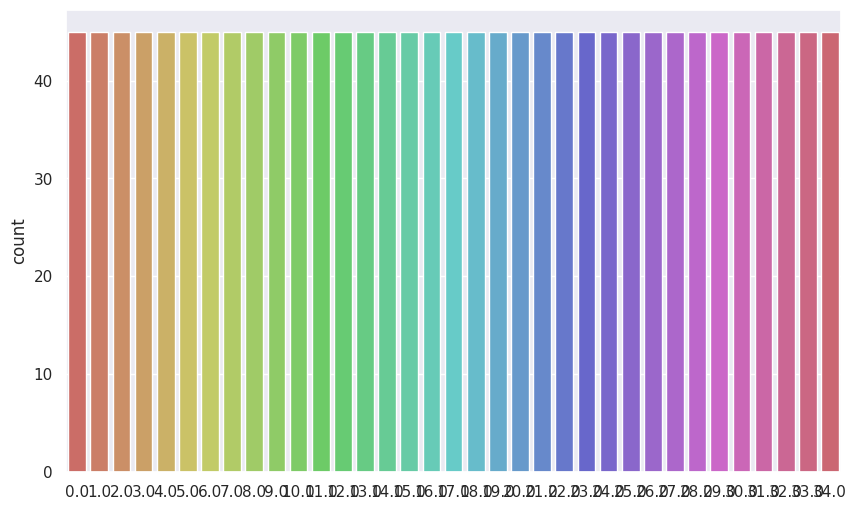

In [ ]:
# Analizando el target 
sns.countplot(x = y_train_res, palette = 'hls')

# Random Forest

In [ ]:
# Create a random forest regressor object
rf_reg = RandomForestRegressor()

# Define the hyperparameters to tune
param_grid = {'max_depth': [2, 3, 4, 5, 6, 7, 10, 12, 15, 18 ,20,25,30],
              'min_samples_split': [2, 5, 10, 30, 50, 70, 90],
              'min_samples_leaf': [0.01, 0.02, 0.025, 0.05, 0.1, 0.2],
              'max_features': ['auto', 'sqrt', 'log2']}
    
# Perform a grid search
grid_search = GridSearchCV(estimator=rf_reg, param_grid=param_grid, cv=5, verbose = 5, n_jobs=5, return_train_score = True)
grid_search.fit(X_train_res, y_train_res)

Fitting 5 folds for each of 1638 candidates, totalling 8190 fits


KeyboardInterrupt: ignored

In [ ]:
def plot_search_results(grid):
    """
    Params: 
        grid: A trained GridSearchCV object.
    """
    ## Results from grid search
    results = grid.cv_results_
    means_test = results['mean_test_score']
    stds_test = results['std_test_score']
    means_train = results['mean_train_score']
    stds_train = results['std_train_score']

    ## Getting indexes of values per hyper-parameter
    masks=[]
    masks_names= list(grid.best_params_.keys())
    for p_k, p_v in grid.best_params_.items():
        masks.append(list(results['param_'+p_k].data==p_v))

    params=grid.param_grid

    ## Ploting results
    fig, ax = plt.subplots(1,len(params),sharex='none', sharey='all',figsize=(20,5))
    fig.suptitle('Score per parameter')
    fig.text(0.04, 0.5, 'MEAN SCORE', va='center', rotation='vertical')
    pram_preformace_in_best = {}
    for i, p in enumerate(masks_names):
        m = np.stack(masks[:i] + masks[i+1:])
        pram_preformace_in_best
        best_parms_mask = m.all(axis=0)
        best_index = np.where(best_parms_mask)[0]
        x = np.array(params[p])
        y_1 = np.array(means_test[best_index])
        e_1 = np.array(stds_test[best_index])
        y_2 = np.array(means_train[best_index])
        e_2 = np.array(stds_train[best_index])
        ax[i].errorbar(x, y_1, e_1, linestyle='--', marker='o', label='test')
        ax[i].errorbar(x, y_2, e_2, linestyle='-', marker='^',label='train' )
        ax[i].set_xlabel(p.upper())

    plt.legend()
    plt.show()

In [ ]:

# Calling Method 
plot_search_results(grid_search)


In [ ]:
# Print the best hyperparameters
print('Best hyperparameters:', grid_search.best_params_)

In [ ]:
# Use the optimal hyperparameters to train the model
dt_reg_opt = RandomForestRegressor(max_depth=grid_search.best_params_['max_depth'],
                                    min_samples_split=grid_search.best_params_['min_samples_split'],
                                    min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
                                    max_features=grid_search.best_params_['max_features'])
dt_reg_opt = dt_reg_opt.fit(X_train_res, y_train_res)

In [ ]:
# Graficando resultados

from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data

dot_data = export_graphviz(dt_reg_opt,
                           feature_names = features,
                           filled = True,
                           rounded = True,
                           special_characters = True)

graph = graph_from_dot_data(dot_data)
graph.write_png('tree_rf.png')
print(graph)


In [ ]:
# Make predictions on the test set
y_pred = dt_reg_opt.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error:', mse)

# Calculate the R^2 score
r2 = r2_score(y_test, y_pred)
print('R^2 score:', r2)

In [ ]:
# Usando el modelo para predecir

X_train_res['prediction'] = dt_reg_opt.predict(X_train_res[list_features_cat])
X_test['prediction']  = dt_reg_opt.predict(X_test[list_features_cat])

X_train_res['P80'] = y_train_res
X_test['P80'] = y_test

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
print(f'R2 en train: {r2_score(X_train_res["P80"], X_train_res.prediction)}')
print(f'R2 en test:  {r2_score(X_test["P80"], X_test.prediction)}')

In [ ]:
X_test[['prediction', 'P80']].head()

In [ ]:
X_test['error'] = X_test['prediction'] - X_test['P80']
X_test['error_rel'] = X_test['error']/X_test['P80']

X_test[['prediction', 'P80', 'error_rel']]

In [ ]:
import seaborn as sns
sns.regplot(x = 'P80', y = 'prediction', data = X_test)

plt.show()

In [ ]:
def rango_error(x):
  if abs(x) > 0.5:
    return '>+-50%'
  elif abs(x) >= 0.25:
    return '<+-50%'
  elif abs(x) < 0.25:
    return '<+-25%'


In [ ]:
X_test['rango_error'] = X_test.error_rel.apply(lambda x: rango_error(x))

In [ ]:
number_0_25 = X_test[X_test['rango_error']=='<+-25%']
number_25_50 = X_test[X_test['rango_error']=='<+-50%']
number_50_100 = X_test[X_test['rango_error']=='>+-50%']

In [ ]:
print('%01',round(len(number_0_25)*100/len(X_test),2),'%')
print('%02',round(len(number_25_50)*100/len(X_test),2),'%')

#Grid Search y Cross Validation en RandomForestRegressor

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import *
import time


In [ ]:
parametros = {'n_estimators': [2,4,5,8,10,15,20, 40, 60, 80, 100, 120, 140, 160, 180, 200],             
              'max_depth': [None, 2, 4, 6, 8, 10, 12, 14],
              'min_samples_leaf': np.array([0.01, 0.025, 0.05, 0.1, 0.2,0.25,0.3])}

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=123)

In [ ]:
rfr = RandomForestRegressor()

In [ ]:
start_time = time.time()
GridSearch  = GridSearchCV(rfr, parametros, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1,return_train_score = True )
GridSearch.fit(X_train_res, y_train_res)
print("----%s seconds ---" % ((time.time() - start_time)))

KeyboardInterrupt: ignored

In [ ]:
print("Mejores parámetros: ", GridSearch.best_params_)
print("Mejor puntuación (neg_mean_squared_error): ", GridSearch.best_score_)


#Uso de Parametros Seleccionados

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score


rfr = RandomForestRegressor(max_depth = GridSearch.best_params_['max_depth'], min_samples_leaf = GridSearch.best_params_['min_samples_leaf'], n_estimators = GridSearch.best_params_['n_estimators'], random_state = 123)

scoring = {'neg_mean_squared_error': make_scorer(mean_squared_error),
           'neg_mean_absolute_error': make_scorer(mean_absolute_error),
           'r2': make_scorer(r2_score)}


cv_results = cross_validate(rfr, X_train_res, y_train_res, cv=5, scoring=scoring)


metrics_df = pd.DataFrame({'neg_mean_squared_error': -cv_results['test_neg_mean_squared_error'],
                           'neg_mean_absolute_error': -cv_results['test_neg_mean_absolute_error'],
                           'r2': cv_results['test_r2']})


mean_metrics = metrics_df.mean()
std_metrics = metrics_df.std()


metrics_df.loc['mean'] = mean_metrics
metrics_df.loc['std'] = std_metrics


print(metrics_df)



In [ ]:

rfr = RandomForestRegressor(max_depth = 6, min_samples_leaf = 0.025, n_estimators = 20, random_state = 123)
rfr = rfr.fit(X_train_I, y_train)
rfr

In [ ]:
importances = pd.DataFrame({'features' : X_train_I.columns.tolist() ,
                            'importance' : rfr.feature_importances_}).sort_values('importance', ascending = False)

importances.loc[importances.importance > 0]

#Usando el Modelo

In [ ]:
y_pred_rfr = rfr.predict(X_test_res)

In [ ]:
mse = mean_squared_error(y_test, y_pred_rfr)
r2 = r2_score(y_test, y_pred_rfr)
print("Error cuadrático medio: {:.2f}".format(mse))
print("Coeficiente de determinación (R2): {:.2f}".format(r2))


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


sns.scatterplot(x = y_pred_rfr, y = y_test)

plt.show()

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.datasets import make_regression
from collections import Counter

# Generate an imbalanced regression dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=3,
                       bias=0, noise=0.1, random_state=0)
y[y < 0] = 0

# Print the original target variable distribution
print('Original dataset shape %s' % Counter(y))

# Apply random oversampling to the dataset
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X, y)

# Print the resampled target variable distribution
print('Resampled dataset shape %s' % Counter(y_res))

In [ ]:
# Analizando el target 
sns.countplot(x = y_train_res, palette = 'hls')

## **XG BOOSTING**

##Seleccion de muestras

In [ ]:
train = copy.deepcopy(train00)
test = copy.deepcopy(test00)